## Importing Libraries

In [2]:
import os, sys, shutil, datetime, pickle, warnings, re, gensim, spacy
import en_core_web_sm, pyLDAvis, pyLDAvis.sklearn, nltk, string
import collections
import pandas as pd
import numpy as np
import gensim.corpora as corpora
import matplotlib.pyplot as plt

from ast import literal_eval
# !conda install -c conda-forge rake_nltk
from rake_nltk import Rake
# pip install textblob
from textblob import TextBlob, Word
from itertools import permutations
from collections import Counter
from spacy_langdetect import LanguageDetector
from nltk import word_tokenize, sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer ,PorterStemmer
from nltk.stem.porter import PorterStemmer
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from gensim.parsing.preprocessing import remove_stopwords
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

# from nltk.corpus import stopwords
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline
# nltk.download('omw-1.4')
from multi_rake import Rake
from collections import Counter
import random
# from transformers import pipeline
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

C:\Users\320136771\AppData\Roaming\Python\Python38\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (2.3.1) was trained with spaCy v2.3 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


## Process

### Step 1: > Input dataset and which column to analyze



In [3]:
pwd

'C:\\Users\\320136771\\Social Media Data\\Code\\Bag of words preprocessing\\Bag_of_Words\\Bag_of_Words'

In [4]:
files_dir = 'C:\\Users\\320136771\\Social Media Data\\Code\\Bag of words preprocessing\\Bag_of_Words\\Bag_of_Words'
files_dir

'C:\\Users\\320136771\\Social Media Data\\Code\\Bag of words preprocessing\\Bag_of_Words\\Bag_of_Words'

In [5]:
## File are present in "Data" folder
data_file_folder = os.path.join('Data')

## File Name under the Data folder
# file_name = r'Philips - Glassdoor Reviews - 2021-10-27_.csv'
# file_name = r'Philips - Glassdoor Reviews - 2022-03-15_.csv'
# file_name = r'Q3.xlsx'
#file_name = r'Hello, hybrid! _(1-94).xlsx'
#file_name=r'Philips - Glassdoor Reviews - 2022-04-05_.csv'
#file_name = r'dashboard-export-01-59-pm-2021-09-28 - Q3 2021.csv'
# file_name = r'Q1 2022 Philips processes second ques.csv'
file_name = r'df_merger.xlsx'
# file_name = r'Messages-2021-Translated.csv'

In [6]:
file_path = os.path.join(files_dir, data_file_folder, file_name)
file_path

'C:\\Users\\320136771\\Social Media Data\\Code\\Bag of words preprocessing\\Bag_of_Words\\Bag_of_Words\\Data\\df_merger.xlsx'

In [7]:
os.path.basename(file_path)

'df_merger.xlsx'

In [8]:
file_path

'C:\\Users\\320136771\\Social Media Data\\Code\\Bag of words preprocessing\\Bag_of_Words\\Bag_of_Words\\Data\\df_merger.xlsx'

In [9]:
if file_name.endswith('.xlsx'):
    df = pd.read_excel(file_path, dtype='str')
    
else:
    df=pd.read_csv(file_path,dtype='str')
df

Employer's Name  \
0      Koninklijke Philips Electronics N.V.   
1      Koninklijke Philips Electronics N.V.   
2      Koninklijke Philips Electronics N.V.   
3      Koninklijke Philips Electronics N.V.   
4      Koninklijke Philips Electronics N.V.   
...                                     ...   
12625                               Philips   
12626                               Philips   
12627                               Philips   
12628                               Philips   
12629                               Philips   

                                             Review Link  \
0      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
1      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
2      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
3      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
4      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
...                                                  ...   
12625  https://www.indeed.com/cmp/Philips/reviews?id=...   
12626  https://www.indeed.com/cmp/Philips/reviews?id=...   
12627  https://www.indeed.com/cmp/Philips/reviews?id=...   
12628  https://www.indeed.com/cmp/Philips/reviews?id=...   
12629  https://www.indeed.com/cmp/Philips/reviews?id=...   

                                             Job Title Review Date  \
0                           Call Center Representative   3/21/2022   
1                                                        3/21/2022   
2                                      Systems Analyst   3/21/2022   
3                                    Territory Manager   3/20/2022   
4                                                        3/19/2022   
...                                                ...         ...   
12625                           Field Service Engineer  12/21/2011   
12626                           Global Account Manager  11/14/2011   
12627  Senior Territory Manager, Referral Developement  10/13/2011   
12628                               Process Engineer 2   8/19/2011   
12629                       Production test Technician   4/20/2011   

      Review City/Town Name Review State Name Review Country Name Current Job  \
0                                                                          No   
1                                                                         Yes   
2                                                                          No   
3                                                                         Yes   
4                                                                          No   
...                     ...               ...                 ...         ...   
12625                   NaN               NaN                 NaN         NaN   
12626                   NaN               NaN                 NaN         NaN   
12627                   NaN               NaN                 NaN         NaN   
12628                   NaN               NaN                 NaN         NaN   
12629                   NaN               NaN                 NaN         NaN   

      Length of Employment Employment Status  ... Review Location  \
0         More than a year          Contract  ...             NaN   
1       More than 10 years         Full-time  ...             NaN   
2         Less than a year         Full-time  ...             NaN   
3        More than 5 years         Full-time  ...             NaN   
4         More than a year         Full-time  ...             NaN   
...                    ...               ...  ...             ...   
12625                  NaN               NaN  ...    Portland, OR   
12626                  NaN               NaN  ...   Sunnyvale, CA   
12627                  NaN               NaN  ...    Savannah, GA   
12628                  NaN               NaN  ...     Bothell, WA   
12629                  NaN               NaN  ...   Charlotte, NC   

      Current Employee Overall Rating Job Security / Advancement Rating  \
0                  NaN  

In [10]:
df.shape

(12630, 37)

In [11]:
df.columns

Index(['Employer's Name', 'Review Link', 'Job Title', 'Review Date',
       'Review City/Town Name', 'Review State Name', 'Review Country Name',
       'Current Job', 'Length of Employment', 'Employment Status',
       'Overall Satisfaction', 'Career Opportunities',
       'Compensation & Benefits', 'Senior Leadership', 'Work-Life Balance',
       'Culture & Values', 'Diversity & Inclusion', 'Business Outlook',
       'Recommend to Friend', 'CEO Approval', 'Pros', 'Cons',
       'Advice to Sr. Management', 'Headline', 'Employer Response',
       'Division Name', 'Data Source Name', 'Review Location',
       'Current Employee', 'Overall Rating',
       'Job Security / Advancement Rating', 'Compensation / Benefits Rating',
       'Management Rating', 'Work/Life Balance Rating', 'Culture Rating',
       'Review Headline', 'Review Text'],
      dtype='object')

### Column to analyze

In [12]:
#col_analyze = 'Please describe an ideal scenario for future work arrangements'
col_analyze = 'Pros'
# col_analyze = 'Cons'
# col_analyze = 'Where do you see an opportunity to automate our processes to help us become simpler, easier and faster? (EN)'
# col_analyze = 'body'

In [13]:
col_analyze_filename = col_analyze[:29]
col_analyze_filename

'Pros'

In [14]:
df = df.rename({col_analyze: col_analyze_filename},axis=1) 

In [15]:
col_analyze = col_analyze_filename

In [16]:
df.columns

Index(['Employer's Name', 'Review Link', 'Job Title', 'Review Date',
       'Review City/Town Name', 'Review State Name', 'Review Country Name',
       'Current Job', 'Length of Employment', 'Employment Status',
       'Overall Satisfaction', 'Career Opportunities',
       'Compensation & Benefits', 'Senior Leadership', 'Work-Life Balance',
       'Culture & Values', 'Diversity & Inclusion', 'Business Outlook',
       'Recommend to Friend', 'CEO Approval', 'Pros', 'Cons',
       'Advice to Sr. Management', 'Headline', 'Employer Response',
       'Division Name', 'Data Source Name', 'Review Location',
       'Current Employee', 'Overall Rating',
       'Job Security / Advancement Rating', 'Compensation / Benefits Rating',
       'Management Rating', 'Work/Life Balance Rating', 'Culture Rating',
       'Review Headline', 'Review Text'],
      dtype='object')

### Filtering rows

In [17]:
# last_k_yrs = 2

# yr_since = datetime.datetime.now().year - last_k_yrs
# yr_since

In [18]:
#df['Review Date'] = pd.to_datetime(df['Review Date'], format='%m/%d/%Y')

In [19]:
df.shape

(12630, 37)

In [20]:
# df = df[df['Review Date'].dt.year >= yr_since ].copy()
# df.reset_index(inplace=True, drop=True)
# df

In [21]:
# import datetime
# y='2020'
# m='05'
# d='01'
# sdate= y + '-' + m + '-' + d
# aDate = datetime.date.fromisoformat(sdate)
# print(aDate)

In [22]:
# df['Review Date'] = pd.to_datetime(df['Review Date'], format='%m/%d/%Y')

In [23]:
# df = df[df['Review Date'].dt.date >= aDate ].copy()
# df.reset_index(inplace=True, drop=True)
# df

In [24]:
# >>>

### Preprocessing

In [25]:
df.shape

(12630, 37)

In [26]:
df[col_analyze]

0                                Office was close to home.
1        Company takes a very inclusive global view of ...
2                          Work culture good ,Team Support
3        Technology, some of the team and future opport...
4                          Great team, well defined roles.
                               ...                        
12625                    vehicle,setting your own schedule
12626                        big company with deep pockets
12627                                for the action seeker
12628                reliable. profecional,good enviroment
12629                                                     
Name: Pros, Length: 12630, dtype: object

In [27]:
## List of Blank rows

df[df[col_analyze] == " "].shape

(1867, 37)

In [28]:
## Replacing Blank Rows with NaN

df[col_analyze] = df[col_analyze].replace(" ", np.nan)

In [29]:
df[f'{col_analyze}_replace'] = df[col_analyze]

In [30]:
replace_values =['na','NA','Na', ' NA','N/A ','N/A']

In [31]:
df[f'{col_analyze}_replace'] = df[f'{col_analyze}_replace'].replace(replace_values,"Not Applicable")

In [32]:
# df.to_excel(r'C:\Users\320136771\Social Media Data\test11.xlsx')

In [33]:
df.columns

Index(['Employer's Name', 'Review Link', 'Job Title', 'Review Date',
       'Review City/Town Name', 'Review State Name', 'Review Country Name',
       'Current Job', 'Length of Employment', 'Employment Status',
       'Overall Satisfaction', 'Career Opportunities',
       'Compensation & Benefits', 'Senior Leadership', 'Work-Life Balance',
       'Culture & Values', 'Diversity & Inclusion', 'Business Outlook',
       'Recommend to Friend', 'CEO Approval', 'Pros', 'Cons',
       'Advice to Sr. Management', 'Headline', 'Employer Response',
       'Division Name', 'Data Source Name', 'Review Location',
       'Current Employee', 'Overall Rating',
       'Job Security / Advancement Rating', 'Compensation / Benefits Rating',
       'Management Rating', 'Work/Life Balance Rating', 'Culture Rating',
       'Review Headline', 'Review Text', 'Pros_replace'],
      dtype='object')

In [34]:
col_analyze = 'Pros'
col_analyze

'Pros'

In [35]:
## Dropping Nulls

# df_new = df.dropna(subset=[col_analyze])

In [36]:
## Replacing values

## Replacing Invalid values
df[col_analyze] = df[col_analyze].str.replace('…','')
df[col_analyze] = df[col_analyze].str.replace('\n',' ')

# Remove new line characters
df[col_analyze] = df[col_analyze].str.replace('\s+', ' ')

# Remove distracting single quotes
df[col_analyze] = df[col_analyze].str.replace("\'", "")

## Filling NaN values
df[col_analyze].fillna('', inplace=True)

In [37]:
df_new = df.copy()
del df

df_new.reset_index(drop=True, inplace=True)
df_new.shape

(12630, 38)

In [38]:
df_new[[col_analyze]]

Pros
0                              Office was close to home.
1      Company takes a very inclusive global view of ...
2                        Work culture good ,Team Support
3      Technology, some of the team and future opport...
4                        Great team, well defined roles.
...                                                  ...
12625                  vehicle,setting your own schedule
12626                      big company with deep pockets
12627                              for the action seeker
12628              reliable. profecional,good enviroment
12629                                                   

[12630 rows x 1 columns]

In [39]:
# data = df_new[col_analyze].tolist()

# ## Top 10 values looks like
# list(data[:10])

### Step 2: > Tranlator required yes or no
	>> If Yes, translator will execute on the required column
	>> If No, skipped.
(click to download data)
(proceed with analysis)


In [40]:
## Flag If Translation required for the dataset or not
flag_required_translator = True    ## Run Translator
# flag_required_translator = False ## Don't run Translator

In [41]:
from deep_translator import GoogleTranslator

In [42]:
def translator(data, text_column, source_language, target_language):
    '''
    data is the dataframe
    text_column is the column which needs to be translated
    source_language is the original language of the column
    target_language is the language to which the column needs to be translated
    '''
    df = data.copy()
    translated_text=[]
    
    for index,row in df.iterrows():  
        try:
            #newrow=copy.deepcopy(row)
            translated=GoogleTranslator(source=source_language,target=target_language).translate(row[text_column])
            #print(translated)
        except Exception as e:
#             print('An Error Occurred! Replacing with Error Msg')
            translated = 'Error Encountered while converting!'
            
        translated_text.append(translated)
    
    df[f'{text_column}_translated'] = translated_text
        
    return df

In [43]:
if flag_required_translator == True:

    print(f'Translation started at {datetime.datetime.now()}')

    df_new = translator(data=df_new, text_column=col_analyze, source_language = 'auto',target_language = 'en')

    print(f'Translation ended at {datetime.datetime.now()}')

else:de
    df_new[f'{col_analyze}_translated'] = df_new[f'{col_analyze}'] 

Translation started at 2022-09-27 10:39:09.475136
Translation ended at 2022-09-27 11:10:35.999779


In [44]:
## Error msg for not converted rows
df_new[df_new[f'{col_analyze}_translated'] == 'Error Encountered while converting!'].shape

(1875, 39)

In [45]:
df_new[df_new[f'{col_analyze}_translated'] == 'Error Encountered while converting!'][[col_analyze, f'{col_analyze}_translated']]

Pros                      Pros_translated
8793        Error Encountered while converting!
8794        Error Encountered while converting!
8796        Error Encountered while converting!
8798        Error Encountered while converting!
8799        Error Encountered while converting!
...    ...                                  ...
12593       Error Encountered while converting!
12597       Error Encountered while converting!
12604       Error Encountered while converting!
12609       Error Encountered while converting!
12629       Error Encountered while converting!

[1875 rows x 2 columns]

In [46]:
## Need to Remove these Rows
invalid_comments = list(df_new[df_new[f'{col_analyze}_translated'] == 'Error Encountered while converting!'][col_analyze].unique())
invalid_comments

['', '-', '.', '.......', '10']

### Preprocessing - Removing Invalid Comments

In [47]:
df_new_backup = df_new.copy()

In [48]:
df_new_backup.shape

(12630, 39)

In [49]:
# df_new = df_new_backup.copy()

In [50]:
## Replacing invalid comments values with NaNs
for col_replace in invalid_comments:
    df_new[col_analyze] = df_new[[col_analyze]].replace(col_replace, np.nan)


## Dropping Nulls
df_new = df_new.dropna(subset=[col_analyze])

df_new.reset_index(drop=True, inplace=True)
df_new.shape

(10755, 39)

In [51]:
df_new

Employer's Name  \
0      Koninklijke Philips Electronics N.V.   
1      Koninklijke Philips Electronics N.V.   
2      Koninklijke Philips Electronics N.V.   
3      Koninklijke Philips Electronics N.V.   
4      Koninklijke Philips Electronics N.V.   
...                                     ...   
10750                               Philips   
10751                               Philips   
10752                               Philips   
10753                               Philips   
10754                               Philips   

                                             Review Link  \
0      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
1      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
2      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
3      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
4      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
...                                                  ...   
10750  https://www.indeed.com/cmp/Philips/reviews?id=...   
10751  https://www.indeed.com/cmp/Philips/reviews?id=...   
10752  https://www.indeed.com/cmp/Philips/reviews?id=...   
10753  https://www.indeed.com/cmp/Philips/reviews?id=...   
10754  https://www.indeed.com/cmp/Philips/reviews?id=...   

                                             Job Title Review Date  \
0                           Call Center Representative   3/21/2022   
1                                                        3/21/2022   
2                                      Systems Analyst   3/21/2022   
3                                    Territory Manager   3/20/2022   
4                                                        3/19/2022   
...                                                ...         ...   
10750                        Vendor Compliance Analyst  12/26/2011   
10751                           Field Service Engineer  12/21/2011   
10752                           Global Account Manager  11/14/2011   
10753  Senior Territory Manager, Referral Developement  10/13/2011   
10754                               Process Engineer 2   8/19/2011   

      Review City/Town Name Review State Name Review Country Name Current Job  \
0                                                                          No   
1                                                                         Yes   
2                                                                          No   
3                                                                         Yes   
4                                                                          No   
...                     ...               ...                 ...         ...   
10750                   NaN               NaN                 NaN         NaN   
10751                   NaN               NaN                 NaN         NaN   
10752                   NaN               NaN                 NaN         NaN   
10753                   NaN               NaN                 NaN         NaN   
10754                   NaN               NaN                 NaN         NaN   

      Length of Employment Employment Status  ... Overall Rating  \
0         More than a year          Contract  ...            NaN   
1       More than 10 years         Full-time  ...            NaN   
2         Less than a year         Full-time  ...            NaN   
3        More than 5 years         Full-time  ...            NaN   
4         More than a year         Full-time  ...            NaN   
...                    ...               ...  ...            ...   
10750                  NaN               NaN  ...              5   
10751                  NaN               NaN  ...              3   
10752                  NaN               NaN  ...              5   
10753                  NaN               NaN  ...              4   
10754                  NaN               NaN  ...              5   

      Job Security / Advancement Rating Compensation / Benefits Rating  \
0                                   N

In [52]:
col_analyze

'Pros'

In [53]:
df_new[col_analyze]

0                                Office was close to home.
1        Company takes a very inclusive global view of ...
2                          Work culture good ,Team Support
3        Technology, some of the team and future opport...
4                          Great team, well defined roles.
                               ...                        
10750                          awesome all the way around!
10751                    vehicle,setting your own schedule
10752                        big company with deep pockets
10753                                for the action seeker
10754                reliable. profecional,good enviroment
Name: Pros, Length: 10755, dtype: object

### Saving Data

In [54]:
path_result_dir = os.path.join(files_dir, f'Translated_Data-{col_analyze}')
path_result_dir

'C:\\Users\\320136771\\Social Media Data\\Code\\Bag of words preprocessing\\Bag_of_Words\\Bag_of_Words\\Translated_Data-Pros'

In [55]:
if not os.path.exists(path_result_dir):
    os.mkdir(path_result_dir)

In [56]:
## Saving Preprocessed and Translated Data
df_new.to_csv(os.path.join(path_result_dir, f'{col_analyze}.csv'), index=False)

### Step 3.a: > Do we need to run on custom Bag of Words or no?
	>> If Yes, 
		>>> Do we have custom Bag of Words? or we need to use pre-existing one or we need to have a download and upload Bag of Words file.
		(o/p)>>> Proceed with Bag of Words and generate Topicwise counts
		(click to download data)

	>> If  No, all comments would be tagged to a single Topic only
(proceed with analysis)


In [57]:
## Flag If we need to run using custom bag of words or not

flag_required_BoW = True    ## Run BoW
# flag_required_BoW = False ## Don't run Translator

In [58]:
## Flag If we need to run autocorrect functionality or not

# flag_autocorrect = True ## if you want to autocorrect the words
flag_autocorrect = False ## if you don't want to autocorrect the words

In [59]:
## Flag for pattern matching with/without boundaries blocking

flag_pattern_with_blocks=True  ## To check for pattern with word blocking
# flag_pattern_with_blocks=False   ## To check for pattern without word blocking

In [60]:
col_analyze 

'Pros'

### Reading Bag of Words

In [61]:
# BagofWords_filename = 'Bag_of_Words_Combined.xlsx'
# BagofWords_filename = 'Bag_of_Words_Combined - Updated FoW.xlsx'
BagofWords_filename = 'Bag_of_Words_Combined - Updated FoW - V5.xlsx'

In [62]:
df_hierarchy = pd.read_excel(os.path.join(files_dir ,'Data',BagofWords_filename), sheet_name='Topic_Hierarchy')
df_hierarchy

parentLabel  \
0                         Engagement   
1                          Wellbeing   
2                Organization Change   
3                          Resources   
4                   People and Teams   
5                     Pay & Benefits   
6                         Leadership   
7                   Culture & Values   
8                 Brand & Reputation   
9                          Execution   
10                    Communications   
11         Performance & Development   
12  Diversity, Inclusion, & Fairness   
13                   Ethics & Safety   
14     Decision Making Effectiveness   
15                               FoW   

                                          childLabels  
0   ['Pride', 'Meaningful Work', 'Intent to stay',...  
1   ['Flexible Working', 'Workload & Work-Life Bal...  
2   ['Change Management', 'Pace of Change', 'Restr...  
3   ['Staffing', 'Budget', 'Work Space', 'IT & Sys...  
4              ['Collaboration', 'Coworkers & Teams']  
5   ['Incentive Pay', 'Time Off', 'Base Pay', 'Com...  
6   ['Coaching & Feedback', 'Communication', 'Reco...  
7       ['Culture & Environment', 'Mission & Values']  
8   ['Company Image', 'Quality', 'Customer Focus',...  
9   ['Delivery', 'Speed & Agility', 'Efficiency', ...  
10  ['Informed', 'Overall Communication', 'Transpa...  
11  ['Training', 'Career Growth', 'Performance Man...  
12    ['Fairness & Equity', 'Inclusion', 'Diversity']  
13                               ['Safety', 'Ethics']  
14  ['Empowerment & Ownership', 'Decision Making T...  
15  ['Hybrid','Office','Workplace','WFH','Home','S...

In [63]:
df_topic_words = pd.read_excel(os.path.join(files_dir,'Data',BagofWords_filename), sheet_name='BagofWords_Combined')
df_topic_words.drop(columns='Text', inplace=True)
df_topic_words

Topic  \
0              Coworkers & Teams   
1                       Managers   
2                   IT & Systems   
3                        Leaders   
4           Growth & Development   
..                           ...   
65               Decision Making   
66  Decision Making Transparency   
67                    Competence   
68                       Job Fit   
69                Future of Work   

                               Included_Words_orignal  \
0   ['people work with', 'amazing people', 'good p...   
1   ['managers', 'management', 'supervisor', 'boss...   
2   ['system', 'CRM', 'database', 'technology', 's...   
3   ['senior leadership', 'executives', 'senior ma...   
4   ['growth', 'develop', 'learn', 'stretch assign...   
..                                                ...   
65  ['leader prioritize', 'leadership prioritize',...   
66  ['transparency decision', 'transparent decisio...   
67  ['manager competent', 'leader competent', 'sup...   
68  ['right role', 'in right job', 'job fit', 'rol...   
69  ['Hybrid','Office','Workplace','WFH','Home','S...   

                               Excluded_Words_orignal  \
0                                                  []   
1                                                  []   
2                                                  []   
3                                                  []   
4   ['revenue growth', 'growth business', 'develop...   
..                                                ...   
65                                                 []   
66                                                 []   
67                                                 []   
68                                                 []   
69                                                 []   

                                       Included_Words  \
0   ['people work with', 'amazing people', 'good p...   
1   ['managers', 'management', 'supervisor', 'boss...   
2   ['system', 'CRM', 'database', 'technology', 's...   
3   ['senior leadership', 'executives', 'senior ma...   
4   ['growth', 'develop', 'learn', 'stretch assign...   
..                                                ...   
65  ['leader prioritize', 'leadership prioritize',...   
66  ['transparency decision', 'transparent decisio...   
67  ['manager competent', 'leader competent', 'sup...   
68  ['right role', 'in right job', 'job fit', 'rol...   
69  ['Hybrid','Office','Workplace','WFH','Home','S...   

                                       Excluded_Words  
0                                                  []  
1                                            [ 'bos']  
2                                           ['pcsss']  
3                                                  []  
4   ['revenue growth', 'growth business', 'develop...  
..                                                ...  
65                                                 []  
66  ['decision', 'made decision', 'transparency', ...  
67                                                 []  
68  ['job in', 'right in', 'in right', 'their role...  
69                                                 []  

[70 rows x 5 columns]

### Reading Data

In [64]:
if col_analyze.endswith('_translated'):
    col_analyze     = col_analyze.replace('_translated', '')

In [65]:
path_result_dir = os.path.join(files_dir, f'Translated_Data-{col_analyze}')
path_result_dir

'C:\\Users\\320136771\\Social Media Data\\Code\\Bag of words preprocessing\\Bag_of_Words\\Bag_of_Words\\Translated_Data-Pros'

In [66]:
df_new = pd.read_csv(os.path.join(path_result_dir, f'{col_analyze}.csv'), dtype='str')
df_new

Employer's Name  \
0      Koninklijke Philips Electronics N.V.   
1      Koninklijke Philips Electronics N.V.   
2      Koninklijke Philips Electronics N.V.   
3      Koninklijke Philips Electronics N.V.   
4      Koninklijke Philips Electronics N.V.   
...                                     ...   
10750                               Philips   
10751                               Philips   
10752                               Philips   
10753                               Philips   
10754                               Philips   

                                             Review Link  \
0      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
1      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
2      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
3      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
4      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
...                                                  ...   
10750  https://www.indeed.com/cmp/Philips/reviews?id=...   
10751  https://www.indeed.com/cmp/Philips/reviews?id=...   
10752  https://www.indeed.com/cmp/Philips/reviews?id=...   
10753  https://www.indeed.com/cmp/Philips/reviews?id=...   
10754  https://www.indeed.com/cmp/Philips/reviews?id=...   

                                             Job Title Review Date  \
0                           Call Center Representative   3/21/2022   
1                                                        3/21/2022   
2                                      Systems Analyst   3/21/2022   
3                                    Territory Manager   3/20/2022   
4                                                        3/19/2022   
...                                                ...         ...   
10750                        Vendor Compliance Analyst  12/26/2011   
10751                           Field Service Engineer  12/21/2011   
10752                           Global Account Manager  11/14/2011   
10753  Senior Territory Manager, Referral Developement  10/13/2011   
10754                               Process Engineer 2   8/19/2011   

      Review City/Town Name Review State Name Review Country Name Current Job  \
0                                                                          No   
1                                                                         Yes   
2                                                                          No   
3                                                                         Yes   
4                                                                          No   
...                     ...               ...                 ...         ...   
10750                   NaN               NaN                 NaN         NaN   
10751                   NaN               NaN                 NaN         NaN   
10752                   NaN               NaN                 NaN         NaN   
10753                   NaN               NaN                 NaN         NaN   
10754                   NaN               NaN                 NaN         NaN   

      Length of Employment Employment Status  ... Overall Rating  \
0         More than a year          Contract  ...            NaN   
1       More than 10 years         Full-time  ...            NaN   
2         Less than a year         Full-time  ...            NaN   
3        More than 5 years         Full-time  ...            NaN   
4         More than a year         Full-time  ...            NaN   
...                    ...               ...  ...            ...   
10750                  NaN               NaN  ...              5   
10751                  NaN               NaN  ...              3   
10752                  NaN               NaN  ...              5   
10753                  NaN               NaN  ...              4   
10754                  NaN               NaN  ...              5   

      Job Security / Advancement Rating Compensation / Benefits Rating  \
0                                   N

In [67]:
col_analyze

'Pros'

In [68]:
# Using Translated Column
if not col_analyze.endswith('_translated'):
    col_analyze = f'{col_analyze}_translated'

In [69]:
col_analyze

'Pros_translated'

In [70]:
## if want to change some other name of folder, currently only taking eng char
custom_foldername = " ".join(re.findall(r'[A-Za-z]+', col_analyze))
custom_foldername

'Pros translated'

In [71]:
# path_result_dir = os.path.join(files_dir, f'BagofWords_Results-{col_analyze}')
path_result_dir = os.path.join(files_dir, f'BagofWords_Results-{custom_foldername}')

if not os.path.exists(path_result_dir):
    os.mkdir(path_result_dir)
path_result_dir

'C:\\Users\\320136771\\Social Media Data\\Code\\Bag of words preprocessing\\Bag_of_Words\\Bag_of_Words\\BagofWords_Results-Pros translated'

In [72]:
stopwords_wc=set(STOPWORDS)

In [73]:
stopwords_wc

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

### Tagging Comments with Bag of Words

In [74]:
# ## Preprocessing, lemmatizing and auto-correcting

# # Define function to lemmatize each word with its POS tag
# def lemmatize_with_postag(sentence, correction_flag=False):
#     sentence = sentence.lower()
# #     values_remove = ['of','in','at','the','a']
# #     customised_words = list(values_remove)
# #     stopwords_wc=set(STOPWORDS)
# #     stopwords_wc.remove('too')
# #     stopwords_wc.remove('from')
# #     sentence = re.sub(r'[^0-9A-Za-z ]',' ', sentence)
     
# #     new_stopwords = stopwords_wc.union(customised_words)
#     pattern = re.compile(r'\b(' + r'|'.join(sentence) + r')\b\s*')
#     sentence = pattern.sub('', sentence)
# #     customised_words = list(values_remove)
# #     new_stopwords = stopwords_wc.union(customised_words)
# #     sentence = [word for word in sentence if word not in sentence]
# #     print(sentence)
#     sentence = " ".join([word.strip() for word in sentence.split(' ') if len(word)>0])
    
# #     filtered_sentence = remove_stopwords(sentence)
#     sent = TextBlob(sentence)
#       ####filter stpwords
#     ## if you want to correct
#     if correction_flag == True:
#         sent = sent.correct()
    
#     tag_dict = {"J": 'a', 
#                 "N": 'n', 
#                 "V": 'v', 
#                 "R": 'r'}
#     words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
#     lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
#     return " ".join(lemmatized_list)

In [75]:
## Preprocessing, lemmatizing and auto-correcting

# Define function to lemmatize each word with its POS tag
def lemmatize_with_postag(sentence, correction_flag=False):
    sentence = sentence.lower()
    sentence = re.sub(r'[^0-9A-Za-z ]',' ', sentence)
    sentence = " ".join([word.strip() for word in sentence.split(' ') if len(word)>0])
    sent = TextBlob(sentence)
    ## if you want to correct
    if correction_flag == True:
        sent = sent.correct()
    
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]
    
    lemmatized_list = [wd.lemmatize(tag) if wd not in ['benefits','staffing','dues','values','PCSSs','plan','leaning','boss','pcsss','npss','qte','gbs','operating','screenings'] else wd for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

In [76]:
# import nltk
# import pandas as pd
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer 

# lemmatizer = WordNetLemmatizer()

# def lemmatize_with_postag(treebank_tag):

#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return None

In [77]:
# x = pd.DataFrame(data=[['Automation is overrated'], ['Expedited system approval'], ['expedite'],['rich expedited in new class']], 
#                  columns=['Phrase'])
# x['Phrase'] = x['Phrase'].apply(lambda v: nltk.pos_tag(nltk.word_tokenize(v)))


# x['Phrase_lemma'] = x['Phrase'].transform(lambda value: ' '.join([lemmatizer.lemmatize(a[0],pos=lemmatize_with_postag(a[1])) if lemmatize_with_postag(a[1]) else a[0] for a in  value]))

In [78]:
# x

In [79]:
# x.to_excel(r'C:\Users\320136771\Social Media Data\test_lemma.xlsx')

# Testing

In [80]:
# x = 'change is constant employee expect it flex necessary philip need anticipate people go leave huge change staff appropriately pandemic people multiple job hire people lose tenured people efficient huge curve aps & q people dedicate philip tire stretched mixed level communication important deployment'

In [81]:
# x = 'There are no inter-sector interactions, the only communication path (service order) is not bilateral and in most cases it does not correspond to expectations.'

In [82]:
# x = 'Engineer team benefits need to be observed and improved because of their neediness high skill and hard working life circumstances'
# x = 'The outsourcing of our bench repair to Quest has resulted in a lot of customer dissatisfaction. I hear complaints a lot.'
# x = 'Operating different applications is counterproductive (e.g. NOVA and ServiceMax)'
x ='Need to improve the simplification & streamlining of QMS -'

In [83]:
y = lemmatize_with_postag(x)

In [84]:
y

'need to improve the simplification streamlining of qms'

In [85]:
########################################################

In [86]:
print(f'Lemmatization with autocorrect {str(flag_autocorrect)}, started at {datetime.datetime.now()}')

Lemmatization with autocorrect False, started at 2022-09-27 11:12:26.552947


In [87]:
## Converting Text to lemmatized text
## Takes time, 100 records 2 mins for correction logic

df_new[f'{col_analyze}_lemma'] = df_new[col_analyze].fillna('').apply(lemmatize_with_postag,
                                                                      correction_flag=flag_autocorrect)

In [88]:
print(f'Lemmatization with autocorrect {str(flag_autocorrect)}, ended at {datetime.datetime.now()}')

Lemmatization with autocorrect False, ended at 2022-09-27 11:12:38.678853


In [89]:
df_new[[col_analyze, f'{col_analyze}_lemma']]

Pros_translated  \
0                              Office was close to home.   
1      Company takes a very inclusive global view of ...   
2                        Work culture good ,Team Support   
3      Technology, some of the team and future opport...   
4                        Great team, well defined roles.   
...                                                  ...   
10750                        awesome all the way around!   
10751                  vehicle,setting your own schedule   
10752                      big company with deep pockets   
10753                              for the action seeker   
10754              reliable. profecional,good enviroment   

                                   Pros_translated_lemma  
0                                office be close to home  
1      company take a very inclusive global view of t...  
2                         work culture good team support  
3      technology some of the team and future opportu...  
4                            great team well define role  
...                                                  ...  
10750                         awesome all the way around  
10751                      vehicle set your own schedule  
10752                       big company with deep pocket  
10753                              for the action seeker  
10754               reliable profecional good enviroment  

[10755 rows x 2 columns]

### Improving Bag of Words using Combination of words

In [90]:
# def combination_words(word_input, sep=' '):
#     word_input = word_input.strip()
#     split_text_word = [word.strip() for word in word_input.split(sep)]
#     # Get all permutations
#     perm = permutations(split_text_word)

#     list_all = []
#     # Print the obtained permutations
#     for i in list(perm):
#         list_all.append(" ".join(list(i)))
    
#     return(list_all)

# def combination_words_all(word_input, sep=' ', min_length = 2):
#     word_input = word_input.strip()
    
#     """min_length is the parameter to check for atleast how much length words to be checked"""
#     split_text_word = [word.strip() for word in word_input.split(sep)]

#     list_all = []

#     if (len(split_text_word)==1):
#         min_length = 1
#     if len(split_text_word) ==2: 
#         for len_check in range(min_length, len(split_text_word)+1):
#             perm = permutations(split_text_word, len_check)
#             for i in list(perm):
#                 list_all.append(" ".join(list(i)))
                
#     else:
#         list_all.append(word_input)

#     list_all = list(filter(None, list_all))
    
#     return(list_all)

In [91]:
# combination_words_all('constant change of direction')

In [92]:
## Testing

# word_input = 'too much busy bhai'
# word_input = 'work life'
# word_input = 'work'
# sep = ' '


# print('With Combination of Words:')
# print(combination_words(word_input, sep))
# print('With All Combination of Words:')
# print(combination_words_all(word_input, sep, min_length=2))

In [93]:
def remove_duplicate_element(list_text):
    result_txt = list_text
#     print(type(list_text))
    if type(list_text) == list:
        if len(list_text) > 0:
            result_txt = list(set(list_text))
    else:
        result_txt = list_text
    if type(result_txt) == list:
        result_txt = [word for word in result_txt if word !='']
    
    return result_txt

In [94]:
#####check BoW Bug

In [95]:
list_check_topics = list(df_topic_words['Topic']) 
# list_check_topics = ['Culture & Environment']


df_new['Bag_of_Words'] = ''


for check_topic in list_check_topics:
    incl_words = literal_eval(df_topic_words[df_topic_words['Topic'] == check_topic]['Included_Words'].values[0])
    incl_words = [word.lower() for word in incl_words]
    excl_words = literal_eval(df_topic_words[df_topic_words['Topic'] == check_topic]['Excluded_Words'].values[0])
    excl_words = [word for word in excl_words]

    
    
#     print(f'incl_words 1st :{incl_words}')
#     print()
#     print('list_value_incl_words_1:',list_value_incl_words_1)
    
    # Improving Bag of Words to catch combinations of words
    # Updated Included Words
#     incl_words = [combination_words_all(word, sep=' ', min_length=2) for word in incl_words]
#     incl_words = [j for i in incl_words for j in i]
#     excl_words = [combination_words_all(word, sep=' ', min_length=2) for word in excl_words]
#     excl_words = [j for i in excl_words for j in i]
    
    list_value_incl_words_1 = incl_words
    
#     print(f'incl_words 2nd : {list_value_incl_words_1}')
#     print()
    ################################
    
    # Lemmatizing the bag of words
    incl_words = [lemmatize_with_postag(word, correction_flag=flag_autocorrect) for word in incl_words]
#     print(f'incl_words lemma : {incl_words}')
    excl_words = [lemmatize_with_postag(word, correction_flag=flag_autocorrect) for word in excl_words]
#     print(f'incl_words 3rd : {incl_words}')
    
    test = list(set(list_value_incl_words_1).union(set(incl_words)))
#     print('union :',test)
    
        
    
    
    
    
#     print()
    
    ## Preparing Regex ##
    pattern_final = ''
    
    if flag_pattern_with_blocks == True:
        pattern_include = r"(\b"
        ## Adding suffixes s or es into consideration
        pattern_include += (r"[s]?[es]{0,2}\b|\b".join(test))
        pattern_include += r"[s]?[es]{0,2}\b|\b"
        ## Adding suffixes d or ed into consideration
        pattern_include += (r"[ed]?[ed]{0,2}\b|\b".join(test))
        pattern_include += r"[ed]?[ed]{0,2}\b"
        # Adding suffixes ing into consideration
        pattern_include += (r"[ing]?[ing]{0,2}\b|\b".join(test))
        pattern_include += r"[ing]?[ing]{0,2}\b|\b"
        ## Adding suffixes r or er into consideration
        pattern_include += (r"[r]?[er]{0,2}\b|\b".join(test))
        pattern_include += r"[r]?[er]{0,2}\b"
        pattern_include += ")*"
        

        pattern_exclude = r"(?:\b"
        pattern_exclude += (r"\b|\b".join(excl_words))
        pattern_exclude += r"\b)*"
#         print(pattern_include)
    else:
        pattern_include = r"("
        pattern_include += (r"|".join(test))
        pattern_include += ")*"

        pattern_exclude = r"(?:\b"
        pattern_exclude += (r"\b|\b".join(excl_words))
        pattern_exclude += r"\b)*"
#         print(pattern_include)
    
    pattern_final = pattern_exclude+pattern_include
    pattern_final = pattern_final.lower()
#     print(pattern_final)
    ####################
    
    ## Applying pattern on cleaned text removing alphanumerics
#     df_new[check_topic] = df_new[f'{col_analyze}_lemma'].str.fullmatch("\b{pattern_final}\b")
#     print('df_new:',df_new[df_new['flag']==True])
#     for count,row in df_new.iterrows():
#         if row['flag'] == True :
#             df_new.loc[count,check_topic] = pd.DataFrame(list(row[f'{col_analyze}_lemma'])).str.findall(pattern_final)
#     df_new.loc[df_new['flag']== True,check_topic] = df_new[f'{col_analyze}_lemma'].str.findall(pattern_final)
    df_new[check_topic] = df_new[f'{col_analyze}_lemma'].str.findall(pattern_final)
    
    ## Removing duplicate elements
    df_new[check_topic] = df_new[check_topic].apply(remove_duplicate_element)
#     df_new[check_topic] = df_new[check_topic].str.lstrip(', ')
#     match=re.findall(r"\bvision\b",text)

    ## List of Topics combined
    df_new['Bag_of_Words'] = np.where((df_new[check_topic].str.len()>0) == True,
                                      df_new['Bag_of_Words']+f",{check_topic}",
                                      df_new['Bag_of_Words'])

df_new['Bag_of_Words'] = df_new['Bag_of_Words'].str.lstrip(', ')


In [96]:
# x = 'outsourcing with world'

In [97]:
# pattern_final

In [98]:
# x = 'Engineer team benefits need to be observed and improved because of their neediness high skill and hard working life circumstances'
test_1 = [lemmatize_with_postag(word, correction_flag=flag_autocorrect)if word not in ['benefits','staffing','neediness'] else word for word in x.split()]

In [99]:
test_1

['need',
 'to',
 'improve',
 'the',
 'simplification',
 '',
 'streamline',
 'of',
 'qms',
 '']

In [100]:
# x = 'pcsss Software validation processes can become much more lean'
x = 'fun a lot in workplace'

In [101]:
# x='plan'

In [102]:
# x ='It is getting more difficult every day to get my job done with any ease. Many within my team are complaining about the same things. With the new transition to GBS, rolling out PEPF, processes, and new people constantly is too much too fast. We train the new folks and before you know it, they have left the job. It is far too unstable and inconsistent. People like me who have been with Philips for decades are committed and proud of what we do. A great deal of the new employees take advantage of Philips; they do not have the level of commitment. We are burnt out and many are starting to leave the group because they are overworked and not appreciated.'
# x = 'We are burnt out and many are starting to leave the group'

In [103]:
re.findall(pattern_final,x)

['', '', '', '', '', '', '', '', '', '', '', '', '', 'workplace', '']

In [104]:
# text ='revision'

In [105]:
# match=re.search(r"\bvision\b",text)
# if match is not None:
#     print(match)
#     print(len(match))
# else:
#     print("nei")

In [106]:
# # list_check_topics = list(df_topic_words['Topic']) 
# list_check_topics = ['Decision Making Transparency']


# df_new['Bag_of_Words'] = ''


# for check_topic in list_check_topics:
#     incl_words = literal_eval(df_topic_words[df_topic_words['Topic'] == check_topic]['Included_Words'].values[0])
#     incl_words = [word.lower() for word in incl_words]
#     incl_words = [words.split() for words in incl_words]
#     incl_words = [word for words in incl_words for word in words]
#     excl_words = literal_eval(df_topic_words[df_topic_words['Topic'] == check_topic]['Excluded_Words'].values[0])
#     excl_words = [word.lower() for word in excl_words]
    
 


    
# #     print(f'incl_words 1st : {incl_words}')
# #     print()
# #     print('list_value_incl_words_1:',list_value_incl_words_1)
    
#     ## Improving Bag of Words to catch combinations of words
#     # Updated Included Words
#     incl_words = [combination_words_all(word, sep=' ', min_length=2) for word in incl_words]
#     incl_words = [j for i in incl_words for j in i]
#     excl_words = [combination_words_all(word, sep=' ', min_length=2) for word in excl_words]
#     excl_words = [j for i in excl_words for j in i]
    
# #     list_value_incl_words_1 = incl_words
    
# #     print(f'incl_words 2nd : {incl_words}')
# #     print()
#     ################################
    
#     ## Lemmatizing the bag of words
#     incl_words = [lemmatize_with_postag(word, correction_flag=flag_autocorrect) for word in incl_words]
#     excl_words = [lemmatize_with_postag(word, correction_flag=flag_autocorrect) for word in excl_words]
# #     print(f'incl_words 3rd : {incl_words}')
    
# #     test = list(set(list_value_incl_words_1).intersection(set(incl_words)))
# #     print('intersection :',test)
    
        
    
    
    
# #     print(f'incl_words 3rd : {incl_words}')
# #     print()
    
#     ## Preparing Regex ##
#     pattern_final = ''
    
#     if flag_pattern_with_blocks == True:
#         pattern_include = r"(\b"
#         ## Adding suffixes s or es into consideration
#         pattern_include += (r"[s]?[es]{0,2}\b|\b".join(incl_words))
#         pattern_include += r"[s]?[es]{0,2}\b|"
#         ## Adding suffixes d or ed into consideration
#         pattern_include += (r"[d]?[ed]{0,2}\b|\b".join(incl_words))
#         pattern_include += r"[d]?[ed]{0,2}\b"
#         ## Adding suffixes r or er into consideration
#         pattern_include += (r"[r]?[er]{0,2}\b|\b".join(incl_words))
#         pattern_include += r"[r]?[er]{0,2}\b"
#         pattern_include += ")*"
        

#         pattern_exclude = r"(?:\b"
#         pattern_exclude += (r"\b|\b".join(excl_words))
#         pattern_exclude += r"\b)*"
#     #     print(pattern_exclude)
#     else:
#         pattern_include = r"("
#         pattern_include += (r"|".join(incl_words))
#         pattern_include += ")*"

#         pattern_exclude = r"(?:\b"
#         pattern_exclude += (r"\b|\b".join(excl_words))
#         pattern_exclude += r"\b)*"
#         print(pattern_include)
    
#     pattern_final = pattern_exclude+pattern_include
#     pattern_final = pattern_final.lower()
#     print(pattern_final)
#     ####################
    
# #     ## Applying pattern on cleaned text removing alphanumerics
# #     df_new[check_topic] = df_new[f'{col_analyze}_lemma'].str.findall(pattern_final)
# #     ## Removing duplicate elements
# #     df_new[check_topic] = df_new[check_topic].apply(remove_duplicate_element)
# # #     df_new[check_topic] = df_new[check_topic].str.lstrip(', ')
    

# #     ## List of Topics combined
# #     df_new['Bag_of_Words'] = np.where((df_new[check_topic].str.len()>0) == True,
# #                                       df_new['Bag_of_Words']+f",{check_topic}",
# #                                       df_new['Bag_of_Words'])

# # df_new['Bag_of_Words'] = df_new['Bag_of_Words'].str.lstrip(', ')


In [107]:
# pattern_final

In [108]:
# x = 'pricing control the pricing fund be impossible to manage one deal wipe out the allotment'
# x = 'too much work'

In [109]:
# re.findall(pattern_final, x)

In [110]:
# remove_duplicate_element(incl_words)

In [111]:
# pattern_final

In [112]:
# x = 'keep tpm up to date we be now reasonably in it but in the past it have regularly sink'
# x = 'evel meeting operational challenge should be discuss frequently and opportunity should be make visible to the team member to contribute no recognition culture'
# x ='change be constant and employee not only expect it but flex a necessary philip need to anticipate people be go to leave when there be huge change and staff appropriately with the pandemic people be do multiple job because we cant hire people we be lose our tenured people many of who be very efficient now there be a huge curve with aps & q people that be dedicate to philip be tire of be stretch so thin with mixed level of communication for such an important deployment'
# x = 'change is constant employee expect it flex necessary philip need anticipate people go leave huge change staff appropriately pandemic people multiple job hire people lose tenured people efficient huge curve aps & q people dedicate philip tire stretched mixed level communication important deployment'
# remove_duplicate_element(re.findall(pattern_final, x))

In [113]:
# list_check_topics = list(df_topic_words['Topic']) 
# # list_check_topics = ['Empowerment & Ownership']


# df_new['Bag_of_Words'] = ''

# for check_topic in list_check_topics:
#     incl_words = literal_eval(df_topic_words[df_topic_words['Topic'] == check_topic]['Included_Words'].values[0])
#     incl_words = [word.lower() for word in incl_words]
#     excl_words = literal_eval(df_topic_words[df_topic_words['Topic'] == check_topic]['Excluded_Words'].values[0])
#     excl_words = [word.lower() for word in excl_words]
    
#     ## Improving Bag of Words to catch combinations of words
#     ## Updated Included Words
#     incl_words = [combination_words_all(word, sep=' ', min_length=2) for word in incl_words]
#     incl_words = [j for i in incl_words for j in i]
#     excl_words = [combination_words_all(word, sep=' ', min_length=2) for word in excl_words]
#     excl_words = [j for i in excl_words for j in i]
    
#     ## Lemmatizing the bag of words
#     incl_words = [lemmatize_with_postag(word, correction_flag=flag_autocorrect) for word in incl_words]
#     excl_words = [lemmatize_with_postag(word, correction_flag=flag_autocorrect) for word in excl_words]
    
#     ## Preparing Regex ##
#     pattern_final = ''
    
#     if flag_pattern_with_blocks == True:
#         pattern_include = r"(\b"
#         ## Adding suffixes s or es into consideration
#         pattern_include += (r"[s]?[es]{0,2}\b|\b".join(incl_words))
#         pattern_include += r"[s]?[es]{0,2}\b|"
#         ## Adding suffixes d or ed into consideration
#         pattern_include += (r"[d]?[ed]{0,2}\b|\b".join(incl_words))
#         pattern_include += r"[d]?[ed]{0,2}\b"
#         ## Adding suffixes r or er into consideration
#         pattern_include += (r"[r]?[er]{0,2}\b|\b".join(incl_words))
#         pattern_include += r"[r]?[er]{0,2}\b"
#         pattern_include += ")*"

#         pattern_exclude = r"(?:\b"
#         pattern_exclude += (r"\b|\b".join(excl_words))
#         pattern_exclude += r"\b)*"
#     #     print(pattern_exclude)
#     else:
#         pattern_include = r"("
#         pattern_include += (r"|".join(incl_words))
#         pattern_include += ")*"

#         pattern_exclude = r"(?:\b"
#         pattern_exclude += (r"\b|\b".join(excl_words))
#         pattern_exclude += r"\b)*"
#     #     print(pattern_exclude)
    
#     pattern_final = pattern_exclude+pattern_include
#     pattern_final = pattern_final.lower()
# #     print(pattern_final)
#     ####################
    
#     ## Applying pattern on cleaned text removing alphanumerics
#     df_new[check_topic] = df_new[f'{col_analyze}_lemma'].str.findall(pattern_final)
#     ## Removing duplicate elements
#     df_new[check_topic] = df_new[check_topic].apply(remove_duplicate_element)
# #     df_new[check_topic] = df_new[check_topic].str.lstrip(', ')
    

#     ## List of Topics combined
#     df_new['Bag_of_Words'] = np.where((df_new[check_topic].str.len()>0) == True,
#                                       df_new['Bag_of_Words']+f",{check_topic}",
#                                       df_new['Bag_of_Words'])

# df_new['Bag_of_Words'] = df_new['Bag_of_Words'].str.lstrip(', ')


### Adding 2 Bag of words: unknown and No Comments

In [114]:
# df_new["Bag_of_Words"]=df_new.apply(lambda x: "unknown" if re.match(r"[/\†🈚️]",x["Where do you see an opportuni_replace"]) else "NaN",axis=1)

In [115]:
# df[df['Where do you see an opportuni_replace']]

In [116]:
df_new[(df_new[col_analyze].isna()==True)]

Empty DataFrame
Columns: [Employer's Name, Review Link, Job Title, Review Date, Review City/Town Name, Review State Name, Review Country Name, Current Job, Length of Employment, Employment Status, Overall Satisfaction, Career Opportunities, Compensation & Benefits, Senior Leadership, Work-Life Balance, Culture & Values, Diversity & Inclusion, Business Outlook, Recommend to Friend, CEO Approval, Pros, Cons, Advice to Sr. Management, Headline, Employer Response, Division Name, Data Source Name, Review Location, Current Employee, Overall Rating, Job Security / Advancement Rating, Compensation / Benefits Rating, Management Rating, Work/Life Balance Rating, Culture Rating, Review Headline, Review Text, Pros_replace, Pros_translated, Pros_translated_lemma, Bag_of_Words, Coworkers & Teams, Managers, IT & Systems, Leaders, Growth & Development, Delivery, Base Pay, Processes & Procedures, Training, Workload & Work-Life Balance, Culture & Environment, Customer Focus, Tools & Resources, Recognition, Career Growth, Staffing, Efficiency, Benefits, No Comment, Overall Communication, Trust & Care, Incentive Pay, Speed & Agility, Work Space, Overall Decision Making, Collaboration, Coaching & Feedback, Vision & Strategy, Wellbeing & Resilience, Company Image, Performance Management, Transparency & Openness, Motivated, Employee Listening, Quality, Flexible Working, Diversity, Recommend, Empowerment, Intent to stay, Time Off, Fairness & Equity, Innovation, Channels & Tools, Mission & Values, Budget, Safety, Pride, Restructuring, Ethics, Communication, Compensation Philosophy, Role Clarity, Inclusion, Change Management, Decision Speed, Clarity & Consistency, Job Security, Meaningful Work, ...]
Index: []

[0 rows x 111 columns]

In [117]:
col_analyze

'Pros_translated'

In [118]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze].isna()==True),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [119]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='Not Applicable'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [120]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='N/a'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [121]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='n.a.'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [122]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='N / A'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [123]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='n / A'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [124]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='N\A'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [125]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='N/a'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [126]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='N.A.'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [127]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='No special comment'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [128]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='N/A on the company level'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [129]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='no further comments'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [130]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='No commments'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [131]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='no specific comment'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [132]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='no additional comments'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [133]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze] =='n.a'),
                                  'No Comment',
                                  df_new['Bag_of_Words'])

In [134]:
## Updating Topic for blanks comments

df_new['Bag_of_Words'] = np.where((df_new[col_analyze].isna()==True),
                                  'Unknown',
                                  df_new['Bag_of_Words'])

In [135]:
df_new[(df_new['Bag_of_Words'].isna()==True) | (df_new['Bag_of_Words'] == "")]

Employer's Name  \
12     Koninklijke Philips Electronics N.V.   
24     Koninklijke Philips Electronics N.V.   
25     Koninklijke Philips Electronics N.V.   
41     Koninklijke Philips Electronics N.V.   
57     Koninklijke Philips Electronics N.V.   
...                                     ...   
10750                               Philips   
10751                               Philips   
10752                               Philips   
10753                               Philips   
10754                               Philips   

                                             Review Link  \
12     http://www.glassdoor.co.uk/Reviews/Employee-Re...   
24     http://www.glassdoor.co.uk/Reviews/Employee-Re...   
25     http://www.glassdoor.co.uk/Reviews/Employee-Re...   
41     http://www.glassdoor.co.uk/Reviews/Employee-Re...   
57     http://www.glassdoor.co.uk/Reviews/Employee-Re...   
...                                                  ...   
10750  https://www.indeed.com/cmp/Philips/reviews?id=...   
10751  https://www.indeed.com/cmp/Philips/reviews?id=...   
10752  https://www.indeed.com/cmp/Philips/reviews?id=...   
10753  https://www.indeed.com/cmp/Philips/reviews?id=...   
10754  https://www.indeed.com/cmp/Philips/reviews?id=...   

                                             Job Title Review Date  \
12                           Technical Project Manager   3/16/2022   
24                                       Product Owner   3/10/2022   
25                                          Operations    3/9/2022   
41                            User Experience Designer    3/2/2022   
57                            Senior Research Engineer   2/22/2022   
...                                                ...         ...   
10750                        Vendor Compliance Analyst  12/26/2011   
10751                           Field Service Engineer  12/21/2011   
10752                           Global Account Manager  11/14/2011   
10753  Senior Territory Manager, Referral Developement  10/13/2011   
10754                               Process Engineer 2   8/19/2011   

      Review City/Town Name Review State Name Review Country Name Current Job  \
12                                                                        Yes   
24                Bengaluru         Karnataka               India         Yes   
25                                                                        Yes   
41                Bengaluru         Karnataka               India         Yes   
57                  Seattle  Washington State                  US         Yes   
...                     ...               ...                 ...         ...   
10750                   NaN               NaN                 NaN         NaN   
10751                   NaN               NaN                 NaN         NaN   
10752                   NaN               NaN                 NaN         NaN   
10753                   NaN               NaN                 NaN         NaN   
10754                   NaN               NaN                 NaN         NaN   

      Length of Employment Employment Status  ... Informed  \
12       More than 3 years         Full-time  ...       []   
24        More than a year         Full-time  ...       []   
25      More than 10 years         Full-time  ...       []   
41                                 Full-time  ...       []   
57                                 Full-time  ...       []   
...                    ...               ...  ...      ...   
10750                  NaN               NaN  ...       []   
10751                  NaN               NaN  ...       []   
10752                  NaN               NaN  ...       []   
10753                  NaN               NaN  ...       []   
10754                  NaN               NaN  ...       []   

      Empowerment & Ownership Role Model Corporate Responsibility  \
12                         []         []                       []   
24                         []         []     

In [136]:
## Updating Topic where no Topics detected

df_new['Bag_of_Words'] = np.where((df_new['Bag_of_Words'].isna()==True) | (df_new['Bag_of_Words'] == ""),
                                  'Unknown',
                                  df_new['Bag_of_Words'])

In [137]:
df_new[(df_new[col_analyze].isna()==True) & (df_new['Bag_of_Words'] == "")]

Empty DataFrame
Columns: [Employer's Name, Review Link, Job Title, Review Date, Review City/Town Name, Review State Name, Review Country Name, Current Job, Length of Employment, Employment Status, Overall Satisfaction, Career Opportunities, Compensation & Benefits, Senior Leadership, Work-Life Balance, Culture & Values, Diversity & Inclusion, Business Outlook, Recommend to Friend, CEO Approval, Pros, Cons, Advice to Sr. Management, Headline, Employer Response, Division Name, Data Source Name, Review Location, Current Employee, Overall Rating, Job Security / Advancement Rating, Compensation / Benefits Rating, Management Rating, Work/Life Balance Rating, Culture Rating, Review Headline, Review Text, Pros_replace, Pros_translated, Pros_translated_lemma, Bag_of_Words, Coworkers & Teams, Managers, IT & Systems, Leaders, Growth & Development, Delivery, Base Pay, Processes & Procedures, Training, Workload & Work-Life Balance, Culture & Environment, Customer Focus, Tools & Resources, Recognition, Career Growth, Staffing, Efficiency, Benefits, No Comment, Overall Communication, Trust & Care, Incentive Pay, Speed & Agility, Work Space, Overall Decision Making, Collaboration, Coaching & Feedback, Vision & Strategy, Wellbeing & Resilience, Company Image, Performance Management, Transparency & Openness, Motivated, Employee Listening, Quality, Flexible Working, Diversity, Recommend, Empowerment, Intent to stay, Time Off, Fairness & Equity, Innovation, Channels & Tools, Mission & Values, Budget, Safety, Pride, Restructuring, Ethics, Communication, Compensation Philosophy, Role Clarity, Inclusion, Change Management, Decision Speed, Clarity & Consistency, Job Security, Meaningful Work, ...]
Index: []

[0 rows x 111 columns]

In [138]:
df_new[(df_new['Bag_of_Words'].isna()==True) | (df_new['Bag_of_Words'] == "")]

Empty DataFrame
Columns: [Employer's Name, Review Link, Job Title, Review Date, Review City/Town Name, Review State Name, Review Country Name, Current Job, Length of Employment, Employment Status, Overall Satisfaction, Career Opportunities, Compensation & Benefits, Senior Leadership, Work-Life Balance, Culture & Values, Diversity & Inclusion, Business Outlook, Recommend to Friend, CEO Approval, Pros, Cons, Advice to Sr. Management, Headline, Employer Response, Division Name, Data Source Name, Review Location, Current Employee, Overall Rating, Job Security / Advancement Rating, Compensation / Benefits Rating, Management Rating, Work/Life Balance Rating, Culture Rating, Review Headline, Review Text, Pros_replace, Pros_translated, Pros_translated_lemma, Bag_of_Words, Coworkers & Teams, Managers, IT & Systems, Leaders, Growth & Development, Delivery, Base Pay, Processes & Procedures, Training, Workload & Work-Life Balance, Culture & Environment, Customer Focus, Tools & Resources, Recognition, Career Growth, Staffing, Efficiency, Benefits, No Comment, Overall Communication, Trust & Care, Incentive Pay, Speed & Agility, Work Space, Overall Decision Making, Collaboration, Coaching & Feedback, Vision & Strategy, Wellbeing & Resilience, Company Image, Performance Management, Transparency & Openness, Motivated, Employee Listening, Quality, Flexible Working, Diversity, Recommend, Empowerment, Intent to stay, Time Off, Fairness & Equity, Innovation, Channels & Tools, Mission & Values, Budget, Safety, Pride, Restructuring, Ethics, Communication, Compensation Philosophy, Role Clarity, Inclusion, Change Management, Decision Speed, Clarity & Consistency, Job Security, Meaningful Work, ...]
Index: []

[0 rows x 111 columns]

In [139]:
if flag_required_BoW == False:
    df_new['Bag_of_Words']  = 'Not Required'

### Counts for Bag of Words

In [140]:
df_melt = pd.DataFrame(columns=['Topic', 'Count'])

data_df = df_new['Bag_of_Words'].copy()

for topic in data_df:
    for topic_indiv in topic.split(','):
        list_avail_topics = list(df_melt['Topic'])
        if topic_indiv not in list_avail_topics:
            df_melt = df_melt.append({'Topic':topic_indiv,
                                                'Count' : 0}, ignore_index=True)
df_melt.set_index('Topic', inplace=True)
for topic in data_df:
    for topic_indiv in topic.split(','):
        list_avail_topics = list(df_melt.index)
        if topic_indiv in list_avail_topics:
#             print('Match found!')
            df_melt.loc[topic_indiv,'Count'] +=1

    
df_melt = df_melt.sort_values(by='Count', ascending=False)
df_melt

Count
Topic                      
Unknown                2043
Benefits               2018
Culture & Environment  1833
Coworkers & Teams      1662
Future of Work         1458
...                     ...
Clarity & Consistency     3
Role Clarity              2
Restructuring             2
Decision Speed            1
Informed                  1

[66 rows x 1 columns]

### Saving Bag of Words Counts

In [141]:
with pd.ExcelWriter(os.path.join(path_result_dir, 'Bag_of_Words_Results.xlsx')) as writer:
    ## Saving Bag of Words
    df_new.to_excel(writer, sheet_name="Bag_of_Words_Results", index=False)
    
    ## Saving Topicwise counts
    df_melt.to_excel(writer, sheet_name="Count_Bag_of_Words_Results")

In [142]:
results_file_name = 'Bag_of_Words_Results.xlsx'
if flag_autocorrect == True:
    results_file_name = results_file_name.replace('.xlsx', '_Autocorrect_Yes.xlsx')
else:
    results_file_name = results_file_name.replace('.xlsx', '_Autocorrect_No.xlsx')

In [143]:
results_file_name

'Bag_of_Words_Results_Autocorrect_No.xlsx'

In [144]:
with pd.ExcelWriter(os.path.join(path_result_dir, results_file_name)) as writer:
    ## Saving Bag of Words
    df_new.to_excel(writer, sheet_name="Bag_of_Words_Results", index=False)
    
    ## Saving Topicwise counts
    df_melt.to_excel(writer, sheet_name="Count_Bag_of_Words_Results")

### Step 3.b: > Do we need to filter the data based on few Bag of Words or run for the whole?


In [145]:
### Reading Bag of words Results

results_file_name = 'Bag_of_Words_Results.xlsx'
if flag_autocorrect == True:
    results_file_name = results_file_name.replace('.xlsx', '_Autocorrect_Yes.xlsx')
else:
    results_file_name = results_file_name.replace('.xlsx', '_Autocorrect_No.xlsx')

In [146]:
results_file_name

'Bag_of_Words_Results_Autocorrect_No.xlsx'

In [147]:
df_new = pd.read_excel(os.path.join(path_result_dir, results_file_name), sheet_name="Bag_of_Words_Results")
df_new

Employer's Name  \
0      Koninklijke Philips Electronics N.V.   
1      Koninklijke Philips Electronics N.V.   
2      Koninklijke Philips Electronics N.V.   
3      Koninklijke Philips Electronics N.V.   
4      Koninklijke Philips Electronics N.V.   
...                                     ...   
10750                               Philips   
10751                               Philips   
10752                               Philips   
10753                               Philips   
10754                               Philips   

                                             Review Link  \
0      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
1      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
2      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
3      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
4      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
...                                                  ...   
10750  https://www.indeed.com/cmp/Philips/reviews?id=...   
10751  https://www.indeed.com/cmp/Philips/reviews?id=...   
10752  https://www.indeed.com/cmp/Philips/reviews?id=...   
10753  https://www.indeed.com/cmp/Philips/reviews?id=...   
10754  https://www.indeed.com/cmp/Philips/reviews?id=...   

                                             Job Title Review Date  \
0                           Call Center Representative   3/21/2022   
1                                                        3/21/2022   
2                                      Systems Analyst   3/21/2022   
3                                    Territory Manager   3/20/2022   
4                                                        3/19/2022   
...                                                ...         ...   
10750                        Vendor Compliance Analyst  12/26/2011   
10751                           Field Service Engineer  12/21/2011   
10752                           Global Account Manager  11/14/2011   
10753  Senior Territory Manager, Referral Developement  10/13/2011   
10754                               Process Engineer 2   8/19/2011   

      Review City/Town Name Review State Name Review Country Name Current Job  \
0                                                                          No   
1                                                                         Yes   
2                                                                          No   
3                                                                         Yes   
4                                                                          No   
...                     ...               ...                 ...         ...   
10750                   NaN               NaN                 NaN         NaN   
10751                   NaN               NaN                 NaN         NaN   
10752                   NaN               NaN                 NaN         NaN   
10753                   NaN               NaN                 NaN         NaN   
10754                   NaN               NaN                 NaN         NaN   

      Length of Employment Employment Status  ...  Informed  \
0         More than a year          Contract  ...        []   
1       More than 10 years         Full-time  ...        []   
2         Less than a year         Full-time  ...        []   
3        More than 5 years         Full-time  ...        []   
4         More than a year         Full-time  ...        []   
...                    ...               ...  ...       ...   
10750                  NaN               NaN  ...        []   
10751                  NaN               NaN  ...        []   
10752                  NaN               NaN  ...        []   
10753                  NaN               NaN  ...        []   
10754                  NaN               NaN  ...        []   

       Empowerment & Ownership  Role Model  Corporate Responsibility  \
0                           []          []                        []   
1                          

### Filtering for Specific topic or All Topics

In [148]:
#specific_topics = ['Future of Work'] ## or keep 'All' if we need to run across all Topics
specific_topics = ['All']
specific_topics

['All']

In [149]:
## Filtering for Specific Topics if specified
if not ('All' in specific_topics):
    condition = ["("]
    condition += [f"df_new['Bag_of_Words'].str.contains('{word}') | " for word in specific_topics]
    condition += [")"]
    condition = "".join(condition)
    condition = condition.replace('| )', ')')
    # print(condition)

    df_new = df_new[eval(condition)].copy()
    print(df_new.shape)

In [150]:
print(df_new.shape)

(10755, 111)


### Step 4.a: Sentiment Analysis
On the data filtered:
> Do we need to run Sentiment Analysis or not?
	>> if Yes, pass orignal column (or pre-processed one based on model's pre requisite) and get comment wise Sentiments
	(click to download data)
	
	>> if No, tag all comments to single sentiment (unknown)

(proceed with analysis)


In [151]:
file_path_model = os.path.join(files_dir, 'configuration')

model_name      = r'Model_indeed_20.pkl'
model_name_tok      = r'tokenizer_indeed.pickle'

In [152]:
## Flag to check whether to run Sentiment Analysis or not

# flag_required_SentimentAnalysis = True     ## Run Sentiment Analysis
flag_required_SentimentAnalysis = False  ## Don't run Sentiment Analysis

In [153]:
# pip install xgboost==1.3.3 --user

In [154]:
# if flag_required_SentimentAnalysis == True:
    
# else:
#     df_new[f'{col_analyze}_SENTIMENT'] = 'Not Required'

In [155]:
def supervised_sentiment_model(data):
    data = df_new
    df_new = data 
    model = pickle.load(open(os.path.join(file_path_model, model_name), "rb"))
    vectorizer=pickle.load(open(os.path.join(file_path_model,model_name_tok ),"rb"))
    column_vector=vectorizer.transform(df_new[col_analyze].dropna())
    
    df_new[f'{col_analyze}_SENTIMENT']=model.predict(column_vector)

    

In [156]:
def unsupervised_sentiment_model(data):
    data = df_new
    df_new = data
    model_name = "finiteautomata/bertweet-base-sentiment-analysis" #"distilbert-base-uncased-finetuned-sst-2-english"
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
    emptyline=[]
    #classifier = pipeline('sentiment-analysis',model='nlptown/bert-base-multilingual-uncased-sentiment')
    from tqdm import tqdm
    for row in tqdm(df_new[col_analyze]):



        vs=classifier(str(row),truncation=True)
        emptyline.append(vs)
    # Creating new dataframe with sentiments
    df_new=pd.DataFrame(emptyline)

In [552]:
def Sentimnet_analysis(data, 
                       col_analyze,
                       method_sentimnet = methods):

        if(method_sentimnet == 'pke'):
            ## Reading the sentiment analysis model   
            model = pickle.load(open(os.path.join(file_path_model, model_name), "rb"))
            vectorizer=pickle.load(open(os.path.join(file_path_model,model_name_tok ),"rb"))
            column_vector=vectorizer.transform(df_new[col_analyze].dropna())

            df_new[f'{col_analyze}_SENTIMENT']=model.predict(column_vector)



        else:
            print('sentiment method not valid!')
            raise
    

In [553]:
if flag_required_SentimentAnalysis == True:
    
else:
    df_new[f'{col_analyze}_SENTIMENT'] = 'Not Required'

IndentationError: expected an indented block (2594265755.py, line 3)

In [157]:
if flag_required_SentimentAnalysis == True:
    ## Reading the sentiment analysis model   
    model = pickle.load(open(os.path.join(file_path_model, model_name), "rb"))
    vectorizer=pickle.load(open(os.path.join(file_path_model,model_name_tok ),"rb"))
    column_vector=vectorizer.transform(df_new[col_analyze].dropna())
    
    df_new[f'{col_analyze}_SENTIMENT']=model.predict(column_vector)
    
else:
    df_new[f'{col_analyze}_SENTIMENT'] = 'Not Required'

In [158]:
path_result_dir = os.path.join(files_dir, f'Sentiment_Results-{col_analyze}')

if not os.path.exists(path_result_dir):
    os.mkdir(path_result_dir)
    
path_result_dir

'C:\\Users\\320136771\\Social Media Data\\Code\\Bag of words preprocessing\\Bag_of_Words\\Bag_of_Words\\Sentiment_Results-Pros_translated'

In [159]:
## Saving Results

df_new.to_csv(os.path.join(path_result_dir, 'Sentiment Analysis Results.csv'))

### Step 4.b: 
> Do we need to filter the data based on Sentiments or run for the whole?


### Reading Sentiment Results

In [160]:
df_new = pd.read_csv(os.path.join(path_result_dir, 'Sentiment Analysis Results.csv'))
df_new

Unnamed: 0                       Employer's Name  \
0               0  Koninklijke Philips Electronics N.V.   
1               1  Koninklijke Philips Electronics N.V.   
2               2  Koninklijke Philips Electronics N.V.   
3               3  Koninklijke Philips Electronics N.V.   
4               4  Koninklijke Philips Electronics N.V.   
...           ...                                   ...   
10750       10750                               Philips   
10751       10751                               Philips   
10752       10752                               Philips   
10753       10753                               Philips   
10754       10754                               Philips   

                                             Review Link  \
0      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
1      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
2      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
3      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
4      http://www.glassdoor.co.uk/Reviews/Employee-Re...   
...                                                  ...   
10750  https://www.indeed.com/cmp/Philips/reviews?id=...   
10751  https://www.indeed.com/cmp/Philips/reviews?id=...   
10752  https://www.indeed.com/cmp/Philips/reviews?id=...   
10753  https://www.indeed.com/cmp/Philips/reviews?id=...   
10754  https://www.indeed.com/cmp/Philips/reviews?id=...   

                                             Job Title Review Date  \
0                           Call Center Representative   3/21/2022   
1                                                        3/21/2022   
2                                      Systems Analyst   3/21/2022   
3                                    Territory Manager   3/20/2022   
4                                                        3/19/2022   
...                                                ...         ...   
10750                        Vendor Compliance Analyst  12/26/2011   
10751                           Field Service Engineer  12/21/2011   
10752                           Global Account Manager  11/14/2011   
10753  Senior Territory Manager, Referral Developement  10/13/2011   
10754                               Process Engineer 2   8/19/2011   

      Review City/Town Name Review State Name Review Country Name Current Job  \
0                                                                          No   
1                                                                         Yes   
2                                                                          No   
3                                                                         Yes   
4                                                                          No   
...                     ...               ...                 ...         ...   
10750                   NaN               NaN                 NaN         NaN   
10751                   NaN               NaN                 NaN         NaN   
10752                   NaN               NaN                 NaN         NaN   
10753                   NaN               NaN                 NaN         NaN   
10754                   NaN               NaN                 NaN         NaN   

      Length of Employment  ... Empowerment & Ownership  Role Model  \
0         More than a year  ...                      []          []   
1       More than 10 years  ...                      []          []   
2         Less than a year  ...                      []          []   
3        More than 5 years  ...                      []          []   
4         More than a year  ...                      []          []   
...                    ...  ...                     ...         ...   
10750                  NaN  ...                      []          []   
10751                  NaN  ...                      []          []   
10752                  NaN  ...                      []          []   
10753                  NaN  ...                      

### Filtering for Specific Sentiment or All Sentiments

In [161]:
# specific_sentiment = ['Positive'] ## or keep 'All' if we need to run across all sentiments
specific_sentiment = ['All']
specific_sentiment

['All']

In [162]:
## Filtering for Specific Sentiment if specified
if not ('All' in specific_sentiment):
    df_new = df_new[df_new[f'{col_analyze}_SENTIMENT'].isin(specific_sentiment)].copy()    

In [164]:
print(df_new.shape)

(10755, 113)


### Step 5: Key Phrase Algo

On the data filtered:
> Do we need to run Key Phrase Algorithm or not?
	>> if Yes, do we need to run for all Bag of words and all Sentiments? or segregated based on Bag of Words and/or Sentiments, 
	based on that as many key phrases files would be generated
	(click to download data)
	>> For each Keyphrases, 
		>> Do we need Words clouds or not?
			>> If Yes, Need to filter for the scores to generate appropriate word clouds
				>> Given the options of word cloud algo, need to generate word cloud for the resp. key phrases and 
					color would be according to the resp. sentiment or a combined one in case sentiment was skipped			
				(click to download data)
	(not required now, later we will see) >> Do we need PPT Generation logic for each phrase and word cloud combined ?


(proceed with analysis)


## Key Phrase Extraction

In [165]:
flag_keyphrase_required = True         ## If we need to run Topic Modeling
# flag_Topic_modeling_required = False ## If we don't need to run Topic Modeling


### Filtering for Specific topic or All Topics

In [166]:
# specific_topics = ['Future of work'] ## or keep 'All' if we need to run across all Topics
specific_topics = ['All']
specific_topics

['All']

In [167]:
## Filtering for Specific Topics if specified
if not ('All' in specific_topics):
    condition = ["("]
    condition += [f"df_new['Bag_of_Words'].str.contains('{word}') | " for word in specific_topics]
    condition += [")"]
    condition = "".join(condition)
    condition = condition.replace('| )', ')')
    # print(condition)

    df_new = df_new[eval(condition)].astype(str).copy()
    print(df_new.shape)

In [168]:
methods='multi_rake'
#methods='rake_nltk'
methods

'multi_rake'

In [169]:
df_new[col_analyze] = df_new[col_analyze].replace(np.nan,"")

In [170]:
def keyphrase_modeling(data, 
                       col_analyze,
                       method_keyphrase = methods, 
                       min_length = 2, 
                       max_length = 6, 
                       include_repeated_phrases=False,
                       top_k_words = 10,
                       max_n_words = 4,
                       sort = True): 
    """
    method_keyphrase           => can be 'rake_nltk'
    min_length                 => What is the min. no. of words for the key phrase
    max_length                 => What is the max. no. of words for the key phrase
    include_repeated_phrases   => Should repeasted phrases be included or not
    top_k_words                => How many Top words from each comment required
    max_n_words                => What is the max length of each word for the key phrase
    """
    if(method_keyphrase == 'pke'):
        import pke
        import string
        from nltk.corpus import stopwords
        
        data_phrase_ranked = pd.DataFrame(columns=['Phrase', 'Score'])
        
        for index, row in data.iterrows():
#             print(row[col_analyze])
            inp_text = row[col_analyze]

            # initialize keyphrase extraction model, here TopicRank
            extractor = pke.unsupervised.TfIdf()#.TopicRank()#.SingleRank()

            # load the content of the document, here document is expected to be a simple 
            # test string and preprocessing is carried out using spacy
            extractor.load_document(input=inp_text, language='en')

            # keyphrase candidate selection, in the case of TopicRank: sequences of nouns
            # 3. select the longest sequences of nouns and adjectives, that do
            #    not contain punctuation marks or stopwords as candidates.
            pos = {'NOUN', 'PROPN', 'ADJ'}

#             extractor.candidate_selection(pos=pos)
            extractor.candidate_selection(n=max_length)#, stoplist=list(string.punctuation))

            # candidate weighting, in the case of TopicRank: using a random walk algorithm
            extractor.candidate_weighting()#threshold=0.74, method='average')#(window=10, pos=pos)

            # N-best selection, keyphrases contains the 10 highest scored candidates as
            # (keyphrase, score) tuples
            keyphrases = extractor.get_n_best(n=top_k_words)

            df_temp = pd.DataFrame(keyphrases, columns=['Phrase', 'Score'])
#             print(df_temp)
            data_phrase_ranked = data_phrase_ranked.append(df_temp)

        if sort==True:
            data_phrase_ranked = data_phrase_ranked.sort_values('Score', ascending=False)
        return data_phrase_ranked[['Score', 'Phrase']]   
    
    elif(method_keyphrase == 'rake_nltk'):
        from rake_nltk import Metric, Rake
        
        r = Rake(min_length=min_length, max_length=max_length, 
                 #include_repeated_phrases=include_repeated_phrases,
                ranking_metric = Metric.WORD_DEGREE)#, language='en')
        
        data_phrase_ranked = pd.DataFrame(columns=['Score', 'Phrase','Comments'])
        
        for index, row in data.iterrows():
#             print(row[col_analyze])
            inp_text = row[col_analyze]
            r.extract_keywords_from_text(inp_text)
            rankedList  = r.get_ranked_phrases_with_scores()
            
            df_temp = pd.DataFrame(rankedList, columns=['Score', 'Phrase'])
            df_temp['Comments']=inp_text
            df_temp['Comment Level Topic'] = inp_topic
#             print(df_temp)
            data_phrase_ranked = data_phrase_ranked.append(df_temp)
            #         keywordList = []
            #         for keyword in rankedList:
            #             keyword_updated = keyword[1].split()
            #             keyword_updated_string = " ".join(keyword_updated[:max_n_words+1])
            #             keywordList.append(keyword_updated_string)
            #             if(len(keywordList)>=top_k_words):
            #                 break

        if sort==True:
            data_phrase_ranked = data_phrase_ranked.sort_values('Score', ascending=False)
        return data_phrase_ranked
    
    elif (method_keyphrase =='multi_rake'):
        from multi_rake import Rake
        r = Rake(min_chars=15,#####min chars should start with 10 or 9 .need to test that.
                   max_words=10,#######min_words parameter should be pass.
                   min_freq=1,##########printing the frquency on the results.
                   language_code=None,  # 'en'
                   stopwords={'enjoys','brainstroms','meeting','cafeteria','coffee','rooms','event','*'},  # {'and', 'of'}
                   lang_detect_threshold=50,
                   max_words_unknown_lang=2,
                   generated_stopwords_percentile=20,
                   generated_stopwords_max_len=7,
                   generated_stopwords_min_freq=2,
                   )
        data_phrase_ranked = pd.DataFrame(columns=['Phrase', 'Score','Comments'])
        
        for index, row in data.iterrows():
            inp_text= row[col_analyze]
            inp_topic = row['Bag_of_Words']
            #print(inp_text)
            keywords=r.apply(inp_text)
            rankedList  = keywords
            
            df_temp = pd.DataFrame(rankedList, columns=['Phrase', 'Score'])
            df_temp['Comments']=inp_text
            df_temp['Comment Level Topic'] = inp_topic
            
            data_phrase_ranked = data_phrase_ranked.append(df_temp)
            
        if sort==True:
            data_phrase_ranked = data_phrase_ranked.sort_values('Score', ascending=False)
        return data_phrase_ranked
    else:
        print('Keyphrase method not valid!')
        raise
    

In [171]:
df_new.shape

(10755, 113)

In [172]:
max_words = 10  ## Max no. of words for phrases

In [173]:
key_phrase_method = methods

In [174]:
df_keyphrases = keyphrase_modeling(data                     = df_new, 
                                   col_analyze              = col_analyze,
                                   method_keyphrase         = key_phrase_method, 
                                   min_length               = 2, 
                                   max_length               = max_words, 
                                   #include_repeated_phrases = False,
                                   top_k_words              = 10,
                                   max_n_words              = 5, 
                                   sort                     = True)
df_keyphrases

Phrase  Score  \
0   challenging but rewarding work in healthcare t...  100.0   
0       fare when i was leaving in giving me my money  100.0   
0   - i was able to work independently on smaller ...  100.0   
0      big firm with a lot of people around the world  100.0   
2        and not everyone enjoyed it as much as i did  100.0   
..                                                ...    ...   
5                            facilities_x000d__x000d_    1.0   
8                                    _x000d__x000d_ 4    1.0   
7                                    _x000d__x000d_ 3    1.0   
6                                time_x000d__x000d_ 2    1.0   
4                                    _x000d__x000d_ 3    1.0   

                                             Comments  \
0   Challenging but rewarding work in healthcare t...   
0      fare when I was leaving in giving me my money.   
0   - I was able to work independently on smaller ...   
0   Big Firm with a lot of people around the world...   
2   I was a recent grad and they offered me an Ins...   
..                                                ...   
5   - Fun experience _x000D__x000D_ - Great workin...   
8   1. Getting salary on. time_x000D__x000D_ 2. Ot...   
7   1. Getting salary on. time_x000D__x000D_ 2. Ot...   
6   1. Getting salary on. time_x000D__x000D_ 2. Ot...   
4   1) Work life balance is pretty good_x000D__x00...   

                                  Comment Level Topic  
0   Coworkers & Teams,Base Pay,Recognition,Benefit...  
0                                             Unknown  
0   Coworkers & Teams,Delivery,Base Pay,Flexible W...  
0                                             Unknown  
2   Coworkers & Teams,Managers,Growth & Developmen...  
..                                                ...  
5   Growth & Development,Culture & Environment,Ove...  
8   Coworkers & Teams,Base Pay,Culture & Environme...  
7   Coworkers & Teams,Base Pay,Culture & Environme...  
6   Coworkers & Teams,Base Pay,Culture & Environme...  
4   Managers,Processes & Procedures,Workload & Wor...  

[16454 rows x 4 columns]

In [175]:
df_keyphrases['Phrase_New'] = df_keyphrases['Phrase'].apply(lambda x: x.replace(' ', '_').replace("'","").replace("__","_").strip('_'))

<AxesSubplot:>

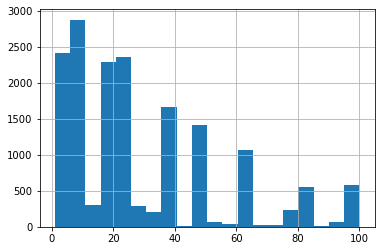

In [176]:
df_keyphrases['Score'].hist(bins=20)

### Saving Results

In [177]:
path_result_dir = os.path.join(files_dir, f'KeyPhrase_Results-{col_analyze}')
path_result_dir

'C:\\Users\\320136771\\Social Media Data\\Code\\Bag of words preprocessing\\Bag_of_Words\\Bag_of_Words\\KeyPhrase_Results-Pros_translated'

In [178]:
if not os.path.exists(path_result_dir):
    os.mkdir(path_result_dir)

In [179]:
df_keyphrases.to_csv(os.path.join(path_result_dir   , f'KeyPhrases_{max_words}.csv'), index=False)

### WordCloud - for Key Phrases

In [180]:
## Using Translated Column
if not (col_analyze.endswith('_translated')):
    col_analyze = f'{col_analyze}_translated'

col_analyze

'Pros_translated'

In [181]:
path_result_dir = os.path.join(files_dir, f'KeyPhrase_Results-{col_analyze}')
path_result_dir

'C:\\Users\\320136771\\Social Media Data\\Code\\Bag of words preprocessing\\Bag_of_Words\\Bag_of_Words\\KeyPhrase_Results-Pros_translated'

In [182]:
orig_folder_loc = files_dir

In [183]:
## If folder exists, delete 
path_result_dir1 = os.path.join(orig_folder_loc, f'wordcloud_results_without_sentiments-{col_analyze}')
path_result_dir1

try:
    ## If Directory exists, delete it
    if os.path.exists(path_result_dir1):
        shutil.rmtree(path_result_dir1)
except Exception as e:
    print(e)

In [184]:
max_words

10

In [185]:
max_words = 10

In [186]:
## Commentwise Topics
df_phrase = pd.read_csv(os.path.join(path_result_dir, f'KeyPhrases_{max_words}.csv'))
df_phrase

Phrase  Score  \
0      challenging but rewarding work in healthcare t...  100.0   
1          fare when i was leaving in giving me my money  100.0   
2      - i was able to work independently on smaller ...  100.0   
3         big firm with a lot of people around the world  100.0   
4           and not everyone enjoyed it as much as i did  100.0   
...                                                  ...    ...   
16449                           facilities_x000d__x000d_    1.0   
16450                                   _x000d__x000d_ 4    1.0   
16451                                   _x000d__x000d_ 3    1.0   
16452                               time_x000d__x000d_ 2    1.0   
16453                                   _x000d__x000d_ 3    1.0   

                                                Comments  \
0      Challenging but rewarding work in healthcare t...   
1         fare when I was leaving in giving me my money.   
2      - I was able to work independently on smaller ...   
3      Big Firm with a lot of people around the world...   
4      I was a recent grad and they offered me an Ins...   
...                                                  ...   
16449  - Fun experience _x000D__x000D_ - Great workin...   
16450  1. Getting salary on. time_x000D__x000D_ 2. Ot...   
16451  1. Getting salary on. time_x000D__x000D_ 2. Ot...   
16452  1. Getting salary on. time_x000D__x000D_ 2. Ot...   
16453  1) Work life balance is pretty good_x000D__x00...   

                                     Comment Level Topic  \
0      Coworkers & Teams,Base Pay,Recognition,Benefit...   
1                                                Unknown   
2      Coworkers & Teams,Delivery,Base Pay,Flexible W...   
3                                                Unknown   
4      Coworkers & Teams,Managers,Growth & Developmen...   
...                                                  ...   
16449  Growth & Development,Culture & Environment,Ove...   
16450  Coworkers & Teams,Base Pay,Culture & Environme...   
16451  Coworkers & Teams,Base Pay,Culture & Environme...   
16452  Coworkers & Teams,Base Pay,Culture & Environme...   
16453  Managers,Processes & Procedures,Workload & Wor...   

                                              Phrase_New  
0      challenging_but_rewarding_work_in_healthcare_t...  
1          fare_when_i_was_leaving_in_giving_me_my_money  
2      -_i_was_able_to_work_independently_on_smaller_...  
3         big_firm_with_a_lot_of_people_around_the_world  
4           and_not_everyone_enjoyed_it_as_much_as_i_did  
...                                                  ...  
16449                             facilities_x000d_x000d  
16450                                      x000d_x000d_4  
16451                                      x000d_x000d_3  
16452                                 time_x000d_x000d_2  
16453                                      x000d_x000d_3  

[16454 rows x 5 columns]

In [187]:
df_phrase.columns

Index(['Phrase', 'Score', 'Comments', 'Comment Level Topic', 'Phrase_New'], dtype='object')

In [188]:
df_phrase.shape

(16454, 5)

In [189]:
df_phrase_count = np.round(df_phrase['Score']).value_counts().reset_index()
df_phrase_count.columns = ['Score', 'Count']
df_phrase_count

Score  Count
0     9.0   2511
1     4.0   2248
2    25.0   2077
3    16.0   2020
4    36.0   1525
..    ...    ...
89   90.0      1
90   83.0      1
91   85.0      1
92   86.0      1
93   87.0      1

[94 rows x 2 columns]

In [190]:
df_phrase

Phrase  Score  \
0      challenging but rewarding work in healthcare t...  100.0   
1          fare when i was leaving in giving me my money  100.0   
2      - i was able to work independently on smaller ...  100.0   
3         big firm with a lot of people around the world  100.0   
4           and not everyone enjoyed it as much as i did  100.0   
...                                                  ...    ...   
16449                           facilities_x000d__x000d_    1.0   
16450                                   _x000d__x000d_ 4    1.0   
16451                                   _x000d__x000d_ 3    1.0   
16452                               time_x000d__x000d_ 2    1.0   
16453                                   _x000d__x000d_ 3    1.0   

                                                Comments  \
0      Challenging but rewarding work in healthcare t...   
1         fare when I was leaving in giving me my money.   
2      - I was able to work independently on smaller ...   
3      Big Firm with a lot of people around the world...   
4      I was a recent grad and they offered me an Ins...   
...                                                  ...   
16449  - Fun experience _x000D__x000D_ - Great workin...   
16450  1. Getting salary on. time_x000D__x000D_ 2. Ot...   
16451  1. Getting salary on. time_x000D__x000D_ 2. Ot...   
16452  1. Getting salary on. time_x000D__x000D_ 2. Ot...   
16453  1) Work life balance is pretty good_x000D__x00...   

                                     Comment Level Topic  \
0      Coworkers & Teams,Base Pay,Recognition,Benefit...   
1                                                Unknown   
2      Coworkers & Teams,Delivery,Base Pay,Flexible W...   
3                                                Unknown   
4      Coworkers & Teams,Managers,Growth & Developmen...   
...                                                  ...   
16449  Growth & Development,Culture & Environment,Ove...   
16450  Coworkers & Teams,Base Pay,Culture & Environme...   
16451  Coworkers & Teams,Base Pay,Culture & Environme...   
16452  Coworkers & Teams,Base Pay,Culture & Environme...   
16453  Managers,Processes & Procedures,Workload & Wor...   

                                              Phrase_New  
0      challenging_but_rewarding_work_in_healthcare_t...  
1          fare_when_i_was_leaving_in_giving_me_my_money  
2      -_i_was_able_to_work_independently_on_smaller_...  
3         big_firm_with_a_lot_of_people_around_the_world  
4           and_not_everyone_enjoyed_it_as_much_as_i_did  
...                                                  ...  
16449                             facilities_x000d_x000d  
16450                                      x000d_x000d_4  
16451                                      x000d_x000d_3  
16452                                 time_x000d_x000d_2  
16453                                      x000d_x000d_3  

[16454 rows x 5 columns]

In [191]:
df_phrase_count

Score  Count
0     9.0   2511
1     4.0   2248
2    25.0   2077
3    16.0   2020
4    36.0   1525
..    ...    ...
89   90.0      1
90   83.0      1
91   85.0      1
92   86.0      1
93   87.0      1

[94 rows x 2 columns]

### Threshold for Score beyond which Word cloud need to be generated

In [192]:
score_thresh_1 = [0,21,40,70,90,95,98]
score_thresh_2 = [20,39,69,89, 94,97,100]
combination_score_thresh=list(zip(score_thresh_1,score_thresh_2))

In [195]:
score_thresh_1 = [4,50,50,80]
score_thresh_2 = [100,100,80,100]
combination_score_thresh=list(zip(score_thresh_1,score_thresh_2))

In [196]:
def word_cloud_generate(data,
                        col_analyze_orig,
                        col_analyze,
                        plot_name='Word_cloud.png',
                        method='tfidf',
                        score_use = False
                       ):
    '''
    method => 'tfidf' (default) or 'countvectorizer' or 'textblob' or 'keep_as_is'
    score_use => False meaning equal weightages, True means use weights from KeyPhrase algo for Keep as is
    '''   
    
    # Creating a custom list of stopwords
    customStopwords=list(STOPWORDS) + ['x000d']
#     customStopwords=[]
    data[col_analyze] = data[col_analyze].str.replace('x000d','')

    plot_width  = 3000
    plot_height = 2000
    
    if method=='keep_as_is':          
        data = df_phrase_filtered[[col_analyze, 'Score']].copy()
        data['Score'] = data['Score'].astype(int)
        data.set_index(col_analyze, inplace=True)
        
        Counter_modified = Counter(data.index).copy()
        if score_use == True:
            for idx, row in data.iterrows():
            #     print(f"For Phrase:{idx} the weightage is {row['weightage']}")

                ## Updating counter with weightages from dataframe
                Counter_modified.update({idx : int(row['Score']-1)})
#                 cm = dict(Counter_modified)
            print(type(Counter_modified))
            df_rank = pd.DataFrame.from_dict(Counter_modified, orient='index').reset_index()
            print(df_rank)
            df_rank.to_csv(os.path.join(path_result_dir, f'KeyPhrases_rank_{score_thresh_val}.csv'),index= False)

#         Counter_modified
        
        wordcloud = WordCloud(font_step=5, max_font_size=500,
                      width = plot_width, height = plot_height, random_state=1, 
                      background_color='white',colormap = 'Dark2',
                      collocations=False).generate_from_frequencies(Counter_modified)
        
    
    elif method=='textblob':
        data[col_analyze] = data[col_analyze].astype(str)
        all_comments=data[col_analyze]
        # print(all_comments)

        new_comments = [ele for ele in all_comments]
        te = " ".join(review for review in new_comments)

        # Lowercase and tokenize
        text = te.lower()
        # Remove single quote early since it causes problems with the tokenizer.
        text = text.replace("'", "")
        ########################################################################
        # Converting the sample text to a blob
        SampleTextInBlobFormat = TextBlob(text)

        # Finding the noun phrases (important keywords combination) in the text
        # This can help to find out what entities are being talked about in the given text
        NounPhrases=SampleTextInBlobFormat.noun_phrases

        # Creating an empty list to hold new values
        # combining the noun phrases using underscore to visualize it as wordcloud
        NewNounList=[]
        for words in NounPhrases:
            NewNounList.append(words.replace(" ", "_"))

        # Converting list into a string to plot wordcloud
        NewNounString=' '.join(NewNounList)
        print('##### Important word combinations ####')
        # print(NewNounString)

        ########################################################################
        # Plotting the wordcloud        
        wordcloud = WordCloud(font_step=2, max_font_size=500,
                              width = plot_width, height = plot_height, random_state=1, 
                              background_color='white', 
                              collocations=True,colormap = 'tab20',                           
                              stopwords = customStopwords
                             ).generate(NewNounString)

    else:
        if method=='countvectorizer':
            vectorizer = CountVectorizer(stop_words='english')
        else:
            vectorizer = TfidfVectorizer(stop_words='english')

        vecs = vectorizer.fit_transform(data[col_analyze])
        feature_names = vectorizer.get_feature_names()
        dense = vecs.todense()
        lst1  = dense.tolist()

        df_temp = pd.DataFrame(lst1, columns=feature_names)

        #generate the wordcloud object, set the height and width, set the random_state parameter to ensure reproducibility of results and set the stopwords parameter so that the irrelevant words such as pronouns are discarded.
        wordcloud = WordCloud(font_step=2, max_font_size=500,
                              width = plot_width, height = plot_height, random_state=1, 
                              background_color='white', colormap = 'tab20c',
                              collocations=True,                           
                              stopwords = customStopwords).generate_from_frequencies(df_temp.T.sum(axis=1))
    
    ## Defining Paths
    path_result_dir1 = os.path.join(orig_folder_loc, f'wordcloud_phrase-{col_analyze_orig}')
#     path_result_dir = os.path.join(path_result_dir1, 'overall')
#     results_folder1 = os.path.join(path_result_dir, 'Topic{}_{}'.format(topic_index,domi_topic))
#     results_folder  = os.path.join(results_folder1, 'overall')
    results_folder  = os.path.join(path_result_dir1, col_analyze)
    
    ## If Directory do not exist, create it
    if not os.path.exists(path_result_dir1):
        os.mkdir(path_result_dir1)
#     if not os.path.exists(path_result_dir):
#         os.mkdir(path_result_dir)
#     if not os.path.exists(results_folder1):
#         os.mkdir(results_folder1)
    if not os.path.exists(results_folder):
        os.mkdir(results_folder)
    plt.figure(figsize=(20,8))  
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(os.path.join(results_folder, f"{plot_name.replace('.png','')}_{method}_{score_use}.png"), bbox_inches='tight')
    plt.show()
    

################ Score Threshold: 4,100 ################
##### Important word combinations ####


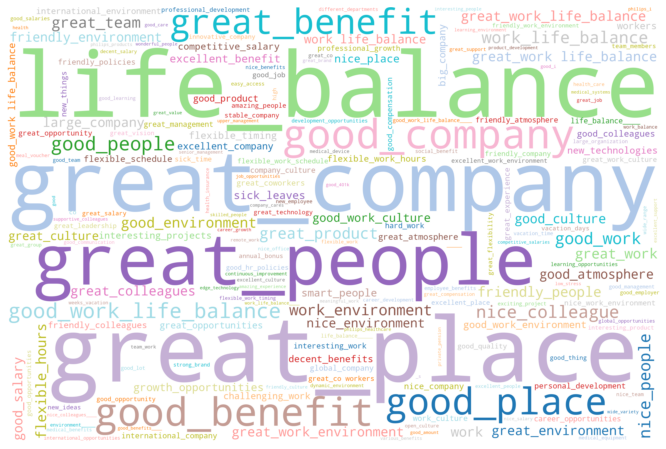

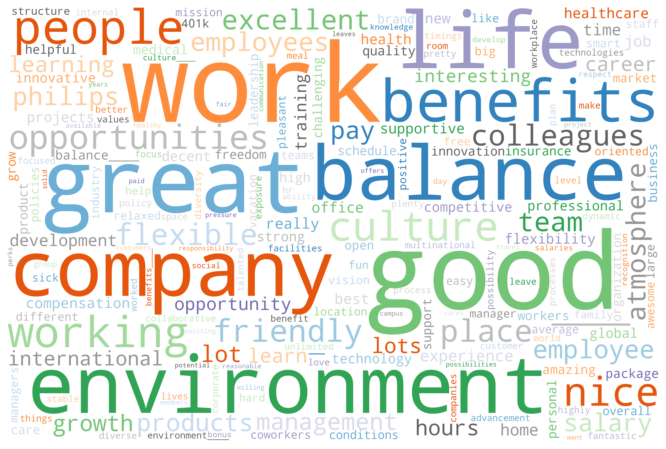

<class 'collections.Counter'>
                                                   index    0
0      challenging but rewarding work in healthcare t...  100
1          fare when i was leaving in giving me my money  100
2      - i was able to work independently on smaller ...  100
3         big firm with a lot of people around the world  100
4           and not everyone enjoyed it as much as i did  100
...                                                  ...  ...
13865                                   ambitious vision    4
13866                                  greate supervisor    4
13867                                   intereting topic    4
13868                                  helpful colleages    4
13869                                  multiple products    4

[13870 rows x 2 columns]


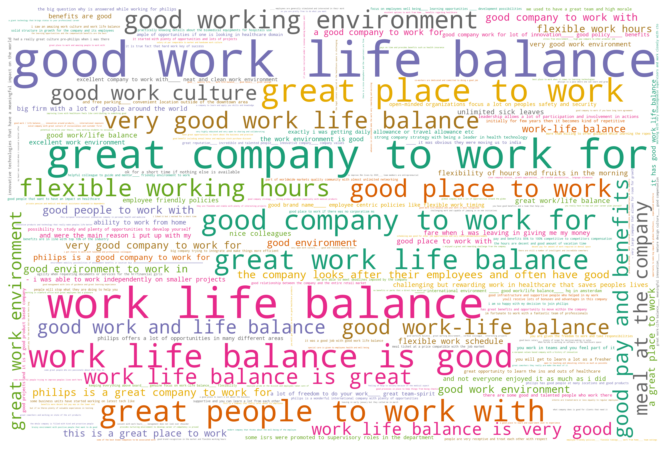

################ Score Threshold: 50,100 ################
##### Important word combinations ####


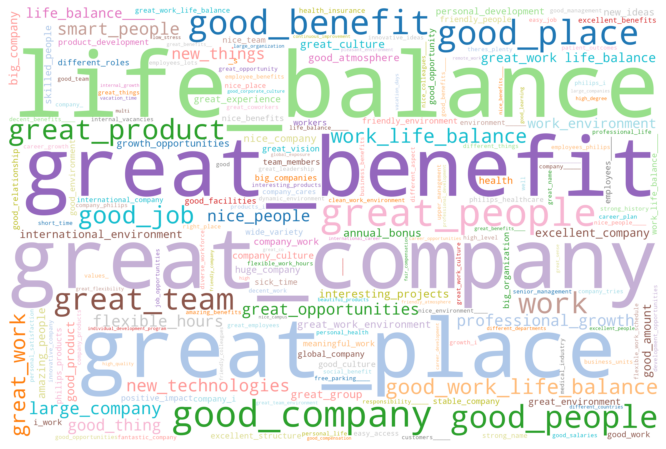

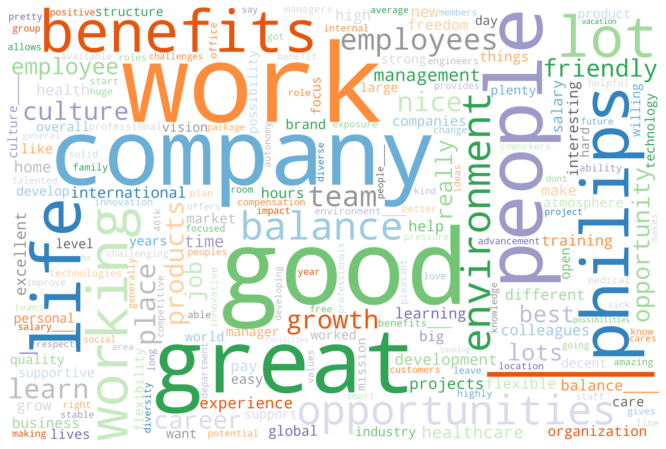

<class 'collections.Counter'>
                                                  index    0
0     challenging but rewarding work in healthcare t...  100
1         fare when i was leaving in giving me my money  100
2     - i was able to work independently on smaller ...  100
3        big firm with a lot of people around the world  100
4          and not everyone enjoyed it as much as i did  100
...                                                 ...  ...
2695            this company knows how to make products   50
2696              __ __ very nice company for employees   50
2697                    ____ if you keep your head down   50
2698                 play games online or on your phone   50
2699                        a lot of freedom on the job   50

[2700 rows x 2 columns]


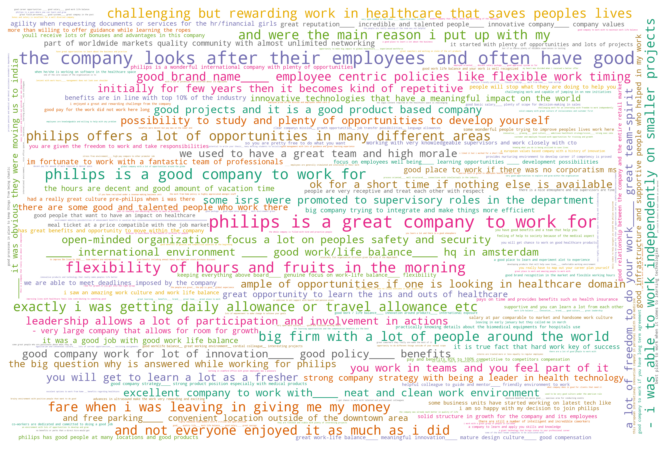

################ Score Threshold: 50,80 ################
##### Important word combinations ####


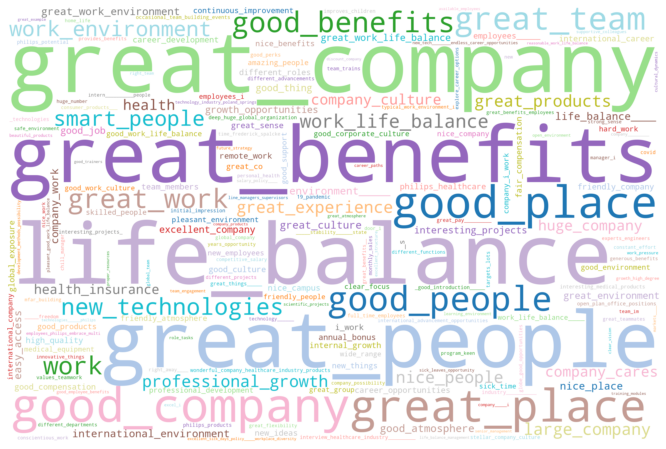

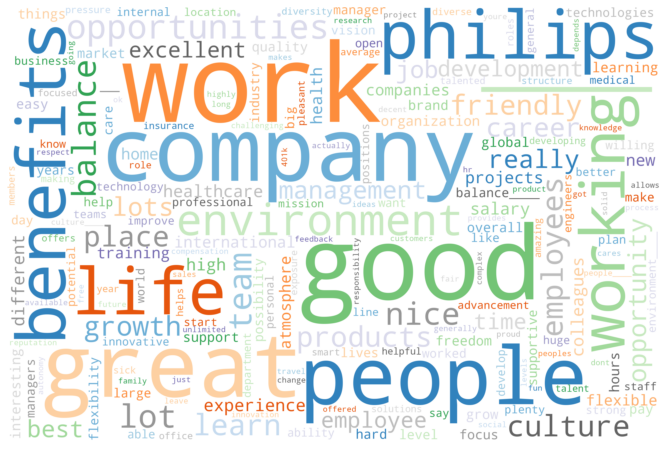

<class 'collections.Counter'>
                                                  index   0
0     the work life balance can definitely be achiev...  80
1      my first day was just 5 weeks after my interview  80
2     healthcare industry____ ____ hardly anything e...  80
3     i am enjoying working for such a wonderful com...  80
4     healthcare industry products make a difference...  80
...                                                 ...  ..
1485            this company knows how to make products  50
1486              __ __ very nice company for employees  50
1487                    ____ if you keep your head down  50
1488                 play games online or on your phone  50
1489                        a lot of freedom on the job  50

[1490 rows x 2 columns]


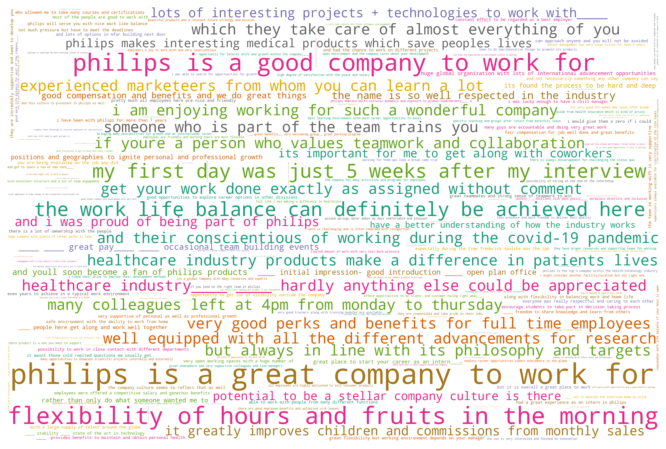

################ Score Threshold: 80,100 ################
##### Important word combinations ####


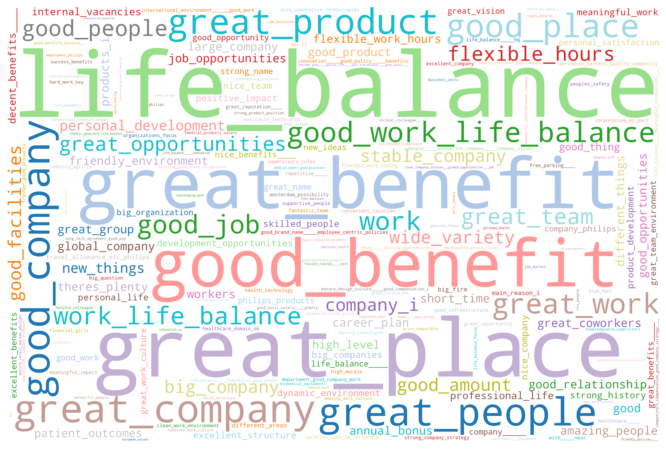

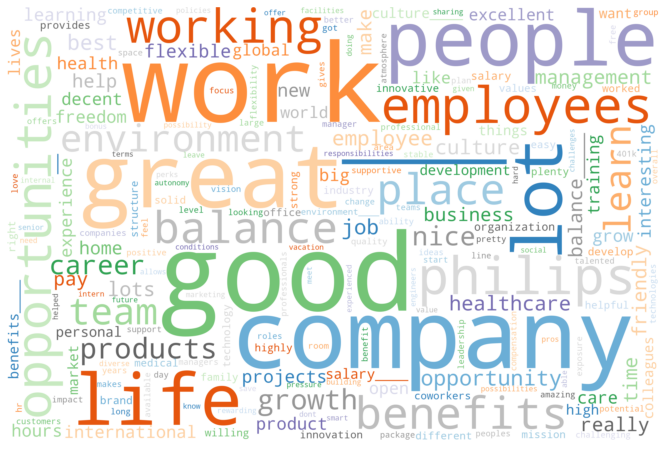

<class 'collections.Counter'>
                                                  index    0
0     challenging but rewarding work in healthcare t...  100
1         fare when i was leaving in giving me my money  100
2     - i was able to work independently on smaller ...  100
3        big firm with a lot of people around the world  100
4          and not everyone enjoyed it as much as i did  100
...                                                 ...  ...
1226  it greatly improves children and commissions f...   80
1227           and i was proud of being part of philips   80
1228  potential to be a stellar company culture is t...   80
1229  philips makes interesting medical products whi...   80
1230   its important for me to get along with coworkers   80

[1231 rows x 2 columns]


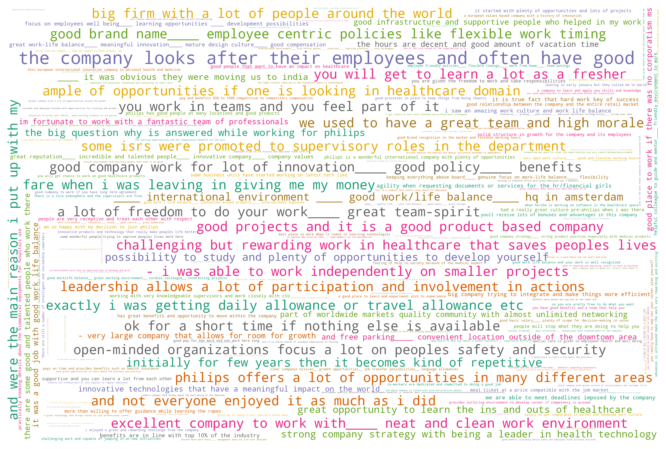

In [197]:
for score_thresh_val in combination_score_thresh:
    
    score_thresh_val_1=score_thresh_val[0]
    score_thresh_val_2=score_thresh_val[1]
    
    print(f'################ Score Threshold: {score_thresh_val_1},{score_thresh_val_2} ################')
    df_phrase_filtered = df_phrase[(df_phrase['Score']>=score_thresh_val_1) & (df_phrase['Score']<=score_thresh_val_2)]
    df_phrase_filtered['Score'] = df_phrase_filtered['Score'].astype(int)

    word_cloud_generate(data=df_phrase_filtered, 
                        col_analyze_orig = col_analyze,
                        col_analyze='Phrase',
                        method='textblob',
                        plot_name=f'WordCloud_score{score_thresh_val}.png')


    word_cloud_generate(data=df_phrase_filtered, 
                        col_analyze_orig = col_analyze,
                        col_analyze='Phrase',
                        method='tfidf',
                        plot_name=f'WordCloud_score{score_thresh_val}.png')

#     word_cloud_generate(data=df_phrase_filtered, 
#                         col_analyze_orig = col_analyze,
#                         col_analyze='Phrase',
#                         method='countvectorizer',
#                         plot_name=f'WordCloud_score{score_thresh_val}.png')

    word_cloud_generate(data=df_phrase_filtered, 
                        col_analyze_orig = col_analyze,
                        col_analyze='Phrase',
                        method='keep_as_is',
                        score_use = True, ## False meaning equal weightages
                        plot_name=f'WordCloud_score{score_thresh_val}.png')



# Topic modeling over kpe

In [195]:
df_phrase.columns

Index(['Phrase', 'Score', 'Comments', 'Comment Level Topic', 'Phrase_New'], dtype='object')

In [196]:
col_analyze = 'Phrase'

In [413]:
# list_check_topics = list(df_topic_words['Topic']) 
# # list_check_topics = ['Culture & Environment']


# df_new['KPE Level Topic'] = ''


# for check_topic in list_check_topics:
#     incl_words = literal_eval(df_topic_words[df_topic_words['Topic'] == check_topic]['Included_Words'].values[0])
#     incl_words = [word.lower() for word in incl_words]
#     excl_words = literal_eval(df_topic_words[df_topic_words['Topic'] == check_topic]['Excluded_Words'].values[0])
#     excl_words = [word for word in excl_words]

    
    
# #     print(f'incl_words 1st :{incl_words}')
# #     print()
# #     print('list_value_incl_words_1:',list_value_incl_words_1)
    
#     # Improving Bag of Words to catch combinations of words
#     # Updated Included Words
# #     incl_words = [combination_words_all(word, sep=' ', min_length=2) for word in incl_words]
# #     incl_words = [j for i in incl_words for j in i]
# #     excl_words = [combination_words_all(word, sep=' ', min_length=2) for word in excl_words]
# #     excl_words = [j for i in excl_words for j in i]
    
#     list_value_incl_words_1 = incl_words
    
# #     print(f'incl_words 2nd : {list_value_incl_words_1}')
# #     print()
#     ################################
    
#     # Lemmatizing the bag of words
#     incl_words = [lemmatize_with_postag(word, correction_flag=flag_autocorrect) for word in incl_words]
# #     print(f'incl_words lemma : {incl_words}')
#     excl_words = [lemmatize_with_postag(word, correction_flag=flag_autocorrect) for word in excl_words]
# #     print(f'incl_words 3rd : {incl_words}')
    
#     test = list(set(list_value_incl_words_1).union(set(incl_words)))
# #     print('union :',test)
    
        
    
    
    
    
# #     print()
    
#     ## Preparing Regex ##
#     pattern_final = ''
    
#     if flag_pattern_with_blocks == True:
#         pattern_include = r"(\b"
#         ## Adding suffixes s or es into consideration
#         pattern_include += (r"[s]?[es]{0,2}\b|\b".join(test))
#         pattern_include += r"[s]?[es]{0,2}\b|\b"
#         ## Adding suffixes d or ed into consideration
#         pattern_include += (r"[ed]?[ed]{0,2}\b|\b".join(incl_words))
#         pattern_include += r"[ed]?[ed]{0,2}\b"
#         # Adding suffixes ing into consideration
#         pattern_include += (r"[ing]?[ing]{0,2}\b|\b".join(test))
#         pattern_include += r"[ing]?[ing]{0,2}\b|\b"
#         ## Adding suffixes r or er into consideration
#         pattern_include += (r"[r]?[er]{0,2}\b|\b".join(test))
#         pattern_include += r"[r]?[er]{0,2}\b"
#         pattern_include += ")*"
        

#         pattern_exclude = r"(?:\b"
#         pattern_exclude += (r"\b|\b".join(excl_words))
#         pattern_exclude += r"\b)*"
# #         print(pattern_include)
#     else:
#         pattern_include = r"("
#         pattern_include += (r"|".join(test))
#         pattern_include += ")*"

#         pattern_exclude = r"(?:\b"
#         pattern_exclude += (r"\b|\b".join(excl_words))
#         pattern_exclude += r"\b)*"
# #         print(pattern_include)
    
#     pattern_final = pattern_exclude+pattern_include
#     pattern_final = pattern_final.lower()
# #     print(pattern_final)
#     ####################
    
#     ## Applying pattern on cleaned text removing alphanumerics
# #     df_new[check_topic] = df_new[f'{col_analyze}_lemma'].str.fullmatch("\b{pattern_final}\b")
# #     print('df_new:',df_new[df_new['flag']==True])
# #     for count,row in df_new.iterrows():
# #         if row['flag'] == True :
# #             df_new.loc[count,check_topic] = pd.DataFrame(list(row[f'{col_analyze}_lemma'])).str.findall(pattern_final)
# #     df_new.loc[df_new['flag']== True,check_topic] = df_new[f'{col_analyze}_lemma'].str.findall(pattern_final)
#     df_new[check_topic] = df_new[f'{col_analyze}'].str.findall(pattern_final)
    
#     ## Removing duplicate elements
# #     df_new[check_topic] = df_new[check_topic].apply(remove_duplicate_element)
#     df_new[check_topic] = df_new[check_topic].str.lstrip(', ')
# #     match=re.findall(r"\bvision\b",text)

#   ## List of Topics combined
#     df_phrase['KPE Level Topic'] = np.where((df_phrase[check_topic].str.len()>0) == True,
#                                       df_phrase['KPE Level Topic']+f",{check_topic}",
#                                       df_phrase['KPE Level Topic'])

# df_phrase['KPE Level Topic'] = df_phrase['KPE Level Topic'].str.lstrip(', ')


In [414]:
list_check_topics = list(df_topic_words['Topic']) 
# list_check_topics = ['Workload & Work-Life Balance']


df_phrase['KPE Level Topic'] = ''


for check_topic in list_check_topics:
    incl_words = literal_eval(df_topic_words[df_topic_words['Topic'] == check_topic]['Included_Words'].values[0])
    incl_words = [word.lower() for word in incl_words]
    excl_words = literal_eval(df_topic_words[df_topic_words['Topic'] == check_topic]['Excluded_Words'].values[0])
    excl_words = [word.lower() for word in excl_words]

    
    
    print(f'incl_words 1st : {incl_words}')
#     print()
#     print('list_value_incl_words_1:',list_value_incl_words_1)
    
    ## Improving Bag of Words to catch combinations of words
    ## Updated Included Words
    incl_words = [combination_words_all(word, sep=' ', min_length=2) for word in incl_words]
    incl_words = [j for i in incl_words for j in i]
    excl_words = [combination_words_all(word, sep=' ', min_length=2) for word in excl_words]
    excl_words = [j for i in excl_words for j in i]
    
    list_value_incl_words_1 = incl_words
    
#     print(f'incl_words 2nd : {incl_words}')
#     print()
    ################################
    
    ## Lemmatizing the bag of words
    incl_words = [lemmatize_with_postag(word, correction_flag=flag_autocorrect) for word in incl_words]
    excl_words = [lemmatize_with_postag(word, correction_flag=flag_autocorrect) for word in excl_words]
#     print(f'incl_words 3rd : {incl_words}')
    
    test = list(set(list_value_incl_words_1).union(set(incl_words)))
#     print('intersection :',test)
    
        
    
    
    
#     print(f'incl_words 3rd : {incl_words}')
#     print()
    
    ## Preparing Regex ##
    pattern_final = ''
    
#     pattern_final = ''
    
    if flag_pattern_with_blocks == True:
        pattern_include = r"(\b"
        ## Adding suffixes s or es into consideration
        pattern_include += (r"[s]?[es]{0,2}\b|\b".join(test))
        pattern_include += r"[s]?[es]{0,2}\b|\b"
        ## Adding suffixes d or ed into consideration
        pattern_include += (r"[ed]?[ed]{0,2}\b|\b".join(incl_words))
        pattern_include += r"[ed]?[ed]{0,2}\b"
        # Adding suffixes ing into consideration
        pattern_include += (r"[ing]?[ing]{0,2}\b|\b".join(test))
        pattern_include += r"[ing]?[ing]{0,2}\b|\b"
        ## Adding suffixes r or er into consideration
        pattern_include += (r"[r]?[er]{0,2}\b|\b".join(test))
        pattern_include += r"[r]?[er]{0,2}\b"
        pattern_include += ")*"
        

        pattern_exclude = r"(?:\b"
        pattern_exclude += (r"\b|\b".join(excl_words))
        pattern_exclude += r"\b)*"
#         print(pattern_include)
    else:
        pattern_include = r"("
        pattern_include += (r"|".join(test))
        pattern_include += ")*"

        pattern_exclude = r"(?:\b"
        pattern_exclude += (r"\b|\b".join(excl_words))
        pattern_exclude += r"\b)*"
#         print(pattern_include)
    
# #     print(pattern_final)
    pattern_final = pattern_exclude+pattern_include
    pattern_final = pattern_final.lower()
#     print(pattern_final)
    ####################
    
    ## Applying pattern on cleaned text removing alphanumerics
    df_phrase[check_topic] = df_phrase[col_analyze].str.findall(pattern_final)
    ## Removing duplicate elements
    df_phrase[check_topic] = df_phrase[check_topic].apply(remove_duplicate_element)
#     df_new[check_topic] = df_new[check_topic].str.lstrip(', ')
    

    ## List of Topics combined
    df_phrase['KPE Level Topic'] = np.where((df_phrase[check_topic].str.len()>0) == True,
                                      df_phrase['KPE Level Topic']+f",{check_topic}",
                                      df_phrase['KPE Level Topic'])

df_phrase['KPE Level Topic'] = df_phrase['KPE Level Topic'].str.lstrip(', ')


incl_words 1st : ['people work with', 'amazing people', 'good people', 'great people', 'talented', 'great group', 'passion', 'work peers', 'relationships peers', 'excellent people', 'quality people', 'coworkers', 'colleagues', 'teammates', 'team member', 'team', 'workgroup', 'work group', 'interesting people', 'passionate people', 'talented people', 'top talent', 'incompetent people', 'positive attitude']
incl_words 1st : ['managers', 'management', 'supervisor', 'boss', 'team lead', 'shift lead', 'shift supervisor']
incl_words 1st : ['system', 'crm', 'database', 'technology', 'server', 'software', 'hardware', 'tech', 'laptop', 'mac', 'pc', 'keyboard', 'mouse', 'screen', 'computer', 'internet connection', 'internet access', 'internet explorer', 'slow internet', 'video', 'skype', 'zoom', 'webex', 'microsoft', 'google drive', 'sharepoint', 'google docs', 'google hangout', 'wifi', 'ethernet', 'network', 'device', 'use slack', 'slack tools', 'google chrome', 'tableau', 'help desk', 'it supp

incl_words 1st : ['bonus', 'incentive', 'stock', 'espp', 'rsu', 'vest', 'shares', 'stock grant', 'stock options', 'options', 'commission', 'quota']
incl_words 1st : ['slow', 'speed', 'fast', 'agile', 'agility', 'cumbersome', 'nimble', 'heavylifting', 'heavy lifting', 'turnaround time', 'quicker decision', 'turn around time', 'accelerate', 'expedite', 'simplified', 'quick decisionmaking', 'quick decision making', 'keep pace', 'quick decision', 'fast decision', 'slow decision', 'keep up trends', 'keep up competition', 'fast decisionmaking', 'fast decision making', 'slow decisionmaking', 'slow decision making', 'expedited', 'simplifying']
incl_words 1st : ['open space', 'renovation', 'interior', 'stand desk', 'ergonomic', 'meeting room', 'chairs', 'conference room', 'workstation', 'workspace', 'bathroom', 'cafeteria', 'gym', 'office']
incl_words 1st : ['decisionmaking', 'decision making', 'decision']
incl_words 1st : ['teamwork', 'team work', 'aligned teams', 'shared goals', 'shared prior

incl_words 1st : ['share goals', 'communicate goals', 'share priorities', 'communicate priorities', 'share expectations', 'communicate expectations', 'share okrs', 'communicate okrs', 'manager communication', 'leadership communication', 'supervisor communication', 'management communication', 'leader communication', 'clear leadership', 'manager communicates', 'leadership communicates', 'supervisor communicates', 'management communicates', 'leader communicates', 'open communication', 'openly communicate', 'transparent communication', 'timely communication', 'explain decisions', 'share decisions', 'communicate decisions']
incl_words 1st : ['comp', 'compensation decisions', 'reward performance', 'reward contribution', 'commensurate', 'pay for performance', 'comp', 'compensation decisions']
incl_words 1st : ['level responsibility', 'responsibilities change', 'new responsibilities', 'clear responsibilities', 'job clear', 'job clarity', 'role clarity', 'role clear', 'expect me', 'job expectat

In [415]:
df_phrase

Phrase  Score  \
0            slow at work and no progress for the a year  100.0   
1      the company observes very strict discpline and...  100.0   
2      moved production to china and we were all laid...  100.0   
3      they will close some groups abruptly and lay o...  100.0   
4       and im a bit nervous of what my expectations are  100.0   
...                                                  ...    ...   
16850                                   _x000d__x000d_ 5    1.0   
16851                                   _x000d__x000d_ 6    1.0   
16852                                   _x000d__x000d_ 7    1.0   
16853                                   _x000d__x000d_ 8    1.0   
16854                                   _x000d__x000d_ 3    1.0   

                                                Comments  \
0           Slow at work and no progress for the a year.   
1      the company observes very strict discpline and...   
2      Moved production to china and we were all laid...   
3      Not so friendly Europeans. Not so collaborativ...   
4      None so far... Im just a bit in the dark as to...   
...                                                  ...   
16850  1. Being a health-care organization, it never ...   
16851  1. Being a health-care organization, it never ...   
16852  1. Being a health-care organization, it never ...   
16853  1. Being a health-care organization, it never ...   
16854  1. Freshers are getting more salary than 2 to ...   

                                     Comment Level Topic  \
0                                        Speed & Agility   
1      Coworkers & Teams,Managers,Leaders,Processes &...   
2                                                Unknown   
3                    Culture & Environment,Collaboration   
4                                                Unknown   
...                                                  ...   
16850  Coworkers & Teams,Managers,Leaders,Base Pay,St...   
16851  Coworkers & Teams,Managers,Leaders,Base Pay,St...   
16852  Coworkers & Teams,Managers,Leaders,Base Pay,St...   
16853  Coworkers & Teams,Managers,Leaders,Base Pay,St...   
16854  Coworkers & Teams,Growth & Development,Base Pa...   

                                              Phrase_New  \
0            slow_at_work_and_no_progress_for_the_a_year   
1      the_company_observes_very_strict_discpline_and...   
2      moved_production_to_china_and_we_were_all_laid...   
3      they_will_close_some_groups_abruptly_and_lay_o...   
4       and_im_a_bit_nervous_of_what_my_expectations_are   
...                                                  ...   
16850                                      x000d_x000d_5   
16851                                      x000d_x000d_6   
16852                                      x000d_x000d_7   
16853                                      x000d_x000d_8   
16854                                      x000d_x000d_3   

              KPE Level Topic Coworkers & Teams Managers IT & Systems Leaders  \
0             Speed & Agility                []       []           []      []   
1      Processes & Procedures                []       []           []      []   
2                                            []       []           []      []   
3                                            []       []           []      []   
4                                            []       []           []      []   
...                       ...               ...      ...          ...     ...   
16850                                        []       []           []      []   
16851                                        []       []           []      []   
16852                                        []       []           []      []   
16853                                        []       []           []      []   
16854                                        []       []           []      []   

       ... Informed Empowerment & Ownership Role Model  \
0      ...       []                      []        

In [416]:
df_phrase[(df_phrase['Comments'].isna()==True)]

Empty DataFrame
Columns: [Phrase, Score, Comments, Comment Level Topic, Phrase_New, KPE Level Topic, Coworkers & Teams, Managers, IT & Systems, Leaders, Growth & Development, Delivery, Base Pay, Processes & Procedures, Training, Workload & Work-Life Balance, Culture & Environment, Customer Focus, Tools & Resources, Recognition, Career Growth, Staffing, Efficiency, Benefits, No Comment, Overall Communication, Trust & Care, Incentive Pay, Speed & Agility, Work Space, Overall Decision Making, Collaboration, Coaching & Feedback, Vision & Strategy, Wellbeing & Resilience, Company Image, Performance Management, Transparency & Openness, Motivated, Employee Listening, Quality, Flexible Working, Diversity, Recommend, Empowerment, Intent to stay, Time Off, Fairness & Equity, Innovation, Channels & Tools, Mission & Values, Budget, Safety, Pride, Restructuring, Ethics, Communication, Compensation Philosophy, Role Clarity, Inclusion, Change Management, Decision Speed, Clarity & Consistency, Job Security, Meaningful Work, Pace of Change, Informed, Empowerment & Ownership, Role Model, Corporate Responsibility, Reduction in Workforce, Decision Making, Decision Making Transparency, Competence, Job Fit, Future of Work]
Index: []

[0 rows x 76 columns]

In [417]:
col_analyze = 'Comments'
col_analyze

'Comments'

In [418]:
## Updating Topic for blanks comments

df_phrase['KPE Level Topic'] = np.where((df_phrase[col_analyze].isna()==True),
                                  'Unknown',
                                  df_phrase['KPE Level Topic'])
df_phrase[(df_phrase['KPE Level Topic'].isna()==True) | (df_phrase['KPE Level Topic'] == "")]

Phrase  Score  \
2      moved production to china and we were all laid...  100.0   
3      they will close some groups abruptly and lay o...  100.0   
4       and im a bit nervous of what my expectations are  100.0   
6                may be if there will be any i’ll add it  100.0   
8      expectation that you will start your day at 4a...  100.0   
...                                                  ...    ...   
16850                                   _x000d__x000d_ 5    1.0   
16851                                   _x000d__x000d_ 6    1.0   
16852                                   _x000d__x000d_ 7    1.0   
16853                                   _x000d__x000d_ 8    1.0   
16854                                   _x000d__x000d_ 3    1.0   

                                                Comments  \
2      Moved production to china and we were all laid...   
3      Not so friendly Europeans. Not so collaborativ...   
4      None so far... Im just a bit in the dark as to...   
6      Nothing for now, may be if there will be any i...   
8      REALLY early hours if you are based on the Wes...   
...                                                  ...   
16850  1. Being a health-care organization, it never ...   
16851  1. Being a health-care organization, it never ...   
16852  1. Being a health-care organization, it never ...   
16853  1. Being a health-care organization, it never ...   
16854  1. Freshers are getting more salary than 2 to ...   

                                     Comment Level Topic  \
2                                                Unknown   
3                    Culture & Environment,Collaboration   
4                                                Unknown   
6                                                Unknown   
8                                      Leaders,Diversity   
...                                                  ...   
16850  Coworkers & Teams,Managers,Leaders,Base Pay,St...   
16851  Coworkers & Teams,Managers,Leaders,Base Pay,St...   
16852  Coworkers & Teams,Managers,Leaders,Base Pay,St...   
16853  Coworkers & Teams,Managers,Leaders,Base Pay,St...   
16854  Coworkers & Teams,Growth & Development,Base Pa...   

                                              Phrase_New KPE Level Topic  \
2      moved_production_to_china_and_we_were_all_laid...                   
3      they_will_close_some_groups_abruptly_and_lay_o...                   
4       and_im_a_bit_nervous_of_what_my_expectations_are                   
6                may_be_if_there_will_be_any_i’ll_add_it                   
8      expectation_that_you_will_start_your_day_at_4a...                   
...                                                  ...             ...   
16850                                      x000d_x000d_5                   
16851                                      x000d_x000d_6                   
16852                                      x000d_x000d_7                   
16853                                      x000d_x000d_8                   
16854                                      x000d_x000d_3                   

      Coworkers & Teams Managers IT & Systems Leaders  ... Informed  \
2                    []       []           []      []  ...       []   
3                    []       []           []      []  ...       []   
4                    []       []           []      []  ...       []   
6                    []       []           []      []  ...       []   
8                    []       []           []      []  ...       []   
...                 ...      ...          ...     ...  ...      ...   
16850                []       []           []      []  ...       []   
16851                []       []           []      []  ...       []   
16852                []       []           []      []  ...       []   
16853                []       []           []      []  ...       []   
16854                []       []           []      []  ...       []   

      Empowerment & Ownership Role Mo

In [419]:
## Updating Topic where no Topics detected

df_phrase['KPE Level Topic'] = np.where((df_phrase['KPE Level Topic'].isna()==True) | (df_phrase['KPE Level Topic'] == ""),
                                  'Unknown',
                                  df_phrase['KPE Level Topic'])

df_phrase[(df_phrase[col_analyze].isna()==True) & (df_phrase['KPE Level Topic'] == "")]

df_phrase[(df_phrase['KPE Level Topic'].isna()==True) | (df_phrase['KPE Level Topic'] == "")]


Empty DataFrame
Columns: [Phrase, Score, Comments, Comment Level Topic, Phrase_New, KPE Level Topic, Coworkers & Teams, Managers, IT & Systems, Leaders, Growth & Development, Delivery, Base Pay, Processes & Procedures, Training, Workload & Work-Life Balance, Culture & Environment, Customer Focus, Tools & Resources, Recognition, Career Growth, Staffing, Efficiency, Benefits, No Comment, Overall Communication, Trust & Care, Incentive Pay, Speed & Agility, Work Space, Overall Decision Making, Collaboration, Coaching & Feedback, Vision & Strategy, Wellbeing & Resilience, Company Image, Performance Management, Transparency & Openness, Motivated, Employee Listening, Quality, Flexible Working, Diversity, Recommend, Empowerment, Intent to stay, Time Off, Fairness & Equity, Innovation, Channels & Tools, Mission & Values, Budget, Safety, Pride, Restructuring, Ethics, Communication, Compensation Philosophy, Role Clarity, Inclusion, Change Management, Decision Speed, Clarity & Consistency, Job Security, Meaningful Work, Pace of Change, Informed, Empowerment & Ownership, Role Model, Corporate Responsibility, Reduction in Workforce, Decision Making, Decision Making Transparency, Competence, Job Fit, Future of Work]
Index: []

[0 rows x 76 columns]

In [420]:
df_melt = pd.DataFrame(columns=['Topic', 'Count'])

data_df = df_phrase['KPE Level Topic'].copy()

for topic in data_df:
    for topic_indiv in topic.split(','):
        list_avail_topics = list(df_melt['Topic'])
        if topic_indiv not in list_avail_topics:
            df_melt = df_melt.append({'Topic':topic_indiv,
                                                'Count' : 0}, ignore_index=True)
df_melt.set_index('Topic', inplace=True)
for topic in data_df:
    for topic_indiv in topic.split(','):
        list_avail_topics = list(df_melt.index)
        if topic_indiv in list_avail_topics:
#             print('Match found!')
            df_melt.loc[topic_indiv,'Count'] +=1

    
df_melt = df_melt.sort_values(by='Count', ascending=False)
df_melt


Count
Topic                             
Unknown                       8609
Managers                      1315
Processes & Procedures         687
Speed & Agility                591
Base Pay                       573
...                            ...
Pride                            4
Communication                    2
Corporate Responsibility         1
Empowerment & Ownership          1
Decision Making Transparency     1

[68 rows x 1 columns]

In [421]:
with pd.ExcelWriter(os.path.join(path_result_dir, 'KPE_Results.xlsx')) as writer:
    ## Saving Bag of Words
    df_phrase.to_excel(writer, sheet_name="KPE_Results", index=False)
    
    ## Saving Topicwise counts
    df_melt.to_excel(writer, sheet_name="Count_KPE_Results")


# results_file_name = 'KPE_Results_Results.xlsx'
# if flag_autocorrect == True:
#     results_file_name = results_file_name.replace('.xlsx', '_Autocorrect_Yes.xlsx')
# else:
#     results_file_name = results_file_name.replace('.xlsx', '_Autocorrect_No.xlsx')

# with pd.ExcelWriter(os.path.join(path_result_dir, results_file_name)) as writer:
#     ## Saving Bag of Words
#     df_new.to_excel(writer, sheet_name="Bag_of_Words_Results", index=False)
    
#     ## Saving Topicwise counts
#     df_melt.to_excel(writer, sheet_name="Count_Bag_of_Words_Results")

In [750]:
#######################Context finding ##################################################

In [751]:
df_phrase=pd.read_csv(r'C:\Users\320136771\Social Media Data\Code\Bag of words preprocessing\Bag_of_Words\Bag_of_Words\Data\Q1 2022 Philips processes first ques.csv')

In [752]:
df_phrase

Which one area within process, systems, data and competencies would you change, and how? Topics  \
0                                                Unknown                                                
1                             Coworkers & Teams,Training                                                
2      Efficiency,Processes & Procedures,Speed & Agility                                                
3                                                Unknown                                                
4      Customer Focus,Delivery,Speed & Agility,IT & S...                                                
...                                                  ...                                                
10666                             Processes & Procedures                                                
10667                       IT & Systems,Speed & Agility                                                
10668     Overall Decision Making,Processes & Procedures                                                
10669                                            Unknown                                                
10670                                  Tools & Resources                                                

      Which one area within process, systems, data and competencies would you change, and how? (EN)  
0      Keep TPM up to date. We are now reasonably in ...                                             
1      I feel like I am getting more pulled into logi...                                             
2                                    simplify processing                                             
3      all of them can be improved, to long to explai...                                             
4      ServiceMax processes continue to be an issue. ...                                             
...                                                  ...                                             
10666  Define new process to enable a cloud product d...                                             
10667  IT and network speed is too poor, seriously af...                                             
10668  Our processes are way too complicated, so it t...                                             
10669                     IT is limiting the way we work                                             
10670  Recently, there are many less useful tools are...                                             

[10671 rows x 2 columns]

In [753]:
analyze ='Which one area within process, systems, data and competencies would you change, and how? Topics'

In [754]:
## list of Predefined Standard Stopwords
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [755]:
## List of Words to be excluded from Trigram WordCloud
#words_remove_trigram = ['ariba','/', 'processes and templates','the process','systems','templates','systems', 'process','processes','Processing','Order Process','systems process','process templates wow','processes flow access','process/templates/wow/','depend on process','processes','process flow','process templates wow','changing process','process/','changing','the','systems','system','order',' process and systems ','processes and systems ','platforms','data']

## List of Words to be excluded from Bigram WordCloud
#words_remove_bigram  = ['Process', 'Processes', 'process','processes','Processing','Order Process','systems process','system process','order']

In [756]:
## List of Words to be excluded from Trigram WordCloud
words_remove_trigram = ['system process','system','systems','systems process','ariba','/', 'processes and templates','the process','systems','templates','systems', 'process','processes','Processing','Order Process','systems process','process templates wow','processes flow access','competency','management','process/templates/wow/','depend on process','processes','process flow','process templates wow','changing process','process/','changing','the','systems','system','order',' process and systems ','processes and systems ','platforms','data','data base','masters','master','Competency','Competencies']
## List of Words to be excluded from Bigram WordCloud
words_remove_bigram  = ['system process','system','systems','systems process','Process', 'Processes', 'process','processes','Processing','Order Process','systems process','system process','order','data','database','master','master data','Competency','Competencies','competency','management']

In [757]:
orig_folder_loc ='op'

In [758]:
## If folder exists, delete 
path_result_dir1 = os.path.join(orig_folder_loc, f'wordcloud_results_without_sentiments-{col_analyze}')
path_result_dir1

try:
    ## If Directory exists, delete it
    if os.path.exists(path_result_dir1):
        shutil.rmtree(path_result_dir1)
except Exception as e:
    print('Some Error Occurred while emptying the directory!')

In [ ]:
if flag_required_SentimentAnalysis == False:


        df_phrase[analyze] = df_phrase[analyze].astype(str)
        #all_comments=df['Text']

        #############################################################################################
        ############################### Tri-gram ####################################################
        #############################################################################################
        all_com = df_phrase[analyze] 
        new_comments = [ele for ele in all_com]
        te = " ".join(review for review in new_comments)

        WNL = nltk.WordNetLemmatizer()
        #text = 'your input text goes here'
        # Lowercase and tokenize
        text = te.lower()
        # Remove single quote early since it causes problems with the tokenizer.
        text = text.replace("'", "")
        # Remove numbers from text
        #remove_digits = str.maketrans('', '', digits)
        #text = text.translate(remove_digits)
        tokens = nltk.word_tokenize(text)
        text1 = nltk.Text(tokens)

        # Remove extra chars and remove stop words.
        text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

        #set the stopwords list
        stopwords_wc = set(STOPWORDS)
        # If you want to remove any particular word from text which does not contribute much in meaning
        customised_words = list(words_remove_trigram)

        #'modeling','modelling','asks','lead',
        new_stopwords = stopwords_wc.union(customised_words)
        text_content = [word for word in text_content if word not in new_stopwords]

        # After the punctuation above is removed it still leaves empty entries in the list.
        text_content = [s for s in text_content if len(s) != 0]

        # Best to get the lemmas of each word to reduce the number of similar words
        text_content = [WNL.lemmatize(t) for t in text_content]

        nltk_tokens = nltk.word_tokenize(text)  
        trigrams_list = list(nltk.trigrams(text_content))
    #     print(bigrams_list)
        dictionary2 = [' '.join(tup) for tup in trigrams_list]
        #print (dictionary2)

        #Using count vectoriser to view the frequency of Trigrams
        vectorizer = CountVectorizer(ngram_range=(3, 3))
        bag_of_words = vectorizer.fit_transform(dictionary2)
        vectorizer.vocabulary_
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        #print (words_freq[:100])

        words_dict = dict(words_freq)
        dictionary2_list = " ".join(trigrams for trigrams in dictionary2)

        WC_height = 1000
        WC_width = 1500
        WC_max_words = 30
        wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=new_stopwords, 
                              background_color="white", margin = 10)
        wordCloud.generate_from_frequencies(words_dict)

        ## Defining Paths
        path_result_dir1 = os.path.join(orig_folder_loc, f'wordcloud_results_without_sentiments-{col_analyze}')
        path_result_dir = os.path.join(path_result_dir1, 'overall')
        results_folder1 = os.path.join(path_result_dir, 'must output')
        results_folder  = os.path.join(results_folder1, 'overall')

        ## If Directory do not exist, create it
        if not os.path.exists(path_result_dir1):
            os.mkdir(path_result_dir1)
        if not os.path.exists(path_result_dir):
            os.mkdir(path_result_dir)
        if not os.path.exists(results_folder1):
            os.mkdir(results_folder1)
        if not os.path.exists(results_folder):
            os.mkdir(results_folder)

        df_words_freq = pd.DataFrame(words_dict.items(), columns=['Word', 'Frequency'])
        df_words_freq.to_csv(os.path.join(results_folder, 'Trigram.csv'), index=False)

        #plt.title('Trigram of Overall for topic0')
        plt.imshow(wordCloud, interpolation='bilinear')
        plt.axis("off")
        plt.savefig(os.path.join(results_folder, 'Trigram.png'), dpi=300,bbox_inches='tight')
        plt.show()


        #############################################################################################
        ############################### Bi-gram #####################################################
        #############################################################################################

        all_com =df_phrase['Competency'] 
        new_comments = [ele for ele in all_com]
        te = " ".join(review for review in new_comments)

        WNL = nltk.WordNetLemmatizer()
        #text = 'your input text goes here'
        # Lowercase and tokenize
        text = te.lower()
        # Remove single quote early since it causes problems with the tokenizer.
        text = text.replace("'", "")
        # Remove numbers from text
        #remove_digits = str.maketrans('', '', digits)
        #text = text.translate(remove_digits)
        tokens = nltk.word_tokenize(text)
        text1 = nltk.Text(tokens)

        # Remove extra chars and remove stop words.
        text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

        #set the stopwords list
        stopwords_wc = set(STOPWORDS)

        # If you want to remove any particular word form text which does not contribute much in meaning
        customised_words = list(words_remove_bigram)

        #'modeling','modelling','asks','lead',
        new_stopwords = stopwords_wc.union(customised_words)
        text_content = [word for word in text_content if word not in new_stopwords]

        # After the punctuation above is removed it still leaves empty entries in the list.
        text_content = [s for s in text_content if len(s) != 0]

        # Best to get the lemmas of each word to reduce the number of similar words
        text_content = [WNL.lemmatize(t) for t in text_content]

        nltk_tokens = nltk.word_tokenize(text)  
        bigrams_list = list(nltk.bigrams(text_content))
    #     print(bigrams_list)
        dictionary2 = [' '.join(tup) for tup in bigrams_list]
        #print (dictionary2)

        #Using count vectoriser to view the frequency of bigrams
        vectorizer = CountVectorizer(ngram_range=(2, 2))
        bag_of_words = vectorizer.fit_transform(dictionary2)
        vectorizer.vocabulary_
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        #print (words_freq[:100])

        words_dict = dict(words_freq)
        dictionary2_list = " ".join(bigrams for bigrams in dictionary2)

        df_words_freq = pd.DataFrame(words_dict.items(), columns=['Word', 'Frequency'])
        df_words_freq.to_csv(os.path.join(results_folder, 'Bigram.csv'), index=False)

        WC_height    = 1000
        WC_width     = 1500
        WC_max_words = 30
        wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=new_stopwords, background_color="white", margin = 10)
        wordCloud.generate_from_frequencies(words_dict)
        #default_colors = wordCloud.to_array()
        #plt.imshow(wordCloud.recolor(color_func=grey_color_func, random_state=3),
        #           interpolation="bilinear")
        #plt.title('Most frequently occurring bigrams connected by same colour and font size_all_comments')
        plt.imshow(wordCloud, interpolation='bilinear')
        plt.axis("off")
        plt.savefig(os.path.join(results_folder, 'Bigram.png'),dpi=300,bbox_inches='tight')

        plt.show()
        
        #############################################################################################
        ############################### Bi-gram #####################################################
        #############################################################################################

        all_com =df_phrase['Competency'] 
        new_comments = [ele for ele in all_com]
        te = " ".join(review for review in new_comments)

        WNL = nltk.WordNetLemmatizer()
        #text = 'your input text goes here'
        # Lowercase and tokenize
        text = te.lower()
        # Remove single quote early since it causes problems with the tokenizer.
        text = text.replace("'", "")
        # Remove numbers from text
        #remove_digits = str.maketrans('', '', digits)
        #text = text.translate(remove_digits)
        tokens = nltk.word_tokenize(text)
        text1 = nltk.Text(tokens)

        # Remove extra chars and remove stop words.
        text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

        #set the stopwords list
        stopwords_wc = set(STOPWORDS)

        # If you want to remove any particular word form text which does not contribute much in meaning
        customised_words = list(words_remove_bigram)

        #'modeling','modelling','asks','lead',
        new_stopwords = stopwords_wc.union(customised_words)
        text_content = [word for word in text_content if word not in new_stopwords]

        # After the punctuation above is removed it still leaves empty entries in the list.
        text_content = [s for s in text_content if len(s) != 0]

        # Best to get the lemmas of each word to reduce the number of similar words
        text_content = [WNL.lemmatize(t) for t in text_content]

        nltk_tokens = nltk.word_tokenize(text)  
        bigrams_list = list(nltk.bigrams(text_content))
    #     print(bigrams_list)
        dictionary2 = [' '.join(tup) for tup in bigrams_list]
        #print (dictionary2)

        #Using count vectoriser to view the frequency of bigrams
        vectorizer = CountVectorizer(ngram_range=(1, 1))
        bag_of_words = vectorizer.fit_transform(dictionary2)
        vectorizer.vocabulary_
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        #print (words_freq[:100])

        words_dict = dict(words_freq)
        dictionary2_list = " ".join(bigrams for bigrams in dictionary2)

        df_words_freq = pd.DataFrame(words_dict.items(), columns=['Word', 'Frequency'])
        df_words_freq.to_csv(os.path.join(results_folder, 'unigram.csv'), index=False)

        WC_height    = 1000
        WC_width     = 1500
        WC_max_words = 30
        wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=new_stopwords, background_color="white", margin = 10)
        wordCloud.generate_from_frequencies(words_dict)
        #default_colors = wordCloud.to_array()
        #plt.imshow(wordCloud.recolor(color_func=grey_color_func, random_state=3),
        #           interpolation="bilinear")
        #plt.title('Most frequently occurring bigrams connected by same colour and font size_all_comments')
        plt.imshow(wordCloud, interpolation='bilinear')
        plt.axis("off")
        plt.savefig(os.path.join(results_folder, 'unigram.png'),dpi=300,bbox_inches='tight')

        plt.show()




# 


In [98]:
## Cross Checking against existing bag of words counts

In [930]:
df_1 = pd.read_csv(r'C:\Users\320136771\Social Media Data\Code\Bag of words preprocessing\Bag_of_Words\Bag_of_Words\data\Q1 2022 Philips processes second ques.csv')

In [931]:
quatrics_topic_col = 'Where do you see an opportunity to automate our processes to help us become simpler, easier and faster? Topics'

In [932]:
df_qualtrics = pd.DataFrame(columns=['Topics', 'Counts'])


df_1[quatrics_topic_col].fillna('', inplace=True)

for topic in df_1[quatrics_topic_col]:
    avail_topics = topic.split(',')
#     print(topic)
    for subtopic in avail_topics:
#         print(subtopic)
        
        if not (subtopic in list(df_qualtrics['Topics'])):           
#             print('Match Not Found')
            df_qualtrics = df_qualtrics.append({'Topics' : subtopic,
                                 'Counts' : 0
                                }, ignore_index=True)

df_qualtrics.set_index('Topics', inplace=True)

for topic in df_1[quatrics_topic_col]:
    avail_topics = topic.split(',')
#     print(topic)
    for subtopic in avail_topics:
#         print(subtopic)
        if (subtopic in list(df_qualtrics.index)):
#             print('Match Found')
            avail_count = df_qualtrics.loc[subtopic, 'Counts']
            df_qualtrics.loc[subtopic,'Counts'] = avail_count+1   

df_qualtrics = df_qualtrics.sort_values(by='Counts', ascending=False)
df_qualtrics        

Counts
Topics                             
Unknown                        4684
Processes & Procedures         4086
IT & Systems                   2631
Efficiency                     2592
Tools & Resources              2061
...                             ...
Pace of Change                    5
Decision Making Transparency      4
Reduction in Workforce            3
Meaningful Work                   3
Corporate Responsibility          2

[67 rows x 1 columns]

In [933]:
df_qualtrics = pd.DataFrame(columns=['Topic', 'Count'])

data_df = df_1['Where do you see an opportunity to automate our processes to help us become simpler, easier and faster? Topics'].copy()

for topic in data_df:
    for topic_indiv in topic.split(','):
        list_avail_topics = list(df_qualtrics['Topic'])
        if topic_indiv not in list_avail_topics:
            df_qualtrics = df_qualtrics.append({'Topic':topic_indiv,
                                                'Count' : 0}, ignore_index=True)
df_qualtrics.set_index('Topic', inplace=True)
for topic in data_df:
    for topic_indiv in topic.split(','):
        list_avail_topics = list(df_qualtrics.index)
        if topic_indiv in list_avail_topics:
#             print('Match found!')
            df_qualtrics.loc[topic_indiv,'Count'] +=1

    
df_qualtrics = df_qualtrics.sort_values(by='Count', ascending=False)
df_qualtrics


Count
Topic                             
Unknown                       4684
Processes & Procedures        4086
IT & Systems                  2631
Efficiency                    2592
Tools & Resources             2061
...                            ...
Pace of Change                   5
Decision Making Transparency     4
Reduction in Workforce           3
Meaningful Work                  3
Corporate Responsibility         2

[67 rows x 1 columns]

In [934]:
df_new[df_new[quatrics_topic_col].str.contains('Speed & Agility') == True].shape

(1347, 76)

In [935]:
df_new

Where do you see an opportunity to automate our processes to help us become simpler, easier and faster? Topics  \
0                                Customer Focus,Delivery                                                               
1                                    Managers,Work Space                                                               
2                               Efficiency,Incentive Pay                                                               
3                         Delivery,IT & Systems,Managers                                                               
4                                   Growth & Development                                                               
...                                                  ...                                                               
15665                                Efficiency,Training                                                               
15666                IT & Systems,Processes & Procedures                                                               
15667                             Processes & Procedures                                                               
15668                             Processes & Procedures                                                               
15669                                       IT & Systems                                                               

                           Where do you see an opportuni  \
0      We seem to be needing the project number for d...   
1      back office, configuration Office, Order Manag...   
2      trunk stock should be more automated on scans ...   
3      Continuous improvement of project management s...   
4      SAP reports, indicator reports at the country ...   
...                                                  ...   
15665  Trainings and onboardings of people / automate...   
15666       Process for managing our platform technology   
15667                                         PO process   
15668  If we want the whole company to follow our PEP...   
15669       Replace Aris software with a less manual one   

                   Where do you see an opportuni_replace  \
0      We seem to be needing the project number for d...   
1      back office, configuration Office, Order Manag...   
2      trunk stock should be more automated on scans ...   
3      Continuous improvement of project management s...   
4      SAP reports, indicator reports at the country ...   
...                                                  ...   
15665  Trainings and onboardings of people / automate...   
15666       Process for managing our platform technology   
15667                                         PO process   
15668  If we want the whole company to follow our PEP...   
15669       Replace Aris software with a less manual one   

        Where do you see an opportuni_replace_translated  \
0      We seem to be needing the project number for d...   
1      back office, configuration Office, Order Manag...   
2      trunk stock should be more automated on scans ...   
3      Continuous improvement of project management s...   
4      SAP reports, indicator reports at the country ...   
...                                                  ...   
15665  Trainings and onboardings of people / automate...   
15666       Process for managing our platform technology   
15667                                         PO process   
15668  If we want the whole company to follow our PEP...   
15669       Replace Aris software with a less manual one   

      Where do you see an opportuni_replace_translated_lemma  \
0      we seem to be need the project number for diff...       
1      back office configuration office order managem...       
2      trunk stock should be more automate on scan an...       
3      continuous improvement of project management s...       
4      sap report indicator report at the country lev...       
...               

In [936]:
with pd.ExcelWriter(os.path.join(path_result_dir, 'Bag_of_Words_Results.xlsx')) as writer:
    ## Saving Bag of Words
    df_new.to_excel(writer, sheet_name="Bag_of_Words_Results", index=False)
    
    ## Saving Topicwise counts
    df_melt.to_excel(writer, sheet_name="Count_Bag_of_Words_Results")

    ## Saving Qualtrics Bag of Words
    df_qualtrics.to_excel(writer, sheet_name="Qualtrics_Counts_Bag_of_Words")

In [937]:
## Finding ratio of actual counts

In [938]:
qualtrics_topic_col = 'Where do you see an opportunity to automate our processes to help us become simpler, easier and faster? Topics'

In [939]:
#df_new = pd.read_excel(r'C:\Users\320136771\Social Media Data\Code\Bag of words preprocessing\Bag_of_Words\Bag_of_Words\BagofWords_Results-EN What one thing would you translated\Bag_of_Words_Results.xlsx')

In [940]:
df_qualtrics

Count
Topic                             
Unknown                       4684
Processes & Procedures        4086
IT & Systems                  2631
Efficiency                    2592
Tools & Resources             2061
...                            ...
Pace of Change                   5
Decision Making Transparency     4
Reduction in Workforce           3
Meaningful Work                  3
Corporate Responsibility         2

[67 rows x 1 columns]

In [941]:
df_new[qualtrics_topic_col] = df_new[qualtrics_topic_col].replace(np.nan,"")

In [942]:
# df_topic = df_new[df_new[qualtrics_topic_col].str.contains(topic_check)].copy()
# print(df_topic.shape)

In [943]:
df_topic_sub_combined_all = pd.DataFrame(columns=['Topics', 'Qualtric Counts', 'Our Count within Qualtrics'])


for topic_check in list(df_qualtrics.index):
    print(f'Searching for Topic: {topic_check}')
    
    df_topic = df_new[df_new[qualtrics_topic_col].str.contains(topic_check)].copy()
    print(df_topic.shape)

    df_topic_sub_combined = pd.DataFrame(columns=['Topics', 'Qualtric Counts', 'Our Count within Qualtrics'])

    df_topic[quatrics_topic_col].fillna('', inplace=True)

    for topic in df_topic['Bag_of_Words']:
        avail_topics = topic.split(',')
    #     print(topic)
        for subtopic in avail_topics:
    #         print(subtopic)

            if not (subtopic in list(df_topic_sub_combined['Topics'])):           
    #             print('Match Not Found')
                df_topic_sub_combined = df_topic_sub_combined.append({'Topics' : subtopic,
                                     'Qualtric Counts' : 0,
                                      'Our Count within Qualtrics' : 0
                                    }, ignore_index=True)

    df_topic_sub_combined.set_index('Topics', inplace=True)

    for topic in df_topic['Bag_of_Words']:
        avail_topics = topic.split(',')
    #     print(topic)
        for subtopic in avail_topics:
    #         print(subtopic)
            if (subtopic in list(df_topic_sub_combined.index)):
    #             print('Match Found')
                avail_count = df_topic_sub_combined.loc[subtopic, 'Our Count within Qualtrics']
                df_topic_sub_combined.loc[subtopic,'Our Count within Qualtrics'] = avail_count+1   

    df_topic_sub_combined = df_topic_sub_combined.sort_values(by='Our Count within Qualtrics', ascending=False)
    df_topic_sub_combined['Qualtric Counts'] = df_topic.shape[0]

    ## Filtering only necessary records
    df_topic_sub_combined = df_topic_sub_combined[df_topic_sub_combined.index == topic_check]
    df_topic_sub_combined
    df_topic_sub_combined_all = df_topic_sub_combined_all.append(df_topic_sub_combined)

df_topic_sub_combined_all.drop(columns='Topics', inplace=True)
df_topic_sub_combined_all

Searching for Topic: Unknown
(4394, 76)
Searching for Topic: Processes & Procedures
(4085, 76)
Searching for Topic: IT & Systems
(2630, 76)
Searching for Topic: Efficiency
(2591, 76)
Searching for Topic: Tools & Resources
(2060, 76)
Searching for Topic: Delivery
(1483, 76)
Searching for Topic: Customer Focus
(1435, 76)
Searching for Topic: Speed & Agility
(1347, 76)
Searching for Topic: Managers
(895, 76)
Searching for Topic: Coworkers & Teams
(839, 76)
Searching for Topic: Training
(679, 76)
Searching for Topic: No Comment
(171, 76)
Searching for Topic: Growth & Development
(397, 76)
Searching for Topic: Overall Communication
(388, 76)
Searching for Topic: Quality
(340, 76)
Searching for Topic: Collaboration
(274, 76)
Searching for Topic: Channels & Tools
(273, 76)
Searching for Topic: Staffing
(253, 76)
Searching for Topic: Overall Decision Making
(227, 76)
Searching for Topic: Leaders
(175, 76)
Searching for Topic: Incentive Pay
(167, 76)
Searching for Topic: Transparency & Openness

Qualtric Counts Our Count within Qualtrics
Unknown                             4394                       4040
Processes & Procedures              4085                       4077
IT & Systems                        2630                       2610
Efficiency                          2591                       2558
Tools & Resources                   2060                       2049
...                                  ...                        ...
Recommend                              7                          6
Pace of Change                         5                          2
Reduction in Workforce                 3                          3
Meaningful Work                        3                          2
Corporate Responsibility               2                          2

[64 rows x 2 columns]

In [944]:
out_filename = 'Bag_of_Words_Results.xlsx'

if flag_pattern_with_blocks==True:
    out_filename = out_filename.replace('.xlsx', '_withblocks.xlsx')
else:
    out_filename = out_filename.replace('.xlsx', '_withoutblocks.xlsx')

In [945]:
with pd.ExcelWriter(os.path.join(path_result_dir, out_filename)) as writer:
    ## Saving Bag of Words
    df_new.to_excel(writer, sheet_name="Bag_of_Words_Results", index=False)
    
    ## Saving Topicwise counts
    df_melt.to_excel(writer, sheet_name="Count_Bag_of_Words_Results")

    ## Saving Qualtrics Bag of Words
    df_qualtrics.to_excel(writer, sheet_name="Qualtrics_Counts_Bag_of_Words")
    
    ## saving Comparison
    df_topic_sub_combined_all.to_excel(writer, sheet_name="Qual_compare_counts")


In [946]:
## Comparison

In [947]:
df_melt.reset_index(inplace=True)
df_melt.rename(columns={'Count' : 'Our Count'}, inplace=True)
df_melt

Topic Our Count
0     Processes & Procedures      4176
1                    Unknown      4101
2                 Efficiency      3334
3               IT & Systems      2620
4          Tools & Resources      2112
..                       ...       ...
63  Corporate Responsibility         2
64           Meaningful Work         2
65           Decision Making         2
66                   Job Fit         1
67                Competence         1

[68 rows x 2 columns]

In [948]:
df_qualtrics.reset_index(inplace=True)
df_qualtrics.rename(columns={'Topics': 'Topic',
                             'Count' : 'Qualtrics Count'}, inplace=True)
df_qualtrics

Topic Qualtrics Count
0                        Unknown            4684
1         Processes & Procedures            4086
2                   IT & Systems            2631
3                     Efficiency            2592
4              Tools & Resources            2061
..                           ...             ...
62                Pace of Change               5
63  Decision Making Transparency               4
64        Reduction in Workforce               3
65               Meaningful Work               3
66      Corporate Responsibility               2

[67 rows x 2 columns]

In [949]:
df_topic_sub_combined_all.reset_index(inplace=True)
df_topic_sub_combined_all.rename(columns={'index' : 'Topic',
                                          'Qualtric Counts' : 'Qualtrics Count'
                                         }, inplace=True)
df_topic_sub_combined_all

Topic Qualtrics Count Our Count within Qualtrics
0                    Unknown            4394                       4040
1     Processes & Procedures            4085                       4077
2               IT & Systems            2630                       2610
3                 Efficiency            2591                       2558
4          Tools & Resources            2060                       2049
..                       ...             ...                        ...
59                 Recommend               7                          6
60            Pace of Change               5                          2
61    Reduction in Workforce               3                          3
62           Meaningful Work               3                          2
63  Corporate Responsibility               2                          2

[64 rows x 3 columns]

In [950]:
df_qualtrics

Topic Qualtrics Count
0                        Unknown            4684
1         Processes & Procedures            4086
2                   IT & Systems            2631
3                     Efficiency            2592
4              Tools & Resources            2061
..                           ...             ...
62                Pace of Change               5
63  Decision Making Transparency               4
64        Reduction in Workforce               3
65               Meaningful Work               3
66      Corporate Responsibility               2

[67 rows x 2 columns]

In [951]:
df_compare_1 = pd.merge(df_qualtrics,
                     df_melt,
                     how='left',                     
                     on='Topic')
df_compare_1

Topic Qualtrics Count Our Count
0                        Unknown            4684      4101
1         Processes & Procedures            4086      4176
2                   IT & Systems            2631      2620
3                     Efficiency            2592      3334
4              Tools & Resources            2061      2112
..                           ...             ...       ...
62                Pace of Change               5        11
63  Decision Making Transparency               4       NaN
64        Reduction in Workforce               3         3
65               Meaningful Work               3         2
66      Corporate Responsibility               2         2

[67 rows x 3 columns]

In [952]:
#df_compare

In [953]:
df_compare_1 = pd.merge(df_qualtrics,
                     df_melt,
                     how='left',                     
                     on='Topic')

df_compare = pd.merge(df_compare_1,
                     df_topic_sub_combined_all,
                     how='left',                     
                     on=['Topic', 'Qualtrics Count'])

df_compare['%Capture_against_Qualtrics'] = (df_compare['Our Count']/df_compare['Qualtrics Count'])*100
df_compare['%Capture_within_Qualtrics']  = (df_compare['Our Count within Qualtrics']/df_compare['Qualtrics Count'])*100

df_compare

Topic Qualtrics Count Our Count  \
0                        Unknown            4684      4101   
1         Processes & Procedures            4086      4176   
2                   IT & Systems            2631      2620   
3                     Efficiency            2592      3334   
4              Tools & Resources            2061      2112   
..                           ...             ...       ...   
62                Pace of Change               5        11   
63  Decision Making Transparency               4       NaN   
64        Reduction in Workforce               3         3   
65               Meaningful Work               3         2   
66      Corporate Responsibility               2         2   

   Our Count within Qualtrics %Capture_against_Qualtrics  \
0                         NaN                  87.553373   
1                         NaN                 102.202643   
2                         NaN                  99.581908   
3                         NaN                 128.626543   
4                         NaN                 102.474527   
..                        ...                        ...   
62                          2                      220.0   
63                        NaN                        NaN   
64                          3                      100.0   
65                          2                  66.666667   
66                          2                      100.0   

   %Capture_within_Qualtrics  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
..                       ...  
62                      40.0  
63                       NaN  
64                     100.0  
65                 66.666667  
66                     100.0  

[67 rows x 6 columns]

In [954]:
with pd.ExcelWriter(os.path.join(path_result_dir, 'Calculation.xlsx')) as writer:
    ## Saving Overall Comparison
    df_compare.to_excel(writer, sheet_name="Overall_compare_counts", index=False)
    
    ## Saving Bag of Words
    df_new.to_excel(writer, sheet_name="Bag_of_Words_Results", index=False)
 
    ## Saving Bag of Words
    df_topic_words.to_excel(writer, sheet_name="Bag_of_Words_input", index=False)
    
    ## Saving Topicwise counts
    df_melt.to_excel(writer, sheet_name="Count_Bag_of_Words_Results", index=False)

    ## Saving Qualtrics Bag of Words
    df_qualtrics.to_excel(writer, sheet_name="Qualtrics_Counts_Bag_of_Words")
    
    ## Saving Comparison
    df_topic_sub_combined_all.to_excel(writer, sheet_name="Qual_compare_counts")
    



### Step 5.b: 

On the original data translated:

>> further filtering on any particular Bag of Words or All.


### Reading Sentiment Results

In [141]:
path_result_dir = os.path.join(files_dir, f'Sentiment_Results-{col_analyze}')
   
path_result_dir

'C:\\Users\\320136771\\Social Media Data\\Code\\Bag of words preprocessing\\Bag_of_Words\\Bag_of_Words\\Sentiment_Results-Which one area within process_translated'

In [142]:
df_new = pd.read_csv(os.path.join(path_result_dir, 'Sentiment Analysis Results.csv'))
df_new

Unnamed: 0  \
0               0   
1               1   
2               2   
3               3   
4               4   
...           ...   
10666       10666   
10667       10667   
10668       10668   
10669       10669   
10670       10670   

      Which one area within process, systems, data and competencies would you change, and how? Topics  \
0                                                Unknown                                                
1                             Coworkers & Teams,Training                                                
2      Efficiency,Processes & Procedures,Speed & Agility                                                
3                                                Unknown                                                
4      Customer Focus,Delivery,Speed & Agility,IT & S...                                                
...                                                  ...                                                
10666                             Processes & Procedures                                                
10667                       IT & Systems,Speed & Agility                                                
10668     Overall Decision Making,Processes & Procedures                                                
10669                                            Unknown                                                
10670                                  Tools & Resources                                                

                           Which one area within process  \
0      Keep TPM up to date. We are now reasonably in ...   
1      I feel like I am getting more pulled into logi...   
2                                    simplify processing   
3      all of them can be improved, to long to explai...   
4      ServiceMax processes continue to be an issue. ...   
...                                                  ...   
10666  Define new process to enable a cloud product d...   
10667  IT and network speed is too poor, seriously af...   
10668  Our processes are way too complicated, so it t...   
10669                     IT is limiting the way we work   
10670  Recently, there are many less useful tools are...   

                Which one area within process_translated  \
0      Keep TPM up to date. We are now reasonably in ...   
1      I feel like I am getting more pulled into logi...   
2                                    simplify processing   
3      all of them can be improved, to long to explai...   
4      ServiceMax processes continue to be an issue. ...   
...                                                  ...   
10666  Define new process to enable a cloud product d...   
10667  IT and network speed is too poor, seriously af...   
10668  Our processes are way too complicated, so it t...   
10669                     IT is limiting the way we work   
10670  Recently, there are many less useful tools are...   

          Which one area within process_translated_lemma  \
0      keep tpm up to date we be now reasonably in it...   
1      i feel like i be get more pulled into logistic...   
2                                    simplify processing   
3          all of them can be improve to long to explain   
4      servicemax process continue to be an issue too...   
...                                                  ...   
10666  define new process to enable a cloud product d...   
10667  it and network speed be too poor seriously aff...   
10668  our process be way too complicate so it take f...   
10669                        it be limit the way we work   
10670  recently there be many less useful tool be in ...   

                                            Bag_of_Words Coworkers & Teams  \
0                                                Unknown                []   
1                             Coworkers & Teams,Training          ['team']   
2                             Efficiency,Speed & Agility                []   
3                 

### Filtering for Specific topic or All Topics

In [143]:
specific_topics = ['Future of Work'] ## or keep 'All' if we need to run across all Topics
# specific_topics = ['Unknown']
specific_topics

['Future of Work']

In [144]:
## Filtering for Specific Topics if specified
if not ('All' in specific_topics):
    condition = ["("]
    condition += [f"df_new['Bag_of_Words'].str.contains('{word}') | " for word in specific_topics]
    condition += [")"]
    condition = "".join(condition)
    condition = condition.replace('| )', ')')
    # print(condition)

    df_new = df_new[eval(condition)].copy()
    print(df_new.shape)

(754, 77)


### Step 6: Topic Modeling

> Do we need Unsupervised Topic Modeling or not?
	>> if Yes, give the options of Topic Modeling-LDA/NMF etc.
	>> if No, tag all comments to single Topic


## Topic Modeling

In [145]:
flag_Topic_modeling_required = True  ## If we need to run Topic Modeling
# flag_Topic_modeling_required = False ## If we don't need to run Topic Modeling

In [ ]:
path_result_dir = os.path.join(files_dir, f'Topic_Modeling_Results-{col_analyze}')
path_result_dir

In [ ]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nlp = en_core_web_sm.load()

In [ ]:
pip uninstall en_core_web_sm

In [ ]:
# NLTK Stop words

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

### Defining Functions

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in allowed_postags else '' for token in doc ]))
    return texts_out

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Show top n keywords for each topic
def show_topics(lda_model, vectorizer, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [ ]:
def topic_modeling(data, 
                   method_topic  = 'nmf', 
                   num_of_Topics = 10,
                   topic_keyword = 1, 
                   top_k_words   = 10): 
    """
    method_topic  => can be 'lda' or 'nmf'
    num_of_Topics => How many Topics need to be found
    topic_keyword => The keywords used for Topic Modeling should be 2 words or 1 word
    top_k_words   => No. of top k words for each topic
    """
    data_words = list(sent_to_words(data))
    
    # Remove Stop Words
    data_words_nostops = remove_stopwords(data_words)


    # print(data_words[:1])

    ## Takes time: Depending on dataset

    # Do lemmatization keeping only noun, adj, vb, adv
    data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


    # print(data_lemmatized[:1])


    # Init the Model
    if method_topic == 'lda': 
        vectorizer = CountVectorizer(ngram_range = (topic_keyword, topic_keyword), 
                                     max_df = 0.95, min_df = 2, stop_words='english')
    elif method_topic == 'nmf':
        vectorizer = TfidfVectorizer(ngram_range = (topic_keyword, topic_keyword),
                                     max_df=0.95, min_df=2, stop_words='english')

    data_vectorized = vectorizer.fit_transform(data_lemmatized)

    data_dense = data_vectorized.todense()

    # Compute Sparsicity = Percentage of Non-Zero cells
    # print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

    # search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
    search_params = {'learning_decay': [.5, .7, .9]}

    # Init the Model
    if method_topic == 'lda': 
        lda_nmf = LatentDirichletAllocation(n_components = num_of_Topics, random_state=42)
    elif method_topic == 'nmf':
        lda_nmf = NMF(n_components = num_of_Topics, random_state=42)

    lda_nmf.fit(data_vectorized)
    lda_output = lda_nmf.transform(data_vectorized)

    # column names
    topicnames = ["Topic" + str(i) for i in range(lda_nmf.n_components)]

    # index names
    docnames   = ["Doc" + str(i) for i in range(len(data))]

    # Make the pandas dataframe
    df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

    # Get dominant topic for each document
    dominant_topic = np.argmax(df_document_topic.values, axis=1)

    cols_check = list(df_document_topic.columns)

    df_document_topic['dominant_topic'] = dominant_topic

    # Apply Style
    df_document_topics = df_document_topic.style.applymap(color_green).applymap(make_bold)
    # df_document_topics

    ## Adding a logic where if all values are same...create a default Topic (-1) and not Topic 0
    df_document_topic['max'] = np.argmax(df_document_topic[cols_check].values, axis=1)
    df_document_topic['min'] = np.argmin(df_document_topic[cols_check].values, axis=1)

    df_document_topic['dominant_topic'] = np.where(df_document_topic['max'] == df_document_topic['min'], 
                                                -1, 
                                                df_document_topic['dominant_topic'])

    df_document_topic.drop(columns=['max', 'min'], inplace=True)

    df_Topic_final = df_document_topics.data
    
    
    ## Generating Topic Keywords
    df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
    df_topic_distribution.columns = ['Topic Num', 'Num Documents']
    df_topic_distribution

    # Topic-Keyword Matrix
    df_topic_keywords = pd.DataFrame(lda_nmf.components_)

    # Assign Column and Index
    df_topic_keywords.columns = vectorizer.get_feature_names()
    df_topic_keywords.index   = topicnames

    topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_nmf, n_words=top_k_words)        

    # Topic - Keywords Dataframe
    df_topic_keywords = pd.DataFrame(topic_keywords)
    df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
    df_topic_keywords.index   = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
    df_topic_keywords
    
    
    return df_Topic_final, df_topic_keywords


In [ ]:
df_orig = df_new.copy()

In [ ]:
data = df_new[col_analyze].copy()

num_of_Topics = 10    ## Find Top 10 Topics in the dataset
topic_keyword = 1     ## Use Unigrams for identifying Topics, i.e. keywords used for Topic Modeling should be 2 words or 1 word
top_k_words   = 10    ## Find Top 10 words for each Topic
method_topic  = 'nmf' ## lda or nmf

df_Topic_final, df_topic_keywords = topic_modeling(data = data, 
                                                   method_topic  = method_topic, 
                                                   num_of_Topics = num_of_Topics,
                                                   topic_keyword = topic_keyword, 
                                                   top_k_words   = top_k_words)

In [ ]:
## Concatenate with Orignal Comments
df_Topic_final = pd.concat([df_orig.reset_index(drop=True), df_Topic_final.reset_index()], axis=1)

In [ ]:
df_Topic_final

In [ ]:
df_Topic_final.shape

In [ ]:
df_Topic_final['dominant_topic'].value_counts()

In [ ]:
### Resetting Topic Modeling results if Topic Modeling was skipped
if flag_Topic_modeling_required == False:
    df_Topic_final['dominant_topic']=0

In [ ]:
df_topic_keywords

### Saving Results

In [ ]:
if not os.path.exists(path_result_dir):
    os.mkdir(path_result_dir)

In [ ]:
df_Topic_final.to_csv(os.path.join(path_result_dir   , 'Dominant_topics.csv'))

In [ ]:
if flag_Topic_modeling_required == True:
    df_topic_keywords.to_csv(os.path.join(path_result_dir, 'Topic_keywords.csv'))

### Step 7: Word Clouds

> Do we need Word clouds or not?
	>> if Yes, with Sentiments or Without Sentiments?
	>> Do we need PPT Generation logic for each Topic and Sentiment ?
	

In [ ]:
flag_required_wordcloud = True # If Word Cloud required
# flag_required_wordcloud = False # If Word Cloud not required

In [ ]:
## Using Translated Column
if not (col_analyze.endswith('_translated')):
    col_analyze = f'{col_analyze}_translated'

col_analyze

In [ ]:
path_result_dir = os.path.join(files_dir, f'Topic_Modeling_Results-{col_analyze}')
path_result_dir

In [ ]:
## Topics and their Keywords

df_topics_keywords = pd.read_csv(os.path.join(path_result_dir, 'Topic_keywords.csv'))
df_topics_keywords.rename(columns={'Unnamed: 0' : 'Topic'}, inplace=True)
df_topics_keywords

In [ ]:
## Commentwise Topics
df_topics = pd.read_csv(os.path.join(path_result_dir, 'Dominant_topics.csv'))
df_topics.rename(columns={'Unnamed: 0' : 'Document'}, inplace=True)
df_topics

In [ ]:
df_topics.columns

In [ ]:
df_topics.shape

In [ ]:
df_topics['dominant_topic'].value_counts()

In [ ]:
df_topics_count = df_topics['dominant_topic'].value_counts().reset_index()
df_topics_count.columns = ['Topic_num', 'Count']
df_topics_count

In [ ]:
for topic_index,domi_topic in df_topics_count.iterrows():  
    domi_topic = df_topics_count['Topic_num'].iloc[topic_index]
    print('Index: {}, Topic: {}'.format(topic_index, domi_topic))

In [ ]:
orig_folder_loc = files_dir

In [ ]:
## list of Predefined Standard Stopwords
set(STOPWORDS)

In [ ]:
## List of Words to be excluded from Trigram WordCloud
words_remove_trigram = ['xxx', 'yyy', 'nan',]

In [ ]:
## List of Words to be excluded from Bigram WordCloud
words_remove_bigram  = ['xxx', 'yyy', 'nan',]

In [ ]:
## If folder exists, delete 
path_result_dir1 = os.path.join(orig_folder_loc, f'wordcloud_results_without_sentiments-{col_analyze}')
path_result_dir1

try:
    ## If Directory exists, delete it
    if os.path.exists(path_result_dir1):
        shutil.rmtree(path_result_dir1)
except Exception as e:
    print('Some Error Occurred while emptying the directory!')

#### Wordcloud without Sentiments

In [ ]:
if flag_required_SentimentAnalysis == False:
    for topic_index,domi_topic in df_topics_count.iterrows():  
        domi_topic = df_topics_count['Topic_num'].iloc[topic_index]
        print('Index: {}, Topic: {}'.format(topic_index, domi_topic))

        df = df_topics[df_topics['dominant_topic'] == domi_topic].copy()
        df = df.rename(columns={col_analyze : "Text"})

        df['Text'] = df['Text'].astype(str)
        #all_comments=df['Text']

        #############################################################################################
        ############################### Tri-gram ####################################################
        #############################################################################################
        all_com = df['Text']
        new_comments = [ele for ele in all_com]
        te = " ".join(review for review in new_comments)

        WNL = nltk.WordNetLemmatizer()
        #text = 'your input text goes here'
        # Lowercase and tokenize
        text = te.lower()
        # Remove single quote early since it causes problems with the tokenizer.
        text = text.replace("'", "")
        # Remove numbers from text
        #remove_digits = str.maketrans('', '', digits)
        #text = text.translate(remove_digits)
        tokens = nltk.word_tokenize(text)
        text1 = nltk.Text(tokens)

        # Remove extra chars and remove stop words.
        text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

        #set the stopwords list
        stopwords_wc = set(STOPWORDS)
        # If you want to remove any particular word from text which does not contribute much in meaning
        customised_words = list(words_remove_trigram)

        #'modeling','modelling','asks','lead',
        new_stopwords = stopwords_wc.union(customised_words)
        text_content = [word for word in text_content if word not in new_stopwords]

        # After the punctuation above is removed it still leaves empty entries in the list.
        text_content = [s for s in text_content if len(s) != 0]

        # Best to get the lemmas of each word to reduce the number of similar words
        text_content = [WNL.lemmatize(t) for t in text_content]

        nltk_tokens = nltk.word_tokenize(text)  
        trigrams_list = list(nltk.trigrams(text_content))
    #     print(bigrams_list)
        dictionary2 = [' '.join(tup) for tup in trigrams_list]
        #print (dictionary2)

        #Using count vectoriser to view the frequency of Trigrams
        vectorizer = CountVectorizer(ngram_range=(3, 3))
        bag_of_words = vectorizer.fit_transform(dictionary2)
        vectorizer.vocabulary_
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        #print (words_freq[:100])

        words_dict = dict(words_freq)
        dictionary2_list = " ".join(trigrams for trigrams in dictionary2)

        WC_height = 1000
        WC_width = 1500
        WC_max_words = 30
        wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=new_stopwords, 
                              background_color="white", margin = 10)
        wordCloud.generate_from_frequencies(words_dict)

        ## Defining Paths
        path_result_dir1 = os.path.join(orig_folder_loc, f'wordcloud_results_without_sentiments-{col_analyze}')
        path_result_dir = os.path.join(path_result_dir1, 'overall')
        results_folder1 = os.path.join(path_result_dir, 'Topic{}_{}'.format(topic_index,domi_topic))
        results_folder  = os.path.join(results_folder1, 'overall')

        ## If Directory do not exist, create it
        if not os.path.exists(path_result_dir1):
            os.mkdir(path_result_dir1)
        if not os.path.exists(path_result_dir):
            os.mkdir(path_result_dir)
        if not os.path.exists(results_folder1):
            os.mkdir(results_folder1)
        if not os.path.exists(results_folder):
            os.mkdir(results_folder)

        df_words_freq = pd.DataFrame(words_dict.items(), columns=['Word', 'Frequency'])
        df_words_freq.to_csv(os.path.join(results_folder, 'Trigram.csv'), index=False)

        #plt.title('Trigram of Overall for topic0')
        plt.imshow(wordCloud, interpolation='bilinear')
        plt.axis("off")
        plt.savefig(os.path.join(results_folder, 'Trigram.png'), dpi=300,bbox_inches='tight')
        plt.show()


        #############################################################################################
        ############################### Bi-gram #####################################################
        #############################################################################################

        all_com =df['Text']
        new_comments = [ele for ele in all_com]
        te = " ".join(review for review in new_comments)

        WNL = nltk.WordNetLemmatizer()
        #text = 'your input text goes here'
        # Lowercase and tokenize
        text = te.lower()
        # Remove single quote early since it causes problems with the tokenizer.
        text = text.replace("'", "")
        # Remove numbers from text
        #remove_digits = str.maketrans('', '', digits)
        #text = text.translate(remove_digits)
        tokens = nltk.word_tokenize(text)
        text1 = nltk.Text(tokens)

        # Remove extra chars and remove stop words.
        text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

        #set the stopwords list
        stopwords_wc = set(STOPWORDS)

        # If you want to remove any particular word form text which does not contribute much in meaning
        customised_words = list(words_remove_bigram)

        #'modeling','modelling','asks','lead',
        new_stopwords = stopwords_wc.union(customised_words)
        text_content = [word for word in text_content if word not in new_stopwords]

        # After the punctuation above is removed it still leaves empty entries in the list.
        text_content = [s for s in text_content if len(s) != 0]

        # Best to get the lemmas of each word to reduce the number of similar words
        text_content = [WNL.lemmatize(t) for t in text_content]

        nltk_tokens = nltk.word_tokenize(text)  
        bigrams_list = list(nltk.bigrams(text_content))
    #     print(bigrams_list)
        dictionary2 = [' '.join(tup) for tup in bigrams_list]
        #print (dictionary2)

        #Using count vectoriser to view the frequency of bigrams
        vectorizer = CountVectorizer(ngram_range=(2, 2))
        bag_of_words = vectorizer.fit_transform(dictionary2)
        vectorizer.vocabulary_
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        #print (words_freq[:100])

        words_dict = dict(words_freq)
        dictionary2_list = " ".join(bigrams for bigrams in dictionary2)

        df_words_freq = pd.DataFrame(words_dict.items(), columns=['Word', 'Frequency'])
        df_words_freq.to_csv(os.path.join(results_folder, 'Bigram.csv'), index=False)

        WC_height    = 1000
        WC_width     = 1500
        WC_max_words = 30
        wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=new_stopwords, background_color="white", margin = 10)
        wordCloud.generate_from_frequencies(words_dict)
        #default_colors = wordCloud.to_array()
        #plt.imshow(wordCloud.recolor(color_func=grey_color_func, random_state=3),
        #           interpolation="bilinear")
        #plt.title('Most frequently occurring bigrams connected by same colour and font size_all_comments')
        plt.imshow(wordCloud, interpolation='bilinear')
        plt.axis("off")
        plt.savefig(os.path.join(results_folder, 'Bigram.png'),dpi=300,bbox_inches='tight')

        plt.show()




#### Wordcloud with Sentiments

In [ ]:
class GroupedColorFunc(object):
    """
    Uses different colors for different groups of words. 
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func
        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)
        return self.get_color_func(word)(word, **kwargs)
    
    # Define functions to select a hue of colors arounf: grey, red and green
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(30, 50)

def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(100, 100%%, %d%%)" % random.randint(20, 40)
def gray_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(50, 100%%, %d%%)" % random.randint(20, 40)

In [ ]:
def wordcloud(data,target_column,dominant_topic_column,sentiment_column,data_merge):
    '''
    data is the dataframe 
    target_column define that column ,which column you need to create wordcolud
    dominant_topic_column define that , you need to call the dominant topic column
    sentiment_column define that,you nneed to call your sentiment analysis predict column
    '''
    data_file=data.copy()
    df_merge=data_merge.copy()
    
    
    df_topics = data_file[dominant_topic_column].value_counts().reset_index()
    df_topics.columns = ['Topic_num', 'Count']
    
    ########create a filter topic wise and sentiment wise in below######
    ###Output folder declaration###
    path_result_dir=os.path.join(orig_folder_loc,'data_sample_with_sentiments','overall')
    ##If Directory exist,delete it
    if os.path.exists(path_result_dir):
        shutil.rmtree(path_result_dir)
    
    for topic_index,domi_topic in df_topics.iterrows():  
        domi_topic = df_topics['Topic_num'].iloc[topic_index]
        print('Index: {}, Topic: {}'.format(topic_index, domi_topic))
                
        for sentiment_value in data_file[sentiment_column].unique():
            df_filter=data_file[(data_file[sentiment_column]== sentiment_value) & (data_file[dominant_topic_column] == domi_topic)].copy()
            
            '''
            ***********************************************************************************
                              #TRI-GRAM WORD-CLOUD#
            ***********************************************************************************
            '''
            all_comments=df_filter[target_column].reset_index(drop=True,inplace=True)
            all_comments=df_filter[target_column]

            ##in this updated_comments put the all comments in one list.###

            updated_comments=[ele for ele in all_comments]
            #updated_comments

            text=" ".join(review for review in updated_comments)

            ##Lematization
            WNL = nltk.WordNetLemmatizer()
            lower_text = text.lower()
            lower_text = lower_text.replace("'", "")
                           
            tokens = nltk.word_tokenize(lower_text)
            text1 = nltk.Text(tokens)

            # Remove extra chars and remove stop words.
            text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

            #set the stopwords list
            stopwords_wc = set(STOPWORDS)
            customised_words = lower_stopwords_Tri #['xxx', 'yyy','nan'] # If you want to remove any particular word form text which does not contribute much.

            new_stopwords = stopwords_wc.union(customised_words)
            text_content = [word for word in text_content if word not in new_stopwords]

            # After the punctuation above is removed it still leaves empty entries in the list.
            text_content = [s for s in text_content if len(s) != 0]

            # Best to get the lemmas of each word to reduce the number of similar words
            text_content = [WNL.lemmatize(t) for t in text_content]

            #print(text_content)
#             ## convert single word to 1 string
#             text_string = ''
#             for word in text_content:
#                 word = word +' '
#                 text_string = text_string + word
           

#             ## Removing few custom words from text
#             for index, row in df_merge.iterrows():
#                 orig_word    = row['Word need to map']
#                 replace_word = row['Mapping Word']
#                 print(f'{orig_word} will be replaced with {replace_word}')
#                 text_string   = text_string.replace(orig_word, replace_word)
                    
#             ## convert back to tokens                      
#             tokens = nltk.word_tokenize(text_string)
#             text_content = nltk.Text(tokens)            

                    
            nltk_tokens = nltk.word_tokenize(lower_text)  
            trigrams_list = list(nltk.trigrams(text_content))

            dictionary2 = [' '.join(tup) for tup in trigrams_list]
            #print(dictionary2)

            
            #Using count vectoriser to view the frequency of Trigrams
            vectorizer = CountVectorizer(ngram_range=(3, 3))
            bag_of_words = vectorizer.fit_transform(dictionary2)
            vectorizer.vocabulary_
            sum_words = bag_of_words.sum(axis=0) 
            words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
            words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

            words_dict = dict(words_freq)
            dictionary2_list = " ".join(trigrams for trigrams in dictionary2)

            WC_height = 1000
            WC_width = 1500
            WC_max_words = 30
            if sentiment_value=='0':
                wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=new_stopwords, 
                                      background_color="white", margin = 10,color_func=green_color_func)
            elif sentiment_value=='1':
                wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=new_stopwords, 
                                      background_color="white", margin = 10,color_func=red_color_func)
            else:
                wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=new_stopwords, 
                                      background_color="white", margin = 10,color_func=gray_color_func)

            wordCloud.generate_from_frequencies(words_dict)

            ##################################################################################################
                                       ## Output Folder Creation##
            ##################################################################################################

            results_folder1 = os.path.join(path_result_dir,'Topic{}_{}'.format(topic_index,domi_topic))
            results_folder = os.path.join(results_folder1,'overall')
            results_folder2 = os.path.join(results_folder,'indivual')


         ## If Directory do not exist, create it
            if not os.path.exists(path_result_dir):
                os.mkdir(path_result_dir)
            if not os.path.exists(results_folder1):
                os.mkdir(results_folder1)
            if not os.path.exists(results_folder):
                os.mkdir(results_folder)
            if not os.path.exists(results_folder2):
                os.mkdir(results_folder2)


            #plt.title('Trigram of Overall for topic0')
            plt.imshow(wordCloud, interpolation='bilinear')
            plt.axis("off")
            plt.savefig(os.path.join(results_folder2, '{}-Trigram.png'.format(sentiment_value)), dpi=300,bbox_inches='tight')
            plt.show()

            '''
            *******************************************************************************************
                                  #BI-GRAM WRODCLOUD#
            *******************************************************************************************
            '''
            all_comments=df_filter[target_column].reset_index(drop=True,inplace=True)
            all_comments=df_filter[target_column]

            ##in this updated_comments put the all comments in one list.###

            updated_comments=[ele for ele in all_comments]
            #updated_comments

            text=" ".join(review for review in updated_comments)
            
             ##Lematization
            WNL = nltk.WordNetLemmatizer()
            lower_text = text.lower()
            lower_text = lower_text.replace("'", "")
            for index,mergeword in df_merge.iterrows():
                lower_text = lower_text.replace(mergeword['Word need to map'],mergeword['Mapping Word'])
                
            #lower_text = lower_text.replace(df_merge['Word need to map'],df_merge['Mapping Word'])
            tokens = nltk.word_tokenize(lower_text)
            text1 = nltk.Text(tokens)

            # Remove extra chars and remove stop words.
            text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

            #set the stopwords list
            stopwords_wc = set(STOPWORDS)
            customised_words = lower_stopwords_bi#['xxx', 'yyy','nan'] # If you want to remove any particular word form text which does not contribute much.

            new_stopwords = stopwords_wc.union(customised_words)
            text_content = [word for word in text_content if word not in new_stopwords]

            # After the punctuation above is removed it still leaves empty entries in the list.
            text_content = [s for s in text_content if len(s) != 0]

            # Best to get the lemmas of each word to reduce the number of similar words
            text_content = [WNL.lemmatize(t) for t in text_content]

            nltk_tokens = nltk.word_tokenize(lower_text)  
            bigrams_list = list(nltk.bigrams(text_content))

            dictionary2 = [' '.join(tup) for tup in bigrams_list]

            #Using count vectoriser to view the frequency of Trigrams
            vectorizer = CountVectorizer(ngram_range=(2, 2))
            bag_of_words = vectorizer.fit_transform(dictionary2)
            vectorizer.vocabulary_
            sum_words = bag_of_words.sum(axis=0) 
            words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
            words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

            words_dict = dict(words_freq)
            dictionary2_list = " ".join(trigrams for trigrams in dictionary2)

            WC_height = 1000
            WC_width = 1500
            WC_max_words = 30
            if sentiment_value=='0':
                wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=new_stopwords, 
                                      background_color="white", margin = 10,color_func=green_color_func)
            elif sentiment_value=='1':
                wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=new_stopwords, 
                                      background_color="white", margin = 10,color_func=red_color_func)
            else:
                wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=new_stopwords, 
                                      background_color="white", margin = 10,color_func=gray_color_func)
            wordCloud.generate_from_frequencies(words_dict)

            #plt.title('Bigram of Overall for topic0')
            plt.imshow(wordCloud, interpolation='bilinear')
            plt.axis("off")
            plt.savefig(os.path.join(results_folder2, '{}-Bigram.png'.format(sentiment_value)), dpi=300,bbox_inches='tight')
            plt.show()


In [ ]:
if flag_required_SentimentAnalysis == True:
    wordcloud(data=data,target_column=target_column,dominant_topic_column='dominant_topic',sentiment_column='Predict',data_merge=df_merge)

## PPT Generation

### Folders to Template Excel

In [ ]:
path_result_dir = os.path.join(files_dir, f'wordcloud_results_without_sentiments-{col_analyze}')
path_result_dir

In [ ]:
import os, sys, time, datetime, warnings, shutil
import pandas as pd
import numpy as np
## pip install python-pptx
from pptx import Presentation
from pptx.util import Inches

warnings.filterwarnings("ignore")

from configuration.config import FILEPATH, get_mapping_question_description

####################################################################################

## List of hardcoded folders
folder_name_data    = path_result_dir  ## To fetch data from
folder_name_results = os.path.join(files_dir, f'PPT_results-{col_analyze}')  ## To Store results into

template_file_name = f'overall_template.xlsx'

title_ppt       = 'Social Media Analysis'
subtitle_ppt    = 'Hello Hybrid'

## Template file columns
template_file_cols = ['folder_structure', 'ppt_structure', 'folder_name1', 'folder_name2',
                      'title', 'subtitle', 'placeholder1',
                      'placeholder2', 'placeholder3',
                      'placeholder4', 'placeholder5']

df_template = pd.DataFrame(columns=template_file_cols)

## Initializing df_template with Title and Subtitle
df_template = df_template.append({'folder_structure': 'FirstSlide',
                                    'title'         : title_ppt,
                                    'subtitle'      : subtitle_ppt
                                  }, ignore_index=True)
###################################################################################
try:
    ppt_out_dir = os.path.join(FILEPATH, folder_name_results)

    if not os.path.exists(ppt_out_dir):
        os.makedirs(ppt_out_dir)

    inp_data_dir = os.path.join(FILEPATH, folder_name_data)

    rootdir1   = inp_data_dir
    hierarchy1 = [d for d in os.listdir(rootdir1) if os.path.isdir(os.path.join(rootdir1, d))]

    #################################################################################################
    for hier1 in hierarchy1:
        # hier1 = 'overall'
#         print('-------------------------------------------------------------------------------------')
        folder1 = os.path.join(rootdir1, hier1)

#         print(folder1)
        # folder1 = r'H:\Projects\automation\data\overall'

        df_template = df_template.append({'folder_structure'    : os.path.basename(folder1),
                                          'ppt_structure'       : 'root',
                                          'title'               : os.path.basename(folder1),
                                          'subtitle'            : 'Topic Modeling for {}'.format(os.path.basename(folder1)),
                                            }, ignore_index = True)

        hierarchy2 = [d for d in os.listdir(folder1) if os.path.isdir(os.path.join(folder1, d))]

        ## Sorting the order of Topics
        df_hierarchy2 = pd.DataFrame(hierarchy2, columns=['Topic'])
        df_hierarchy2['Topicnum'] = df_hierarchy2['Topic'].str.split('Topic').str[1].str.split('_').str[0]
        df_hierarchy2['Topicnum'] = df_hierarchy2['Topicnum'].astype(int)
        df_hierarchy2.sort_values(by='Topicnum', inplace=True)

        hierarchy2 = list(df_hierarchy2['Topic'])
        del df_hierarchy2
#         hierarchy2
        
        for hier2 in hierarchy2:
            # hier2 = 'Topic0'
            folder2 = os.path.join(folder1, hier2)
#             print(folder2)
            # folder2 = r'H:\Projects\automation\data\overall\Topic0'

            hierarchy3 = [d for d in os.listdir(folder2) if os.path.isdir(os.path.join(folder2, d))]
            ## First Mixed folder need to be created, hence sorting desc order
            hierarchy3.sort(reverse=True)

            ##################################################
            ## If "overall" folder has data, means sentiment analysis was not executed,
            #       hence slides related to sentiments won't be created
            ## If "overall" folder is empty, means sentiment analysis was executed,
            #       hence slides related to sentiments will be created
            ##################################################
            files_overall = [d for d in os.listdir(os.path.join(folder2, 'overall'))
                             if os.path.isfile(os.path.join(os.path.join(folder2, 'overall'), d))]

            if (len(files_overall) < 1):  ## empty overall folder means sentiments were present
#                 print('')
#                 print('>>>> Sentiment Analysis was detected!')
                flag_senti = True

            else:
#                 print('>>>> Sentiment Analysis was not detected!')
                flag_senti = False

            for hier3 in hierarchy3:
                # hier3 = 'overall'
                # hier3 = 'mixed'
                # hier3 = 'indiviual'
                folder3 = os.path.join(folder2, hier3)
#                 print(folder3)

                filesavailable = [d for d in os.listdir(folder3) if os.path.isfile(os.path.join(folder3, d))]
                #
                # for file in filesavailable:
                #     print(file)

                folder_name2_slide  = os.path.basename(folder3)
                folder_name1_slide  = os.path.split(os.path.split(folder3)[0])[1]
                ppt_structure_slide = 'slide'
                folder_structure_slide = os.path.split(os.path.split(os.path.split(folder3)[0])[0])[1]

                # filesavailable = ['Bigram.png', 'Trigram.png']
                # filesavailable = ['Negative-Bigram.png', 'Negative-Trigram.png', 'Neutral-Bigram.png', 'Neutral-Trigram.png', 'Positive-Bigram.png', 'Positive-Trigram.png']

                if((folder_name2_slide == 'overall') and (flag_senti == False)):
                    placeholder1_slide = folder_name1_slide + ' – Overall Bigram and Trigram'
                    df_template = df_template.append({'folder_structure'    : folder_structure_slide,
                                                      'ppt_structure'       : ppt_structure_slide,
                                                      'folder_name1'        : folder_name1_slide,
                                                      'folder_name2'        : folder_name2_slide,
                                                      'placeholder1'        : placeholder1_slide
                                                      }, ignore_index=True)

                elif((folder_name2_slide == 'indiviual') and (flag_senti == True)):
                    labels_avail = list(set([lab.split('-')[0] for lab in filesavailable]))

                    for label_folder in labels_avail:
                        # print(label_folder)
                        placeholder1_slide = folder_name1_slide + ' – Bigram and Trigram for {} sentiments'.format(label_folder)
                        df_template = df_template.append({'folder_structure'    : folder_structure_slide,
                                                          'ppt_structure'       : ppt_structure_slide,
                                                          'folder_name1'        : folder_name1_slide,
                                                          'folder_name2'        : folder_name2_slide,
                                                          'placeholder1'        : placeholder1_slide
                                                          }, ignore_index=True)
                elif((folder_name2_slide == 'mixed') and (flag_senti == True)):
                    placeholder1_slide = folder_name1_slide + ' – Bigram and Trigram for All sentiments'
                    df_template = df_template.append({'folder_structure'    : folder_structure_slide,
                                                      'ppt_structure'       : ppt_structure_slide,
                                                      'folder_name1'        : folder_name1_slide,
                                                      'folder_name2'        : folder_name2_slide,
                                                      'placeholder1'        : placeholder1_slide
                                                      }, ignore_index=True)

                # else:
                #     print('folder_name2_slide is not matching either with mixed or indiviual or overall')
#         print('-------------------------------------------------------------------------------------')
    #################################################################################################

    ## Calling Value Mapping for Question and resp. Descriptions
    ## Value Map File is defined at "automation\configuration\value_map_question_description.xlsx"
    df_template['title'] = df_template['title'].apply(get_mapping_question_description)

    ## Saving Template
    df_template.to_excel(os.path.join(FILEPATH,folder_name_results, template_file_name), index=False)
    print("Template generated Successfully!")

    if (flag_senti == True):
        print('Sentiments Analysis was detected!')
    else:
        print('Sentiments Analysis was not detected!')

except Exception as e:
    print('Some Error Encountered!')
    print(e)



### Template Excel to PPT

In [ ]:
import os, sys, time, datetime, warnings, shutil
import pandas as pd
import numpy as np
## pip install python-pptx
from pptx import Presentation
from pptx.util import Inches

warnings.filterwarnings("ignore")


from configuration.config import FILEPATH, initialize_first_slide, add_title_slide, \
                                    add_single_image_slide, add_double_image_slide

########################################################################################
## List of hardcoded folders
folder_name_data    = path_result_dir  ## To fetch data from
folder_name_results = os.path.join(files_dir, f'PPT_results-{col_analyze}')  ## To Store results into

template_file_name  = f'overall_template.xlsx'

########################################################################################

try:

    ppt_out_dir = os.path.join(FILEPATH, folder_name_results)

    if not os.path.exists(ppt_out_dir):
        os.makedirs(ppt_out_dir)

    # %%
    inp_data_dir = os.path.join(FILEPATH, folder_name_data)

    rootdir1        = inp_data_dir
    subdirectories1 = [d for d in os.listdir(rootdir1) if os.path.isdir(os.path.join(rootdir1, d))]
    filesavailable1 = [d for d in os.listdir(rootdir1) if os.path.isfile(os.path.join(rootdir1, d))]

    # %%
    ## Level 1
    print('Root Directory: {}'.format(rootdir1))

    ## If Using Overall Template
    df_overall = pd.read_excel(os.path.join(ppt_out_dir, template_file_name))

    root = Presentation()

    ## Adding Title Slide
    ## when folder_structure =="FirstSlide", take the columns "title"
    title_ppt = df_overall[(df_overall['folder_structure'] == "FirstSlide")]["title"][0]

    ## when folder_structure =="FirstSlide", take the columns "subtitle"
    subtitle_ppt = df_overall[(df_overall['folder_structure'] == "FirstSlide")]["subtitle"][0]

    ##################################################################
    ## Initializing the ppt with first slide
    root = initialize_first_slide(title=title_ppt,
                                  subtitle=subtitle_ppt)
    ##################################################################

    # %%

    for subdir1 in subdirectories1:
        ## subdir1 = subdirectories1[0]
        ## subdir1 = subdirectories1[1]
        ## subdir1 = subdirectories1[2]
        ## subdir1 = subdirectories1[3]
        ## subdir1 = subdirectories1[4]

        print('------------------------------------------------')
        print('Sub Directory 1: {}'.format(subdir1))

        ## Level 2
        rootdir2 = os.path.join(rootdir1, subdir1)
        subdirectories2 = [d for d in os.listdir(rootdir2) if os.path.isdir(os.path.join(rootdir2, d))]
        filesavailable2 = [d for d in os.listdir(rootdir2) if os.path.isfile(os.path.join(rootdir2, d))]

        df_part = df_overall[(df_overall['folder_structure'] == subdir1)].copy()
        df_part.reset_index(drop=True, inplace=True)

        ## Adding Root Slide
        df_root = df_part[df_part['ppt_structure'] == 'root'].copy()

        if not df_root.empty:
            ## when folder_structure =="FirstSlide", take the columns "title"
            title_part_ppt = df_root[(df_root['ppt_structure'] == "root")]["title"][0]

            ## when folder_structure =="FirstSlide", take the columns "subtitle"
            subtitle_part_ppt = df_root[(df_root['ppt_structure'] == "root")]["subtitle"][0]

            ##################################################################
            ## Initializing the ppt with first slide
            root = add_title_slide(root=root, title=title_part_ppt,
                                          subtitle=subtitle_part_ppt)
            ##################################################################

        ## Sorting the order of Topics
        df_subdirectories2 = pd.DataFrame(subdirectories2, columns=['Topic'])
        df_subdirectories2['Topicnum'] = df_subdirectories2['Topic'].str.split('Topic').str[1].str.split('_').str[0]
        df_subdirectories2['Topicnum'] = df_subdirectories2['Topicnum'].astype(int)
        df_subdirectories2.sort_values(by='Topicnum', inplace=True)

        subdirectories2 = list(df_subdirectories2['Topic'])
        del df_subdirectories2
#         subdirectories2
            
        for subdir2 in subdirectories2:
            ## subdir2 = subdirectories2[0]
            ## subdir2 = subdirectories2[1]
            ## subdir2 = subdirectories2[2]
            ## subdir2 = subdirectories2[3]

            print('    ................................................')
            print('    Sub Directory 2: {}'.format(subdir2))
            #        print('    Files 2: {}'.format(filesavailable2))
            print('    ................................................')

            ## Level 3
            rootdir3        = os.path.join(rootdir2, subdir2)
            subdirectories3 = [d for d in os.listdir(rootdir3) if os.path.isdir(os.path.join(rootdir3, d))]
            filesavailable3 = [d for d in os.listdir(rootdir3) if os.path.isfile(os.path.join(rootdir3, d))]

            df_subset = df_part[(df_part['folder_name1'] == subdir2)].copy()
            df_subset.reset_index(drop=True, inplace=True)
            ## First Mixed folder need to be created, hence sorting desc order
            subdirectories3.sort(reverse=True)

            for subdir3 in subdirectories3:
                ## subdir3 = subdirectories3[0]
                ## subdir3 = subdirectories3[1]
                ## subdir3 = subdirectories3[2]

                ## Level 4
                rootdir4        = os.path.join(rootdir3, subdir3)
                subdirectories4 = [d for d in os.listdir(rootdir4) if os.path.isdir(os.path.join(rootdir4, d))]
                filesavailable4 = [d for d in os.listdir(rootdir4) if ((os.path.isfile(os.path.join(rootdir4, d))) 
                                                                       & (d.endswith('.png')))]

                print('        ================================================')
                print('        Files 3: {}'.format(filesavailable4))
                print('        ================================================')

                df_subset2 = df_subset[(df_subset['folder_name2'] == subdir3)].copy()
                df_subset2.reset_index(drop=True, inplace=True)

                if not df_subset2.empty:
                    df_line = df_subset[(df_subset['folder_structure'] == subdir1)
                                        & (df_subset['folder_name1'] == subdir2)
                                        & (df_subset['folder_name2'] == subdir3)].copy()
                    df_line.reset_index(drop=True, inplace=True)

                    if not df_line.empty:
                        for i in range(df_line.shape[0]):
                            # i = 0
                            # i = 1
                            # i = 2
                            placeholder1 = df_line['placeholder1'].iloc[i]
                            placeholder2 = df_line['placeholder2'].iloc[i]
                            placeholder3 = df_line['placeholder3'].iloc[i]
                            placeholder4 = df_line['placeholder4'].iloc[i]
                            placeholder5 = df_line['placeholder5'].iloc[i]

                            # if df_line['folder_name1'].iloc[i] == 'overall':  ## 1 heading + 1 image
                            #     for file_name in filesavailable3:
                            #         img_path = os.path.join(os.path.join(rootdir3, file_name))
                            #         root = add_single_image_slide(root, img_path,
                            #                                       placeholder1=placeholder1,
                            #                                       placeholder2=placeholder2)
                            #
                            # if (df_line['folder_name2'].iloc[i].startswith('Topic')):  ## 1 heading + 2 images

                            if subdir3 == 'indiviual':
                                ## Mapping which file to take for which emotion
                                current_sentiment = placeholder1.split('for ')[1].split(' sentiments')[0]
                                filesavailable4_senti = [files for files in filesavailable4 if files.startswith(current_sentiment)]

                                filesavailable4_senti.sort()

                                if len(filesavailable4_senti)>0:
                                    img_path1 = os.path.join(os.path.join(rootdir4, filesavailable4_senti[0]))
                                    img_path2 = os.path.join(os.path.join(rootdir4, filesavailable4_senti[1]))
                                else:
                                    print('Sentiments and appropriate files were not matched!')
                                    raise Exception
                            else:
                                img_path1 = os.path.join(os.path.join(rootdir4, filesavailable4[0]))
                                img_path2 = os.path.join(os.path.join(rootdir4, filesavailable4[1]))

                            root = add_double_image_slide(root,
                                                          img_path1=img_path1,
                                                          img_path2=img_path2,
                                                          placeholder1=placeholder1,
                                                          placeholder2=placeholder2,
                                                          placeholder3=placeholder3,
                                                          placeholder4=placeholder4,
                                                          placeholder5=placeholder5)

        print('------------------------------------------------')

    # %%
    # Saving file
    root.save(os.path.join(ppt_out_dir, f"Output-{col_analyze}.pptx"))

    print("Ppt Created Successfully!")

except Exception as e:
    print('Some Error Encountered!')
    print(e)

